# 7. Rational Expectations II:  The Phillips Curve and Okun's Law

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [66]:
data_dict = {"$CPI_{Urban}$":"CPIAUCSL",
            "$U$":"UNRATE",
             "$U_N$":"NROU",
             "GDP":"GDPC1",
             "LRAS":"GDPPOT"}
freq = "Q"
start = datetime.datetime(1950, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()
data = {}
data = gather_data(data_dict, start, 
          end = end, freq = freq)
diff = 4
lags = 1
data_dict = {"Data":data,
           }

data_dict["Log"] = np.log(data)
data_dict["Log"]["$y_{ct}$"] = data_dict["Log"]["GDP"].sub(data_dict["Log"]["LRAS"])
data_dict["Rate"] = data_dict["Log"].diff(diff)
    
for key in data_dict.keys():
    data_dict[key]["$U$"] = data["$U$"]
    data_dict[key]["$U_N$"] = data["$U_N$"]
    
data_dict["Diff"] = data_dict["Rate"].diff(diff)
data_dict["2Diff"] = data_dict["Diff"].diff(diff)

## 7.1 Kinds of Unemployment

Not all unemployment is bad in the sense that welfare is not necessarily improved by a decrease in the rate of unemployment. Giving existing capital configurations and policies, some positive level of unemployment is efficient. This level of employment is referred to as the **natural rate of unemployment**. It includes unemployment that arises due to the cost of moving between jobs, either due to the need to find work that is better suited to the employee or due to the searcher taking time to build the skill required to find a job of their liking.

Unemployment that occurs due to the time required to find a suitable job is **frictional unemployment**. An unemployed person could become employed by taking the job that he or she can most quickly acquire. An unemployed medical doctor could conceivable acquire employment pushing a lawnmower for a landscaping company. While this may allow the doctor to earn a wage, he will likely generate less value pushing lawnmowers than he would serving patients as a doctor. Assuming he himself does not value working in landscaping enough to offset the loss of value generatedfrom his practice as a medical doctor, it is actually inefficient for him to engage in this form of employment.

**Structural unemployment** is similar to frictional unemployment. Rather than referring to unemployed labor that is between jobs due solely to a search for a new job without a change in the field, the person unemployed must acquire a new skill in order to find his or her preferred job as their old skills are no longer suitable for earning a wage at the level he or she prefers. The structure of the economy does not match his or her current skill set. Just as it is efficient for the individual experiencing frictional unemployment to remain unemployed, it is often efficient for a person who is capable of and desires to learn new skills to earn a higher wage to invest their time in building up their own abilities.

Not all forms of employment are efficient in the sense that they would persist in macroeconomic equilibrium where there exists no excess supply of or excess demand for final goods and services. Unemployment that occurs due to the existence of macroeconomic disequilibrium is known as cyclical unemployment. **Cyclical unemployment** can be positive or negative. An estimate of cyclical unemployment is represented by the shaded regions. When the observed rate is above the natural rate of unemployment, cyclical unemployment is positive, meaning that monetary disequilibrium has contributed to the rate of unemployment. This is represented by the red shaded regions. Likewise, when the observed unemployment is below the natural rate, monetary disequilibrium is reducing the rate of unemployment. This is represented by the blue shaded regions.

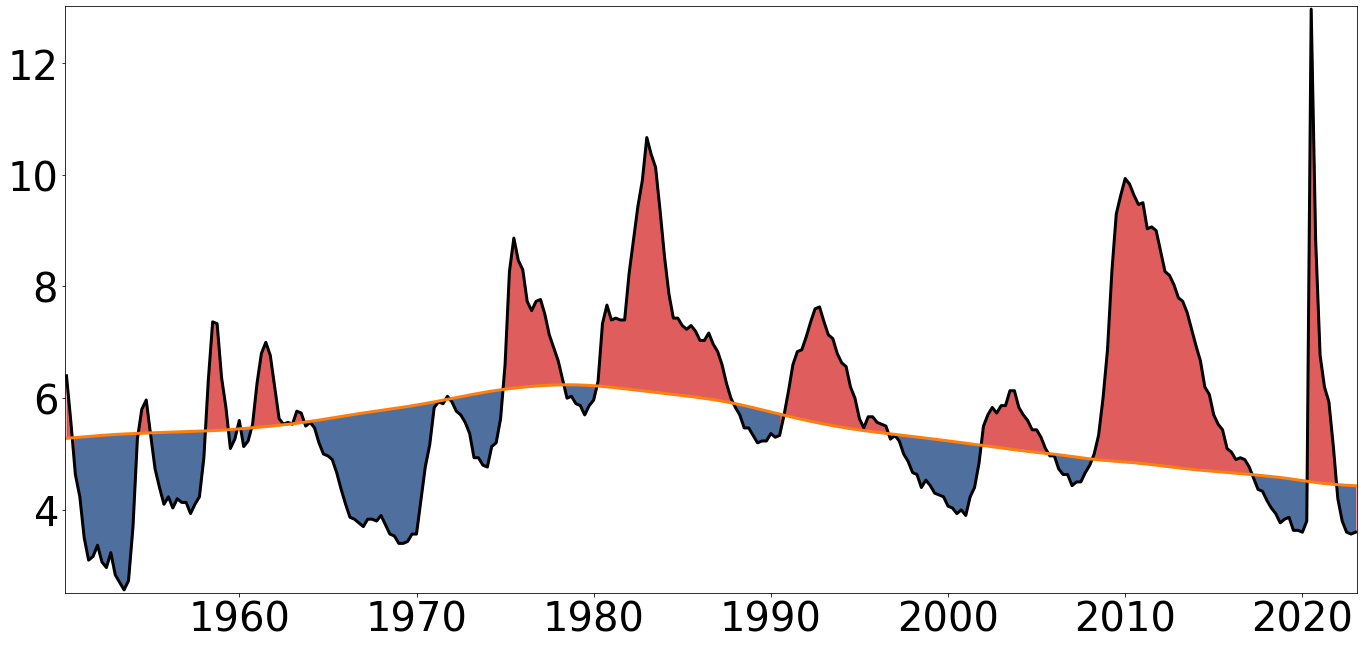

In [67]:
plt.rcParams['axes.xmargin'] = .001
plt.rcParams['axes.ymargin'] = .005
plt.rcParams.update({'font.size': 40})
fig, ax = plt.subplots(figsize = (20,10))
plot_data = data_dict["Data"]
index = plot_data.index
u = ax.plot(list(index), plot_data["$U$"], color = "k", linewidth = 3)
un = ax.plot(list(index), plot_data["$U_N$"], color = "C1", linewidth = 3)
blue_data = plot_data.copy()
blue_data["$U$"][blue_data["$U$"] > plot_data["$U_N$"]] = np.nan
ax.fill_between(index, data["$U_N$"], data["$U$"], color ="C3", alpha = .75)
ax.fill_between(blue_data.index, blue_data["$U_N$"], blue_data["$U$"], color ="C0", alpha = .75)

fig.tight_layout()

## 7.2 Phillips Curve 
### 7.2.1 Wages and Unemployment

The Phillips Curve posits a relationship between inflation and unemployment. It was originally formulated using wage increases as a proxy for demand for labor. A fall in the unemployment rate was indicative of an increase in the demand for labor which results in an increase in the wage paid to labor. This relationship was a relatively steady one, largely due to the fact that inflation expectations were approximately 0\% under a gold standard. Further, this meant that inflation expectations were anchored. In short, the Phillips Curve reflects that:

$$\Delta W_t = f(U_{t-1})$$

Wage increases since the last period will be a function of the rate of unemployment in the last period. The lower the unemployment rate, the greater the increase in wage required for further decreases in the rate. 

$$\Delta W_t = \alpha \frac{D_L - S_L}{S_L}$$
  
We can see that as $D_L$ increases, the values of the numerator relative to the denominator increases and, therefore, wages increase. A bit of a trick is played, however, when the inflation rate is substituted for the wage rate, as is presented in the first equation. The assertion being that inflation increases are channel through the labor market. High inflation seems to reflect a tight labor market if this is true. Again, this makes sense in a world where inflation is anchored to 0\% and inflation expectations are, therefore, also anchored.

The finding was quickly interpeted as a basis for framing policy. High inflation is the price to be paid for a lower rate of unemployment. In the 1950s, we might consider the U.S. and the world to be in the twilight years of the gold standard. This was sufficient, however, to anchor expectations. The data that resulted appears to have followed the relationship posited by the Phillips Curve. The expectations revolution, however, would dispel much of the excitement.    

Text(0, 0.5, '$\\pi_{CPI}$')

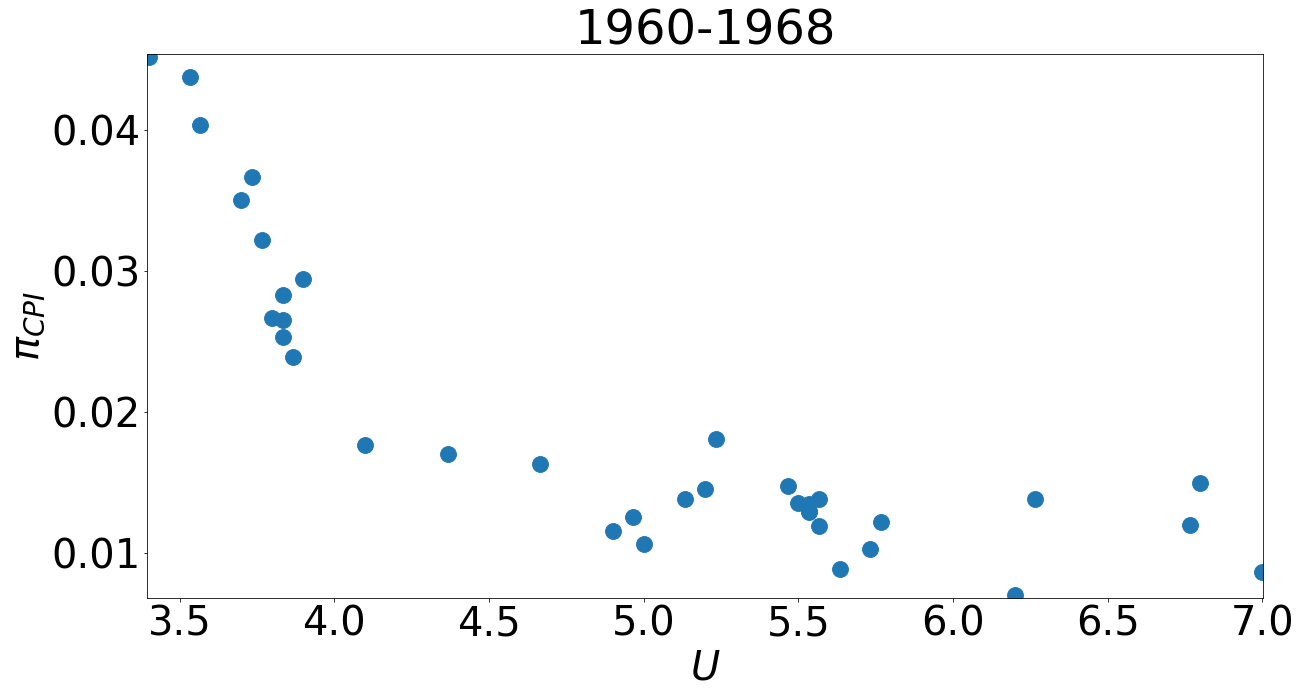

In [68]:
start, end = "1960", "1968"
fig, ax = plt.subplots(figsize = (20,10))
data_dict["Rate"].loc[start:end].plot.scatter(x = "$U$", y = "$CPI_{Urban}$", ax = ax,  s = 250)
ax.set_title(start + "-" + end)
ax.set_ylabel("$\pi_{CPI}$")

In [69]:

tests = {}       
for diffs, data in data_dict.items():
    tests[diffs] = {}
    for key in data:
        res_ADF_aut = sm.tsa.stattools.adfuller(data[key].dropna(), maxlag = 4, autolag = None,
                                           regression="c", regresults = True)
        tests[diffs][key] = res_ADF_aut[1]
pd.DataFrame(tests).T.round(3)

$CPI_{Urban}$    $U$  $U_N$    GDP   LRAS  $y_{ct}$
Data           1.000  0.004  0.726  1.000  0.999       NaN
Log            0.968  0.004  0.726  0.204  0.009     0.001
Rate           0.103  0.004  0.726  0.000  0.070     0.000
Diff           0.000  0.000  0.696  0.000  0.003     0.000
2Diff          0.000  0.000  0.098  0.000  0.000     0.000

#### Dickey-Fuller Test
$H_0$: Data has unit root. Tests indicate that null not rejected for CPI inflation. Therefore, we use the differenced data for the simple Philips-Curve regression.

In [70]:
reg_data = data_dict["Rate"].loc[start:end].diff(diff).dropna()
formula = "Q('$U$') ~ Q('$CPI_{Urban}$')"#.shift(" + str(diff) + ")"
# formula = "Q('inf') ~ unem"
reg = smf.ols(formula = formula,
               data = reg_data)
results = reg.fit()
reg_data["$\hat{U}$"] = results.predict()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Q('$U$')   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3.994
Date:                Sun, 29 Jan 2023   Prob (F-statistic):             0.0548
Time:                        18:43:06   Log-Likelihood:                -32.698
No. Observations:                  32   AIC:                             69.40
Df Residuals:                      30   BIC:                             72.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1360      0

Text(0, 0.5, '$\\pi_{CPI}$')

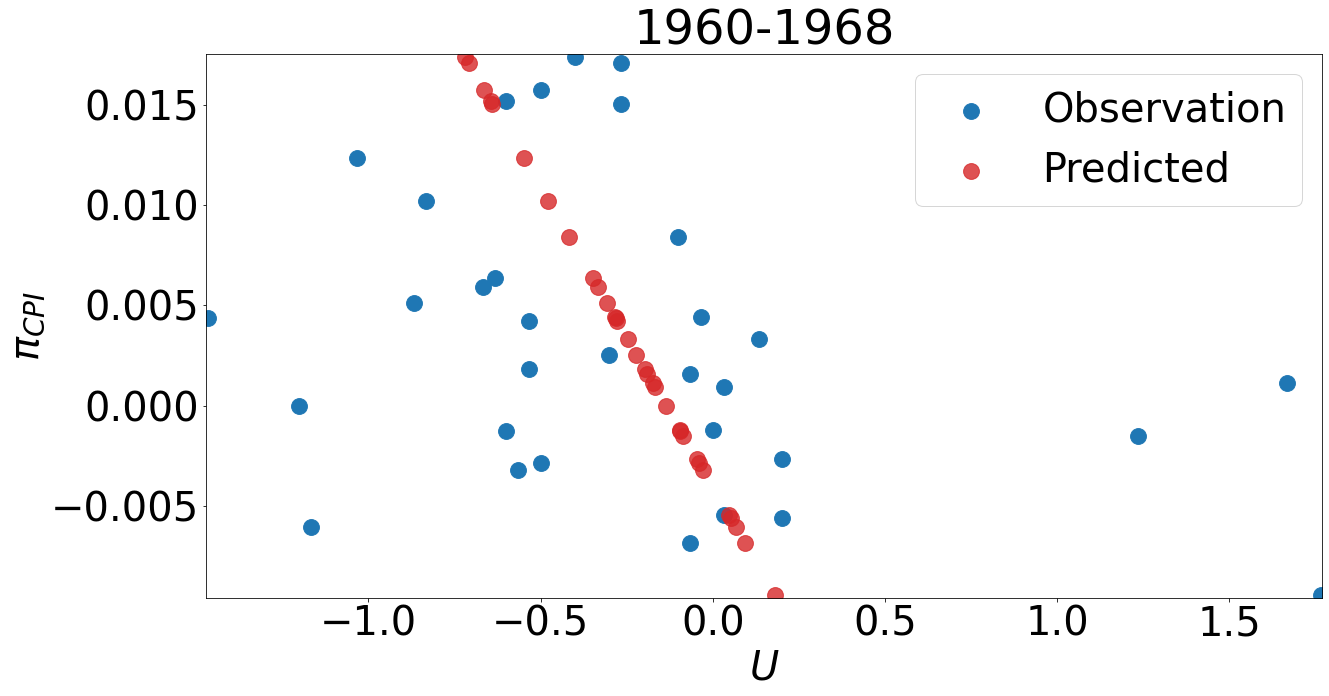

In [71]:
fig, ax = plt.subplots(figsize = (20,10))
reg_data.plot.scatter(x = "$U$", y = "$CPI_{Urban}$", ax = ax, label = "Observation", s = 250)
ax.scatter(reg_data["$\hat{U}$"], reg_data["$CPI_{Urban}$"], color = "C3", label = "Predicted", s = 250, alpha = .8)
ax.legend()
ax.set_title(start + "-" + end)
ax.set_ylabel("$\pi_{CPI}$")

### 7.2.2 Expectations Augmented Phillips Curve
 
Of course, nominal wages are a function of demand and of inflation. We can rewrite the equation:

$$\Delta W_t = f(U) + \pi_e$$
   
By including inflation expectations in the description of the Phillips Curve, it can be rewritten:

$$\Delta W = f(U) + \beta \pi_e$$

If $\Delta W = \pi$, then we rewrite:

$$\pi = f(U) + \beta \pi_e$$

Thus:

$$\pi = \frac{f(U)}{1-\beta}$$

A perfectly inelastic long-run Phillips indicates that $\beta = 1$. If this is the case, then there can only exist a short-run tradeoff between inflation and unemployment. In fact, the mechanism completely switches. Whereas before inflation had been posited as a consequence of increase in demand for labor, presentation of the Expectations Augmented Phillips Curve separates the inflation expectations of labor from observed inflation, with inflation expectations of labor lagging behind actual inflation. That being the case, labor is temporarily underpaid and the rate of unemployment moves below the natural rate, $U_N$.

This also implies a challenge that wen unrecognized by Keynesians. As the central bank raises the rate of inflation, inflation expectations of labor rise. This is reflected in the ability of labor to demand wage increase in sync with expected inflation increases. Labor can be offered regular cost of living adjustments that are dictated by expected rates of inflation. But if inflation falls and these cost of living adjustments are already included in contracts, the wages of labor will become elevated relative to their equilirbriumm levels. If the central bank lowers the rate of inflation (disinflation), the rate of unemployment will actually move above the natural rate of unemploymen, $U_N$. Excess unemployment will persist until inflation expecations of labor adjust to the new reality. The high level of unemployment experienced during the early 1980s was a consequence of precisely this dynamic.

<img src="https://github.com/jlcatonjr/Macroeconomics-Growth-and-Monetary-Equilibrium/blob/main/Chapter%2010/Figure%2010.png?raw=true" alt="Inflation and Short-run Fall in Unemployment"/>

<img src="https://github.com/jlcatonjr/Macroeconomics-Growth-and-Monetary-Equilibrium/blob/main/Chapter%2010/Figure%2012.png?raw=true" alt="Disinflation sand Short-run Increase in Unemployment"/>


Text(0, 0.5, '$\\pi_{CPI}$')

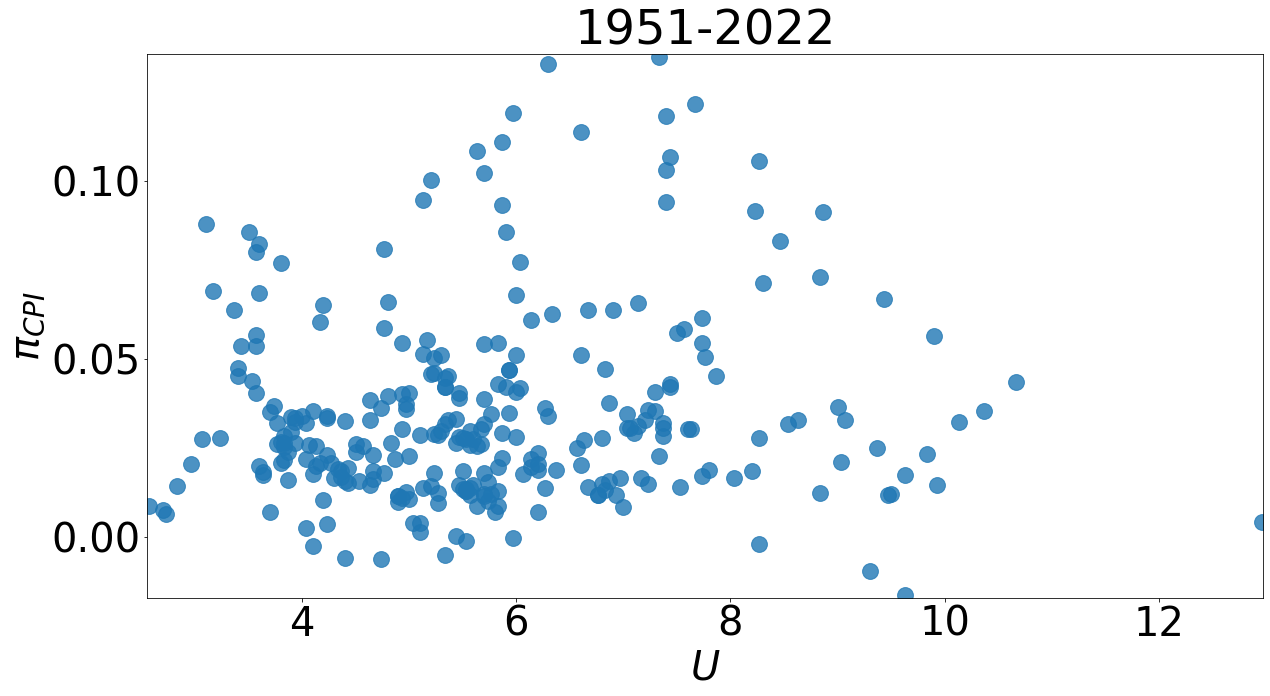

In [72]:
index = list(data_dict["Rate"].dropna().index)
start, end = str(index[0])[:4], str(index[-1])[:4]

fig, ax = plt.subplots(figsize = (20,10))
data_dict["Rate"].plot.scatter(x = "$U$", y = "$CPI_{Urban}$", ax = ax,alpha = .8,  s = 250)
ax.set_title(start + "-" + end)
ax.set_ylabel("$\pi_{CPI}$")

In [73]:
reg_data = data_dict["Rate"].diff(diff).dropna()
formula = "Q('$U$') ~ Q('$CPI_{Urban}$') + 0"
reg = smf.ols(formula = formula ,
               data = reg_data)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":diff})
reg_data["$\hat{U}$"] = results.predict()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Q('$U$')   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              7.793
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                     0.00560
Time:                        18:43:09   Log-Likelihood:                         -481.74
No. Observations:                 284   AIC:                                      965.5
Df Residuals:                     283   BIC:                                      969.1
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Q('$CPI_{Urban}$')   -21.9351      7.858     -2.792      0.005     -37.336      -6.534
==============================================================================
Omnibus:                      117.251   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.412
Skew:                           1.406   Prob(JB):                    1.34e-233
Kurtosis:                      12.095   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

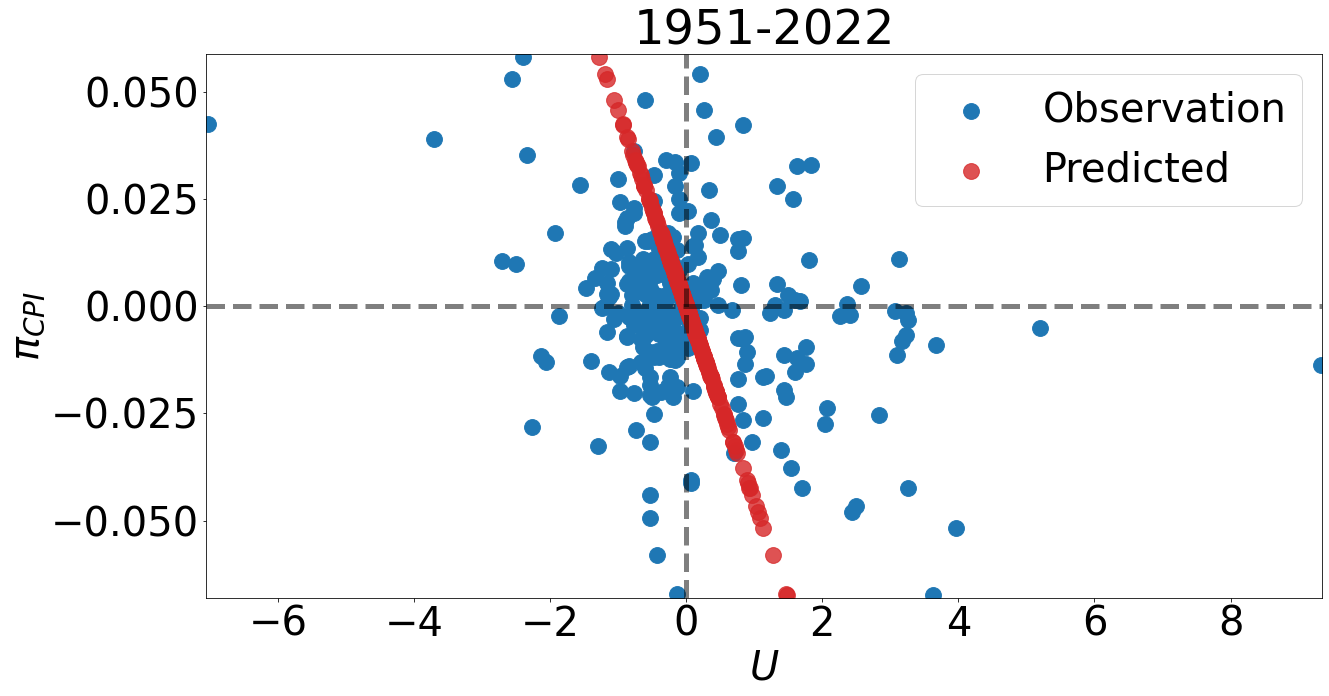

In [74]:
index = list(reg_data.index)
fig, ax = plt.subplots(figsize = (20,10))
reg_data.plot.scatter(x = "$U$", y = "$CPI_{Urban}$", ax = ax, label = "Observation", s = 250)
ax.scatter(reg_data["$\hat{U}$"], reg_data["$CPI_{Urban}$"], color = "C3", label = "Predicted", s = 250, alpha = .8)
ax.legend()
ax.set_title(start + "-" + end)
ax.set_ylabel("$\pi_{CPI}$")
ax.axvline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)
ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

### 7.1.3 New Classical Formulation

$$\pi_t = \pi_{e_t} - \phi(U_t-U_{N_t}) + \phi\theta S_t$$

$$U_T = U_N - \frac{1}{\phi}(\pi_t - \pi_{e_t}) + \theta S_t$$

$$\pi_t = \Delta M_t + \theta D_t$$

$$\pi_{e_t} = \Delta M_{e_t}$$

#### Agents form expectations around monetary expansion rule:
$$\Delta M_t = \lambda_0 + \lambda_1 (U_{t-1} - U_{N_{t-1}}) + \theta\Delta M_t$$

Since agents know the average rate of growth of $M$, $\theta$, they will expect that deviations from the rate of grwoth will be defined by deviations from the natural rate of unemployment:

$$\Delta M_{e_t} = \lambda_0 + \lambda_1(U_{t-1} - U_{N_{t-1}})$$

We see that $\theta M_t$ indicates moentary surprise:

$$\Delta M_t - \Delta M_{e_t} = \theta\Delta M_t$$

Since $\pi_t + \pi_{e_t} = \theta\Delta M_t + \theta D_t$:

$$U_t = U_{N_t} - \frac{1}{\theta}(\theta\Delta M_t + \theta D_t) + \theta S_t$$

In short, unanticipated increases ind the rate of expansion of the quantity of money will tend to lower unemployment relative to $U_{N_t}$. Economic actors already anticipate the rule based response of monetary policy, leading the outcome where $U_t=U_{N_t}$. In short, the rational expectations approach suggests that a rule based policy cannot promote rates of unemployment below the natural rate. Only unexpected expansion, defined by the term $\theta \Delta M_t$, can temporarily reduce unemployment below the natural rate.

### 7.1.4 Okun's Law

Okun's Law suggests that correlations between the cyclical component of real GDP and the unemployment rate are tightly, negatively correlated. Production in excess of potential GDP will tend to generate unemployment below the natural rate of unemployment. Following McCallum, we will observe that referring to "high (low) unemployment rates [relative to the natural rate] are essentially the same phenomena as low (high) values of output measured relative to trend or 'normal' values."

Text(0.5, 1.0, "Okun's Law")

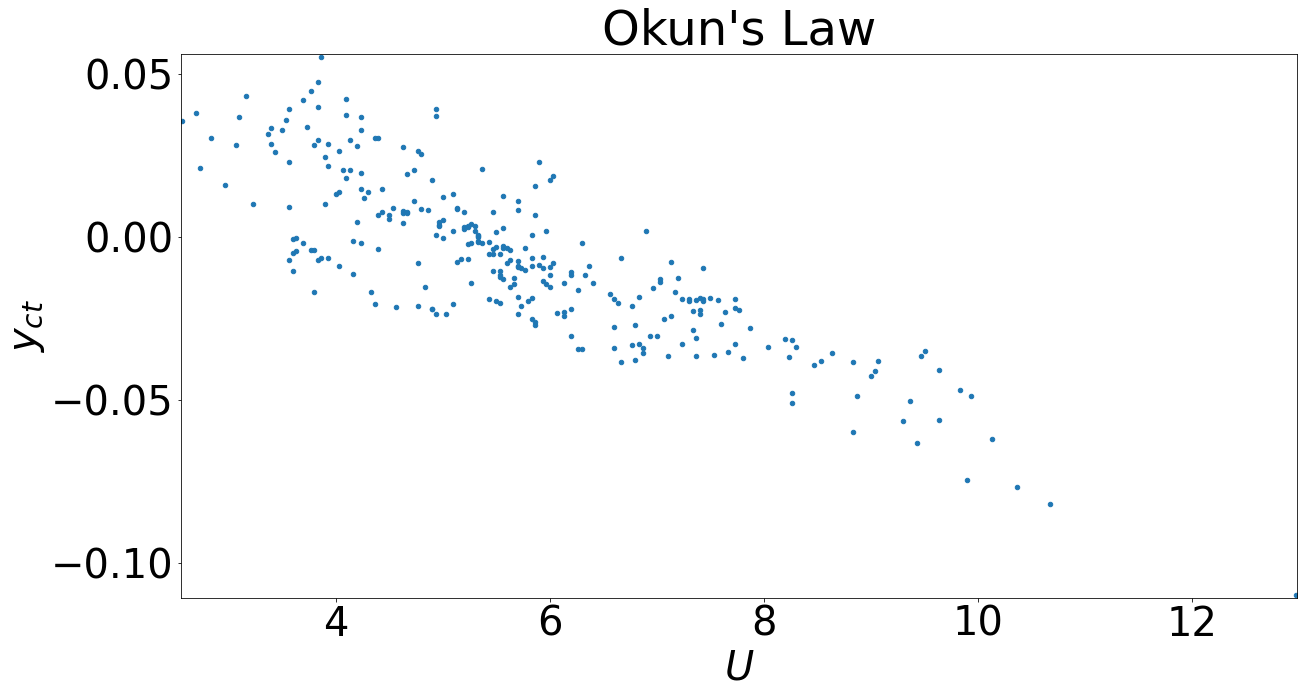

In [75]:
fig, ax = plt.subplots(figsize = (20,10))
data_dict["Log"].plot.scatter(x ="$U$", y ="$y_{ct}$", ax = ax)
ax.set_title("Okun's Law")

Text(0.5, 1.0, "Okun's Law\n(Year-over-Year Difference)")

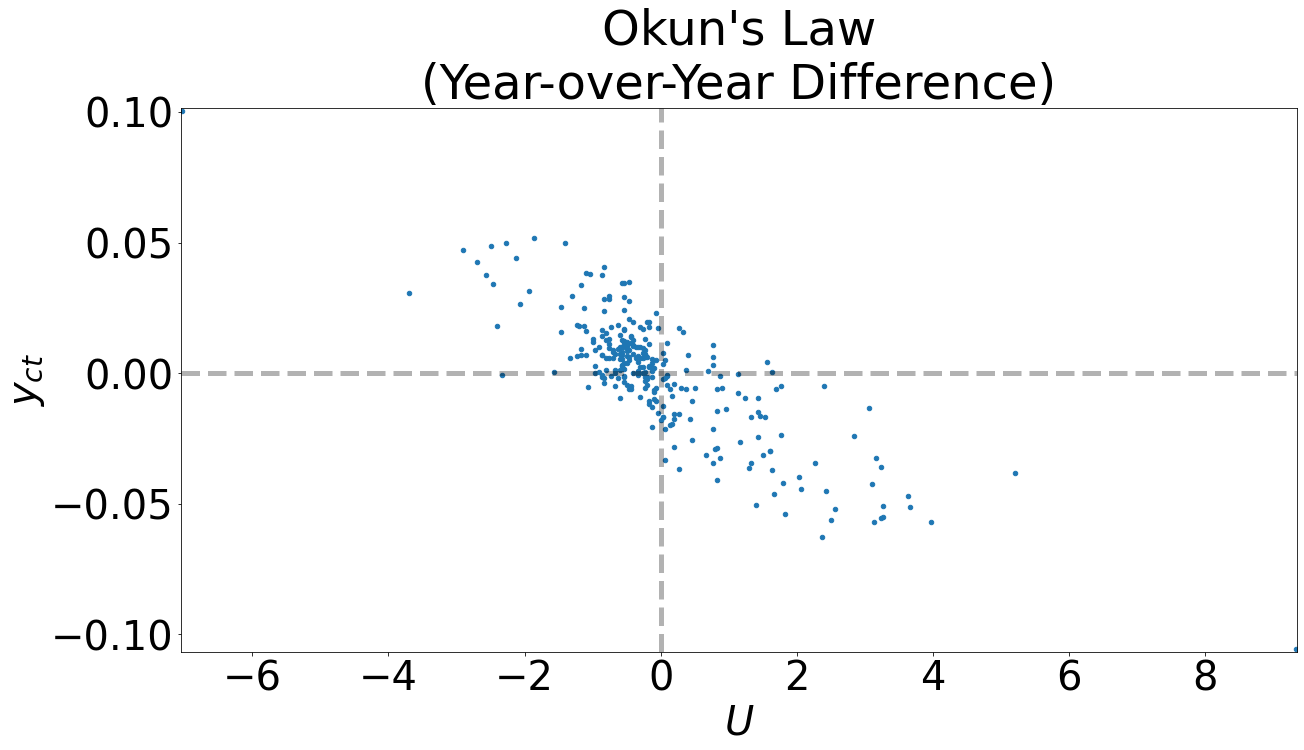

In [76]:
fig, ax = plt.subplots(figsize = (20,10))
data_dict["Log"].diff(diff).plot.scatter(x ="$U$", y ="$y_{ct}$", ax = ax)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .3)
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .3)
ax.set_title("Okun's Law\n(Year-over-Year Difference)")

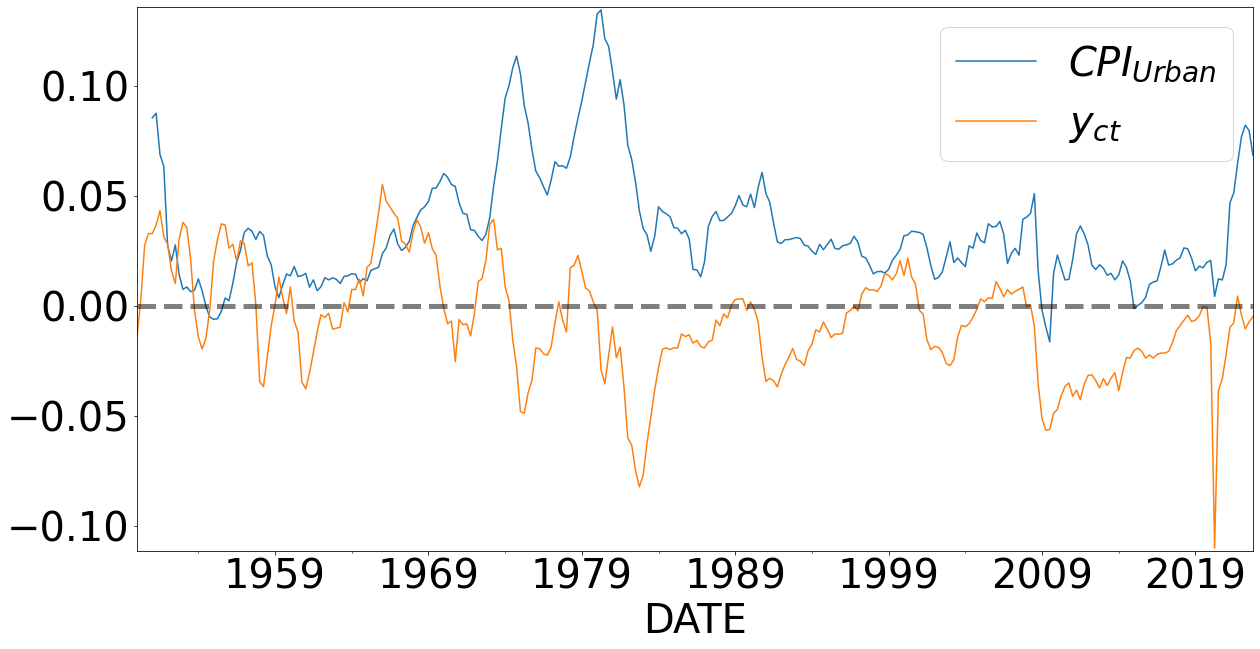

In [102]:
fig, ax = plt.subplots(figsize = (20,10))
data_dict["Log"][["$CPI_{Urban}$"]].diff(4).plot.line(ax = ax)
data_dict["Log"][["$y_{ct}$"]].plot.line(ax = ax)
ax.axhline(0, ls = "--", color = "k", linewidth = 5, alpha = .5)

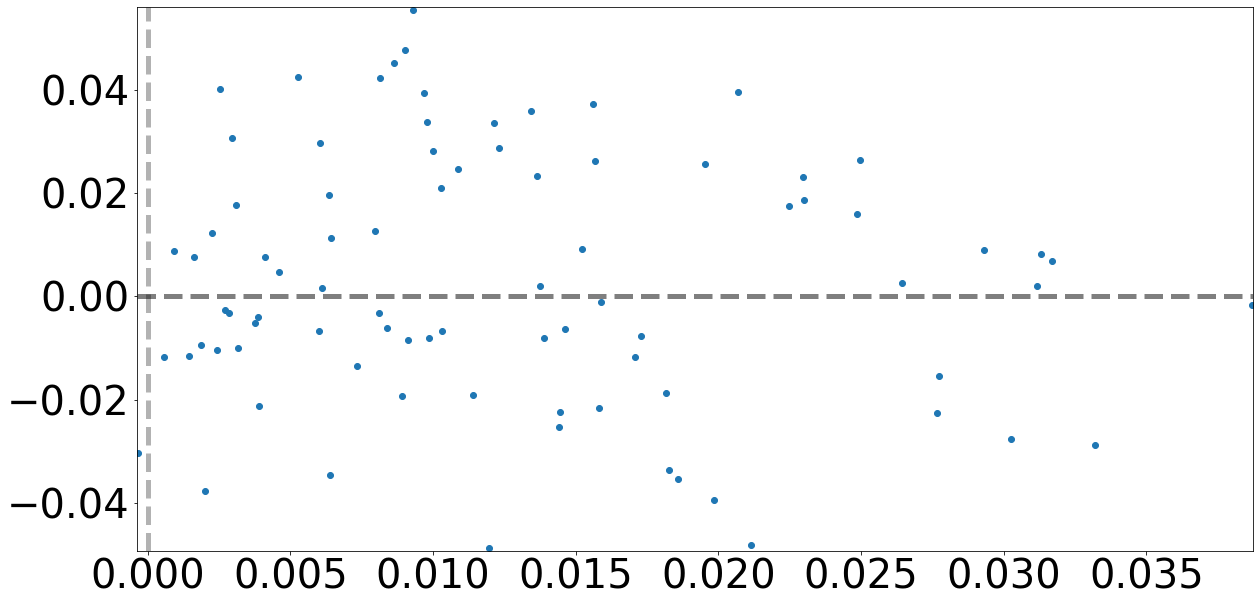

In [104]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(data_dict["Log"]["$CPI_{Urban}$"].diff().loc["1960":"1980"], data_dict["Log"].loc["1960":"1980"]["$y_{ct}$"])
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .3)
ax.axhline(0, ls = "--", color = "k", linewidth = 5, alpha = .5)

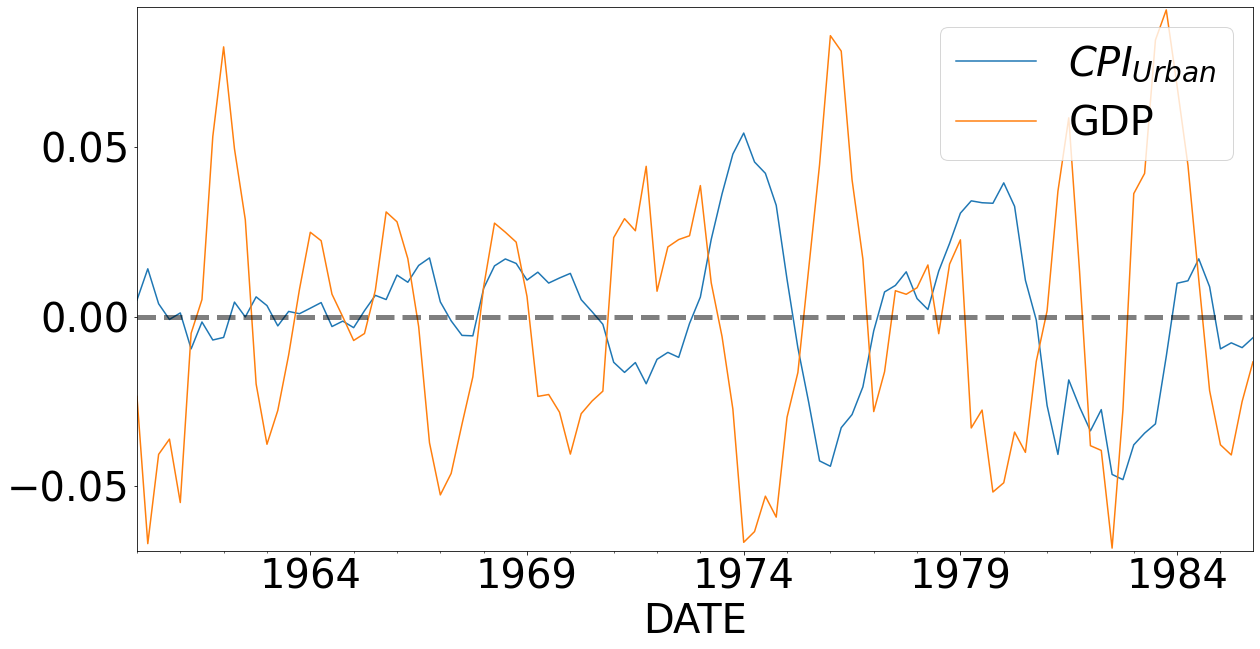

In [103]:
fig, ax = plt.subplots(figsize = (20,10))
data_dict["Diff"]["$CPI_{Urban}$"].loc["1960":"1985"].plot.line(ax = ax)
data_dict["Diff"].loc["1960":"1985"]["GDP"].plot.line(ax = ax)
ax.legend()
ax.axhline(0, ls = "--", color = "k", linewidth = 5, alpha = .5)

In [120]:
reg_data = data_dict["Diff"].loc["1960":"1980"].dropna()
formula = "Q('$CPI_{Urban}$') ~ Q('GDP')"
reg = smf.ols(formula = formula ,
               data = reg_data)
results = reg.fit(cov_type="HAC", cov_kwds={"maxlags":diff})
reg_data["$\hat{CPI}$"] = results.predict()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('$CPI_{Urban}$')   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.42
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           0.000699
Time:                        19:16:01   Log-Likelihood:                 233.26
No. Observations:                  84   AIC:                            -462.5
Df Residuals:                      82   BIC:                            -457.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0045      0.003      1.528      0.127      -0.001       0.010
Q('GDP')      -0.3202      0.091     -3.524      0.000      -0.498      -0.142
==============================================================================
Omnibus:                        4.598   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                2.946
Skew:                           0.275   Prob(JB):                        0.229
Kurtosis:                       2.265   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

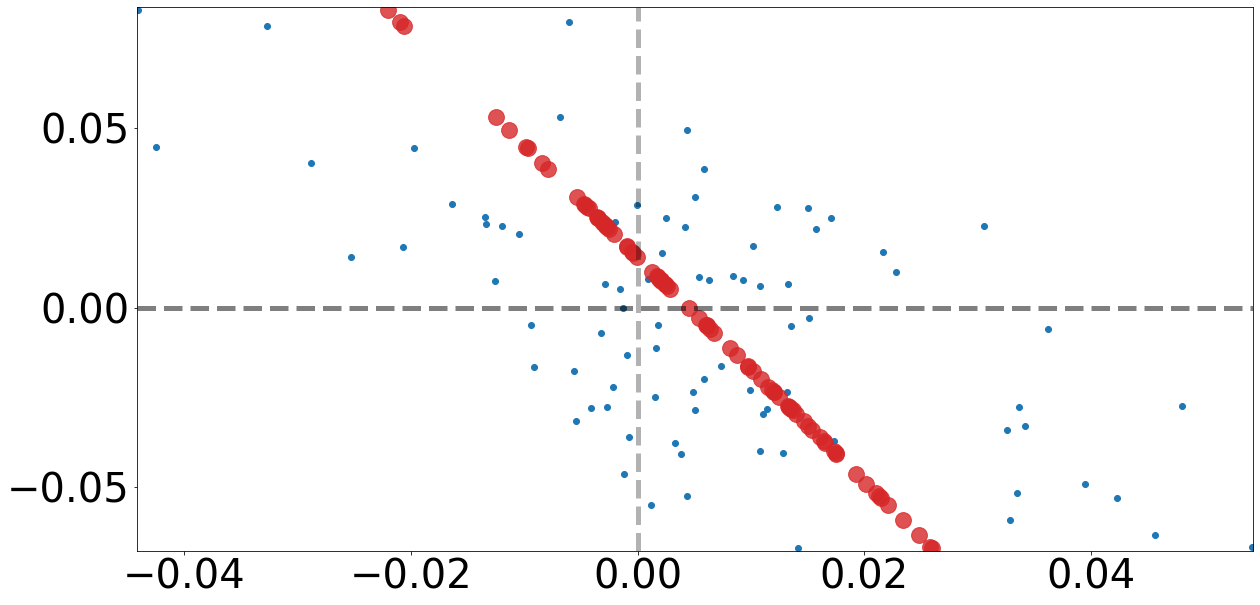

In [121]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter( data_dict["Diff"]["$CPI_{Urban}$"].loc["1960":"1980"], data_dict["Diff"].loc["1960":"1980"]["GDP"])
ax.axvline(0, ls = "--", linewidth = 5, color = "k", alpha = .3)
ax.axhline(0, ls = "--", color = "k", linewidth = 5, alpha = .5)
ax.scatter(reg_data["$\hat{CPI}$"], reg_data["GDP"], color = "C3", label = "Predicted", s = 250, alpha = .8)

In [96]:
data_dict["Log"]

$CPI_{Urban}$       $U$     $U_N$       GDP      LRAS  $y_{ct}$
DATE                                                                       
1950-03-31       3.160682  6.400000  5.281182  7.689996  7.704028 -0.014032
1950-06-30       3.168284  5.566667  5.287866  7.720038  7.717231  0.002807
1950-09-30       3.186490  4.633333  5.294604  7.757954  7.730337  0.027617
1950-12-31       3.206533  4.233333  5.301367  7.776921  7.743862  0.033059
1951-03-31       3.246361  3.500000  5.308113  7.790411  7.757404  0.033007
...                   ...       ...       ...       ...       ...       ...
2021-12-31       5.629107  4.200000  4.450651  9.903797  9.899193  0.004604
2022-03-31       5.651112  3.800000  4.445137  9.899685  9.903760 -0.004075
2022-06-30       5.676143  3.600000  4.440214  9.898237  9.908534 -0.010296
2022-09-30       5.689967  3.566667  4.435784  9.906217  9.913336 -0.007119
2022-12-31       5.697678  3.600000  4.431760  9.913343  9.918153 -0.004810

[292 rows x 6 columns]

# 7.2 Short-run Aggregate Supply
All terms are defined as logged values. Aggregate Supply is a function of long-run trend, $y_{nt}$, and the cyclical component, $y_{ct}(z)$:

$$y_t(z) = y_{nt} + y_{ct}(z)$$

The long-run trend is a function of time. Lucas presents this as being linear, but one might also fit a function with a cubic term to the data.

$$y_{nt} = \alpha + \beta t$$

The the cyclical component is a function of relative prices and an autoregressive term.

$$y_{ct}(z) = \gamma[P_t(z) - E(P_t|\Omega_t(z))] + \lambda y_{c,t-1}(z)$$

We can integrate deviation of the price level from historic norm. Further, the cyclical lag component can be defined with reference to $y_{n,t-1}$. Lucas thus defines aggregate supply as:

$$y_t = y_{nt} + \theta \gamma (P_t - \bar{P}_t) + \lambda[y_{t-1} - y_{n,t-1}]$$

Lucas defines $AD$ in terms of $x_t$:

$$x_t = y_t + P_t$$

He then provides equations for $y_{ct}$ and $\Delta P$:

$$y_{ct} = -\pi \delta + \pi\Delta x_t + \lambda y_{c,t-1}$$
$$\Delta P_t = -\beta + (1 - \pi)\Delta x_t + \pi \Delta x_{t-1} - \lambda \Delta y_{c, t-1}$$

Lucas estimates these equations separately, and then uses parameter estimates from the equation estimating $y_{ct}$ to constrain the fit of the second equation estimating $\Delta P_t$. We will estimate them separately here and consider how the Lucas's results have changed since monetary policy has tended to respond to his critique.



## Reconstructing Lucas 1973 using Penn World Tables. 

Although the Penn World Tables (PWT) will not allow us to precisely recalculate Lucas's result, it does provide data sufficient to run the same tests over longer spans of times or, alternately, over several windows. PWT provides compreshensive aggregate data reflecting aggregate estimates of annual real output, real income, the price level, capital, labor at the national level. 


In [13]:
import datetime
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
PWT = pd.read_excel("https://www.rug.nl/ggdc/docs/pwt100.xlsx", sheet_name = None)
PWT["Legend"]

Variable name                                Variable definition
0   Identifier variables                                                NaN
1            countrycode                          3-letter ISO country code
2                country                                       Country name
3          currency_unit                                      Currency unit
4                   year                                               Year
..                   ...                                                ...
62                  pl_g  Price level of government consumption,  price ...
63                  pl_x  Price level of exports, price level of USA GDP...
64                  pl_m  Price level of imports, price level of USA GDP...
65                  pl_n  Price level of the capital stock, price level ...
66                  pl_k  Price level of the capital services, price lev...

[67 rows x 2 columns]

In [14]:
data = {"Data":PWT["Data"].copy()}
data["Data"]["year"] = pd.to_datetime(data["Data"]["year"].astype(str), yearfirst = True)
data["Data"].set_index(["countrycode", "year"], inplace = True)

In [15]:
price_levels = ["xr", "pl_con", "pl_da", "pl_gdpo"]
employment_variables = ["emp", "avh", "pop"]
capital_variables = ["cn", "ctfp"]
output_variables = ["cgdpo", "cgdpe", "ccon", "cda"]
keys = price_levels + employment_variables + output_variables + capital_variables
data["Data"] = data["Data"][keys].dropna()
data["Data"].groupby("countrycode").mean().index == "NGA"
# data["Data"]["U"] = data["Data"]["emp"].div(data["Data"]["pop"]).mul(-1) + 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

## Create a list of relevant codes

Included here are codes for OECD countries as well as countries used by Lucas. The data for countries with excessive inflation, for example, Argentina has suffered excessive rates of inflation, yet the average rate of inflation calculated from the PWT is far lower than should be expected given the experience of the country. Therefore, we should be skeptical concerning results from these countries. Since results are calculated separately for each country, however, I elect to include all OECD countries as well as any other presented by Lucas.

In [16]:
ccode_dct = dict(set(list(PWT["Data"].reset_index().set_index(["countrycode", "country"]).index)))
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]
lucas_countries = ["Argentina", "Austria", "Belgium", "Canada", "Denmark", 
                   "Germany", "Ireland", "Italy", "Netherlands", "Norway", 
                   "Sweden", "United Kingdom", "United States", 'Venezuela (Bolivarian Republic of)']
oecd_ccodes = []
lucas_ccodes = []
for code, country in ccode_dct.items():
    if country in oecd_countries:
        oecd_ccodes.append(code)
    if country in lucas_countries:
        lucas_ccodes.append(code)


#include all oecd countries and others included by lucas
reg_countries = sorted(list(set(oecd_ccodes + lucas_ccodes)))

# include only the intersecting set of countries
# reg_countries = sorted([country for country in oecd_ccodes if country in lucas_ccodes])

#include only oecd countries
# reg_countries = oecd_ccodes
# reg_countries

In selecting our data, it is important that we use the expenditures measure for real GDP, not the output measure. Recall that real GDP measures income, and income is reflected in consumption expenditures and investment, which are included in the real GDP expenditures variable. We also need to include a price level. The price level generated from the output measure of GDP is appropriate here. Thus, aggregate demand reflects the product of these variables. Since we are using log terms, we can take the sum since the log of a product is the sum of logs.

In [17]:
plot_vars = ["cgdpe", "cn", "pl_gdpo", "avh", "ctfp"]#, "U"]
data["Log"] = np.log(data["Data"][plot_vars])#.groupby("countrycode").diff()
# data["Log"]["U"] = data["Data"]["U"]
# plot_data = plot_data.groupby("countrycode").diff()
plot_data = data["Log"].dropna()
plot_data.rename(columns = {"cgdpe":"y",
                            "cn":"k",
                            "pl_gdpo":"P",
                            "ctfp":"A"}, inplace = True)
plot_data["$AD_t$"] = plot_data["P"].add(plot_data["y"])
plot_data["$y_{nt}$"] = np.nan
plot_data["$y_{ct}$"] = np.nan
# plot_data["$U_{nt}$"] = np.nan
# plot_data["$U_{ct}$"] = np.nan


In [18]:
data["Log"].groupby("countrycode").mean().index

Index(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN',
       'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'ESP', 'EST',
       'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IDN', 'IND', 'IRL',
       'ISL', 'ISR', 'ITA', 'JAM', 'JPN', 'KOR', 'LKA', 'LTU', 'LUX', 'LVA',
       'MEX', 'MLT', 'MYS', 'NLD', 'NOR', 'NZL', 'PER', 'PHL', 'POL', 'PRT',
       'ROU', 'RUS', 'SGP', 'SVK', 'SVN', 'SWE', 'THA', 'TTO', 'TUR', 'TWN',
       'URY', 'USA', 'VEN', 'ZAF'],
      dtype='object', name='countrycode')

In order to construct a cylcical component, $y_{ct}$, we must first estimate an estimate for $y_{nt}$, the long-run trend whose slope indicates the long-run rate of growth for the national economy. Unlike Lucas, who uses a linear time term, the longer time series demands that the slope of the line be capable of changing. We fit a cubic term, which appears to fit most data sets quite well without overfitting. With the long-run trend estimated, we can calculate  $y_{ct}$, the cyclical component of real GDP, by taking the difference of observed values, $y$, and the fitted line, $y_{nt}$. Lucas hypothesized that increases in aggregate demand that are lift the cyclical component in time $t$ will be transmitted to the price level in time $t + 1$. Since we are using logged values, the value of parameter estimating the influence of an increase in aggregate demand at time t, $x_t$ should be reflected in the price level in the following period. $\Delta P_t$ should be impacted increase by $(1-\pi)$. Further, if short-run aggregate supply socks are transient such that they last no longer than a year, then the lagged aggregate demand term, $x_{t-1}$, should influence inflation by a magnitude of $\pi$. If, however, short-run aggregate supply shocks show persistence, then this effect wil take more than one year to show up in the inflation term. 

y          k         P       avh         A  \
countrycode year                                                             
ARG         1954-01-01  10.835619  11.276726 -1.404486  7.625357 -0.340331   
            1955-01-01  10.919694  11.338373 -1.386649  7.627256 -0.345168   
            1956-01-01  10.937960  11.387317 -1.346500  7.629155 -0.365232   
            1957-01-01  10.981328  11.423213 -1.323681  7.631054 -0.358812   
            1958-01-01  11.054846  11.482322 -1.310272  7.632954 -0.316482   
...                           ...        ...       ...       ...       ...   
VEN         2002-01-01  12.118865  13.777312 -0.755372  7.511536 -0.872323   
            2003-01-01  12.107862  13.794720 -0.835425  7.496214 -0.917700   
            2004-01-01  12.366028  13.832767 -0.794600  7.547868 -0.741575   
            2005-01-01  12.605062  13.889676 -0.775671  7.561564 -0.561578   
            2006-01-01  12.766115  13.987177 -0.702245  7.551634 -0.485785   

                           $AD_t$   $y_{nt}$  $y_{ct}$  
countrycode year                                        
ARG         1954-01-01   9.431133  11.012794 -0.177175  
            1955-01-01   9.533045  11.008198 -0.088505  
            1956-01-01   9.591460  11.007177 -0.069217  
            1957-01-01   9.657647  11.009631 -0.028303  
            1958-01-01   9.744573  11.015463  0.039383  
...                           ...        ...       ...  
VEN         2002-01-01  11.363494  12.271564 -0.152699  
            2003-01-01  11.272437  12.293829 -0.185967  
            2004-01-01  11.571429  12.317167  0.048861  
            2005-01-01  11.829391  12.341669  0.263393  
            2006-01-01  12.063869  12.367426  0.398689  

[2130 rows x 8 columns]

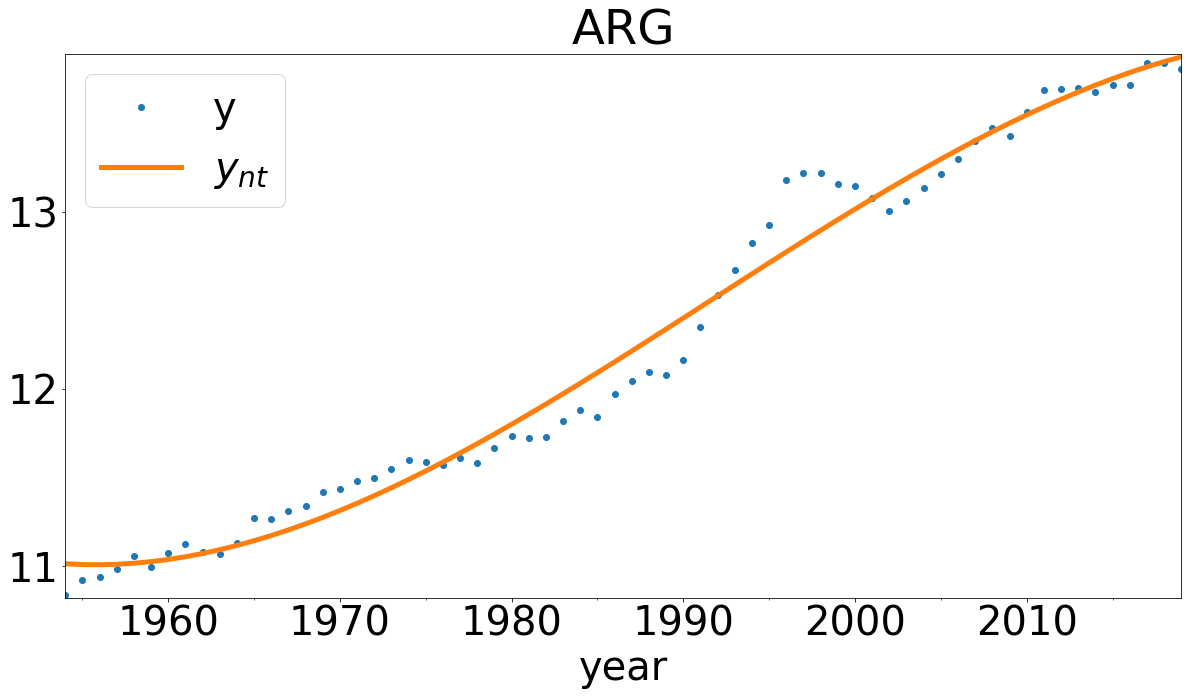

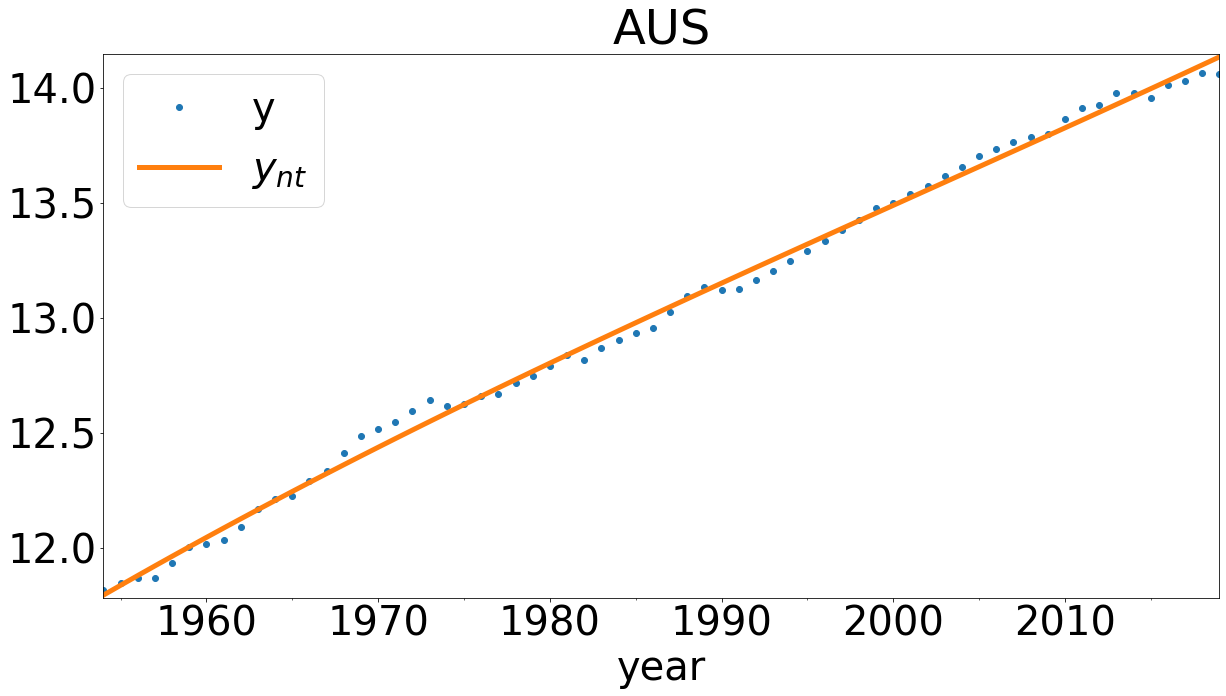

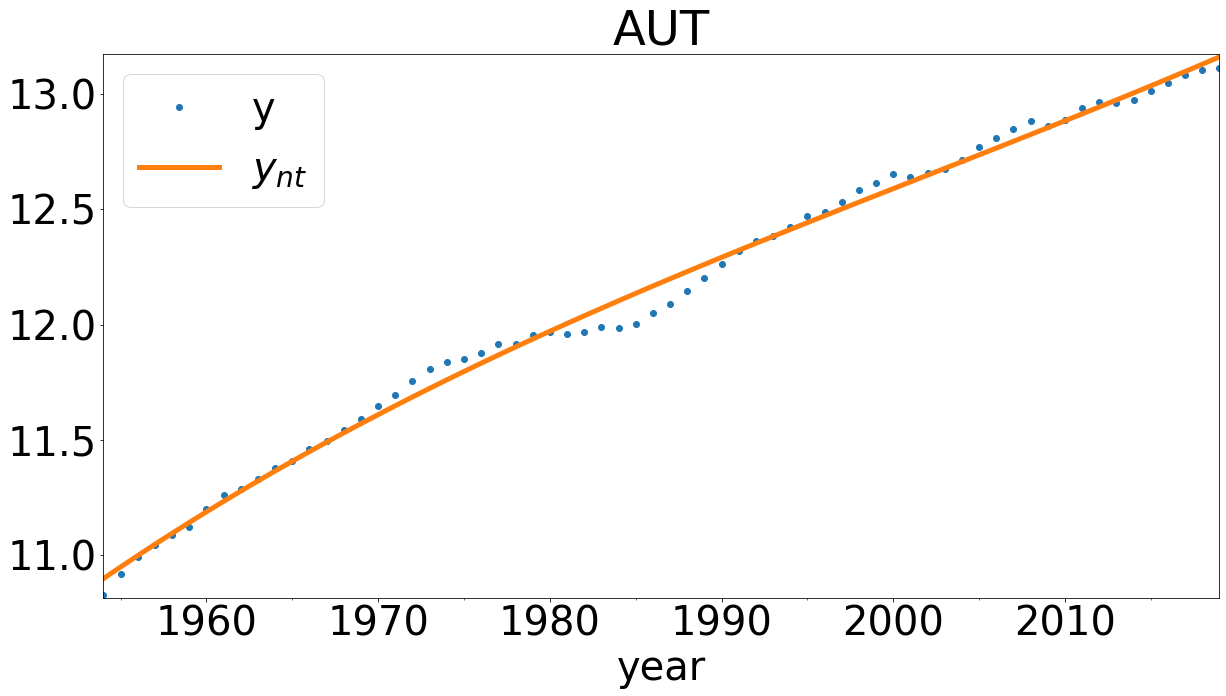

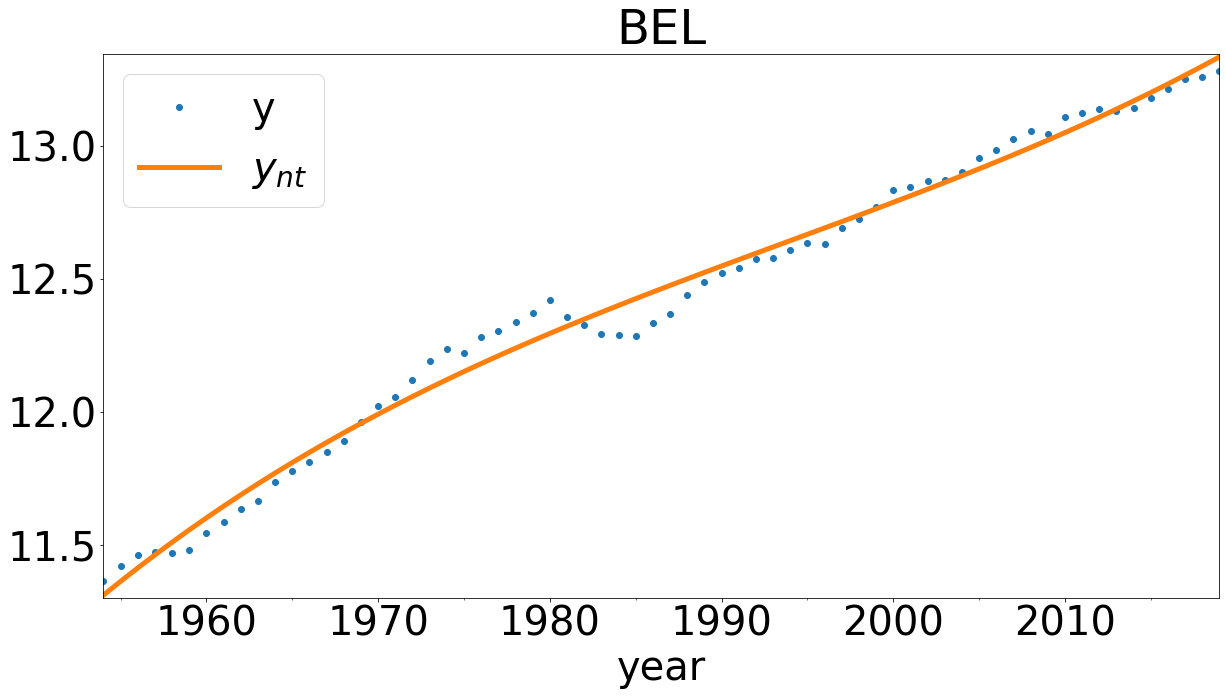

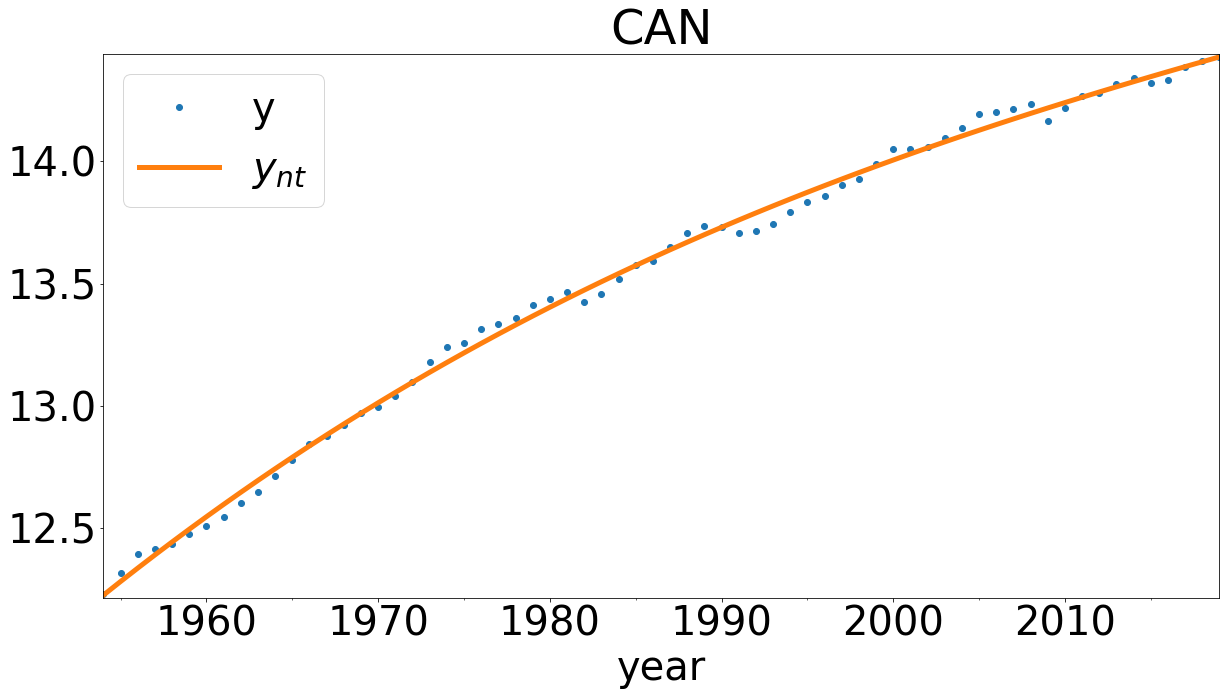

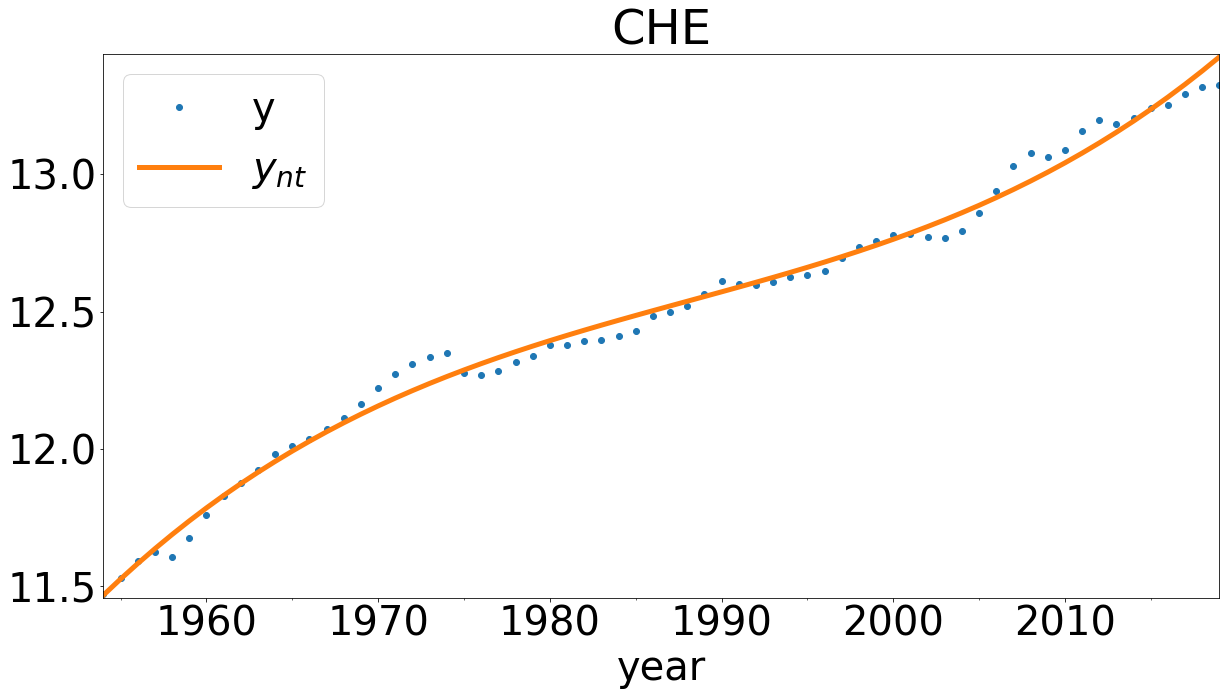

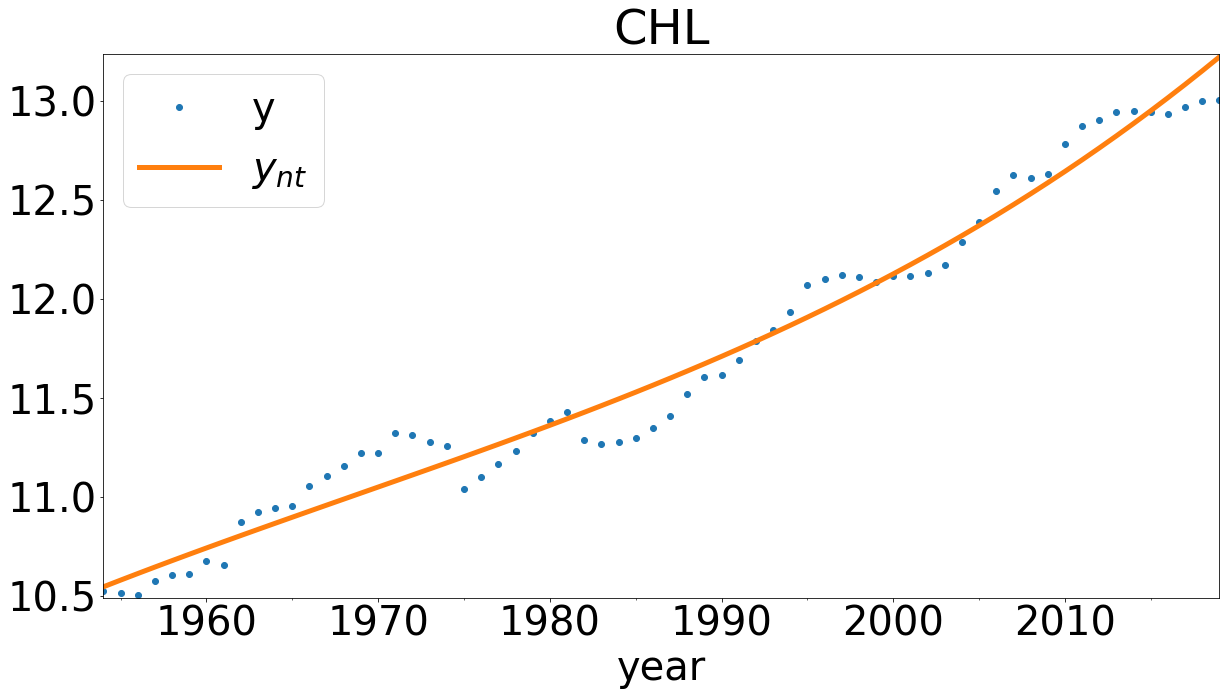

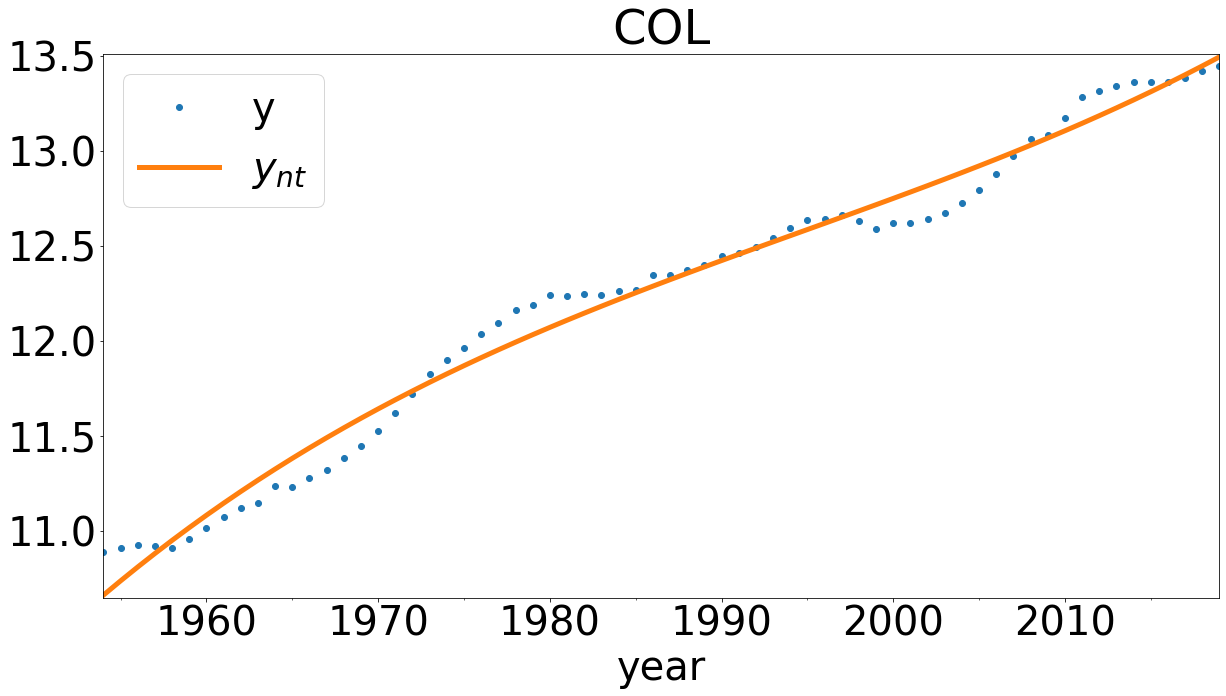

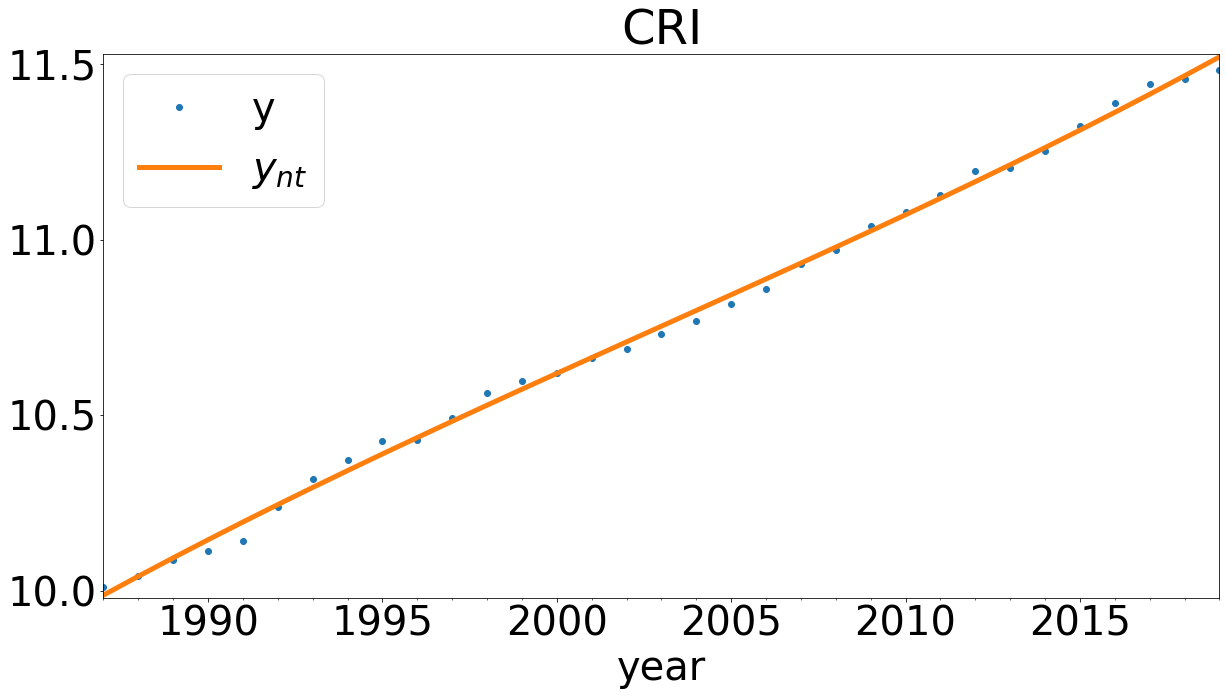

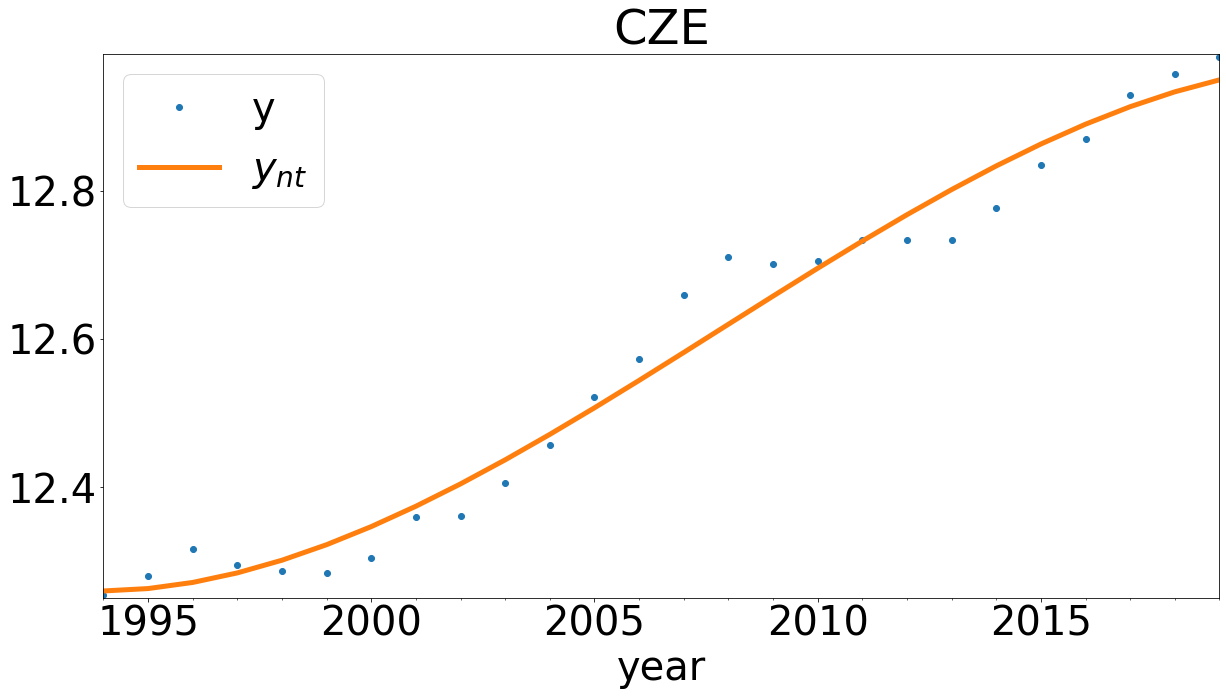

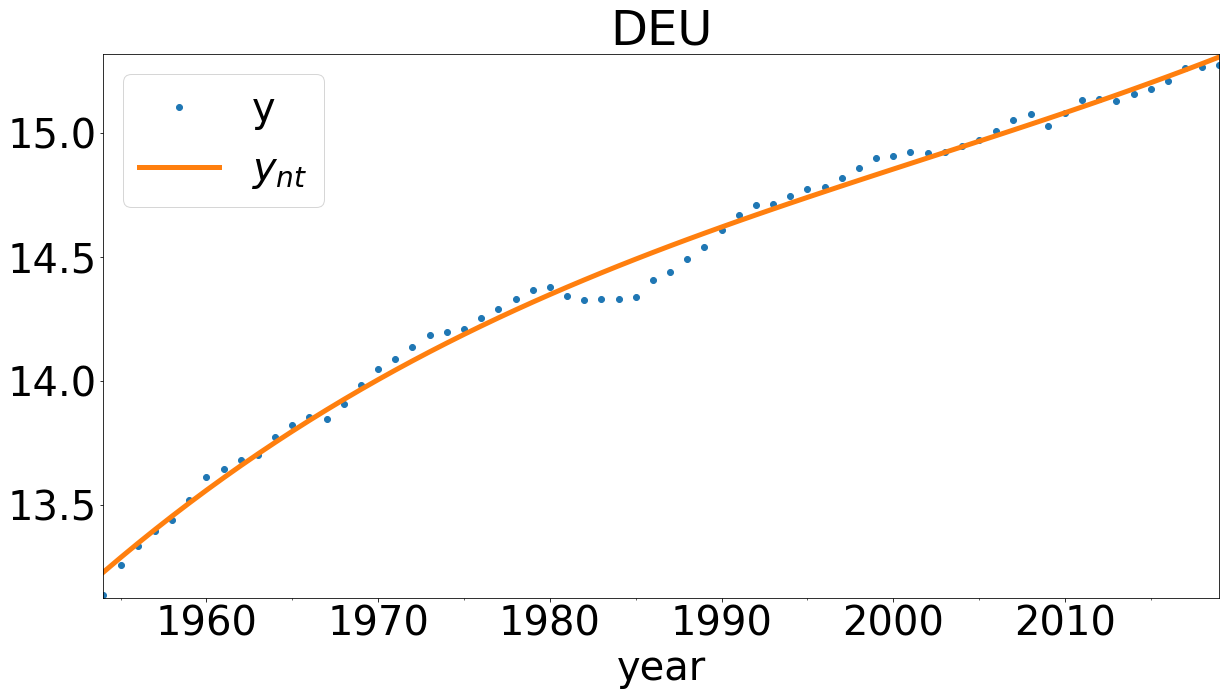

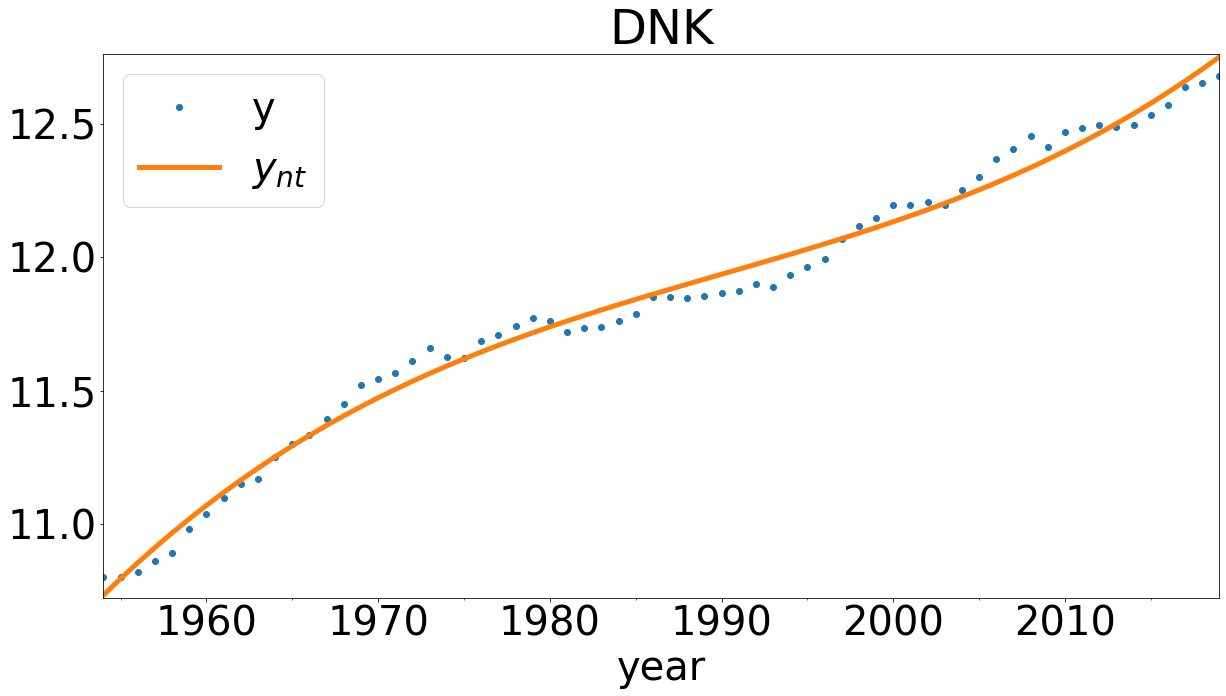

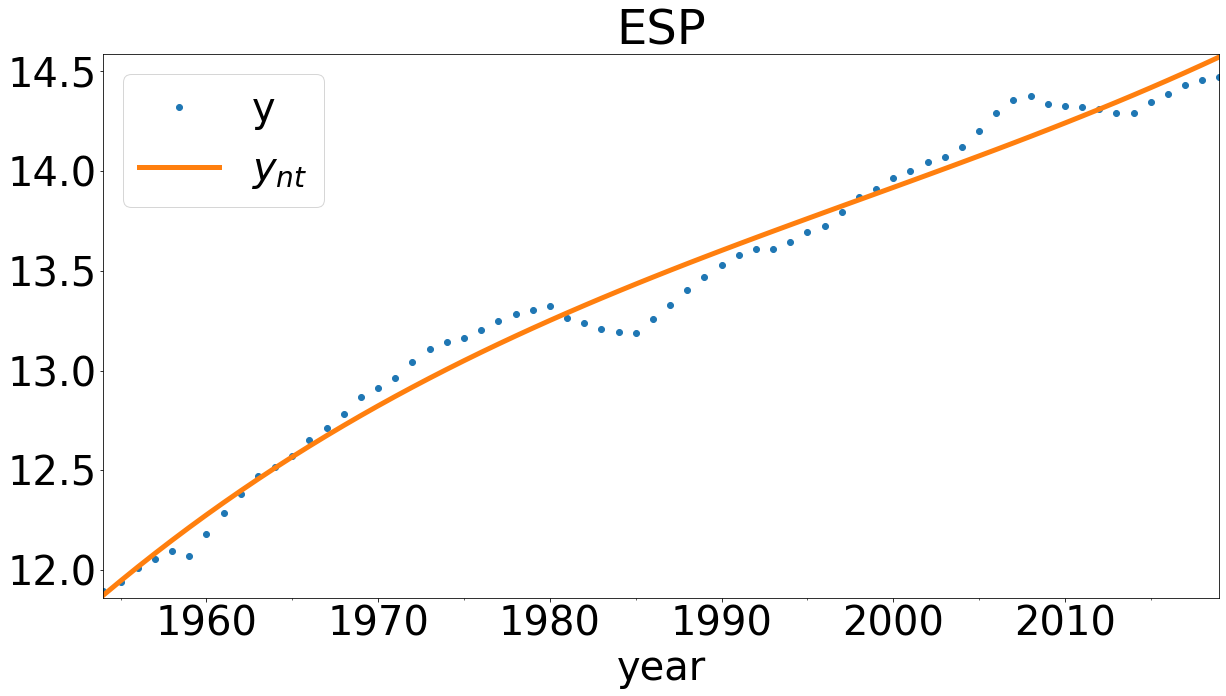

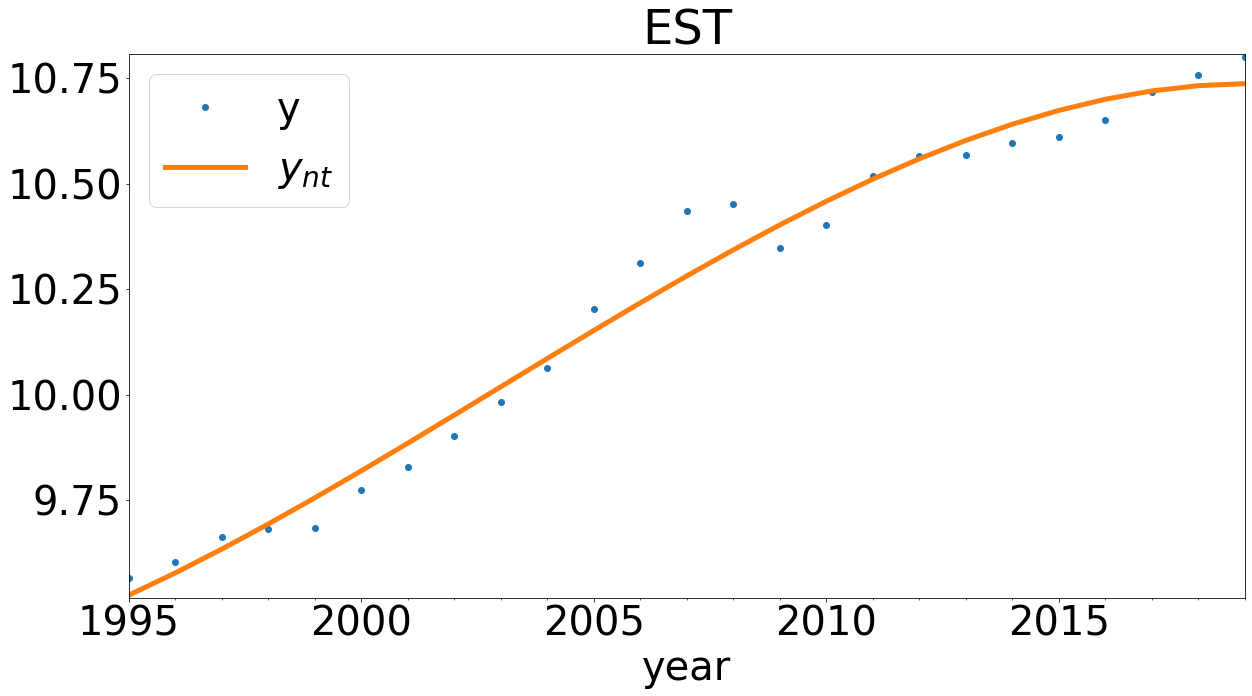

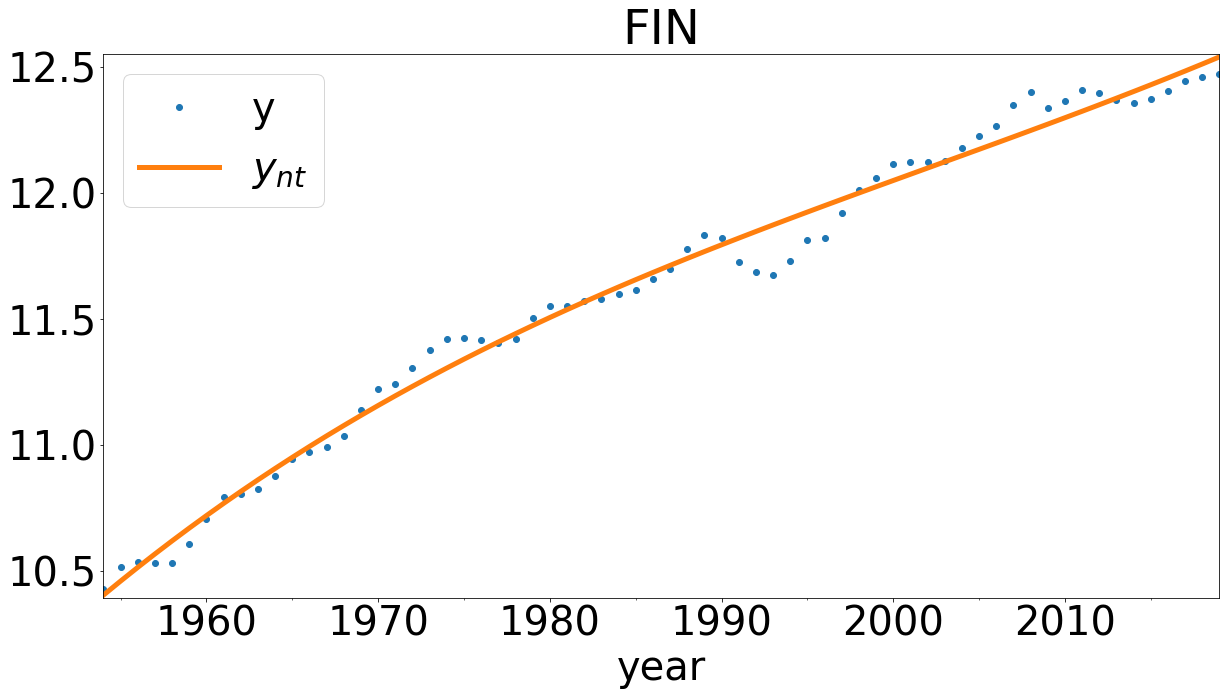

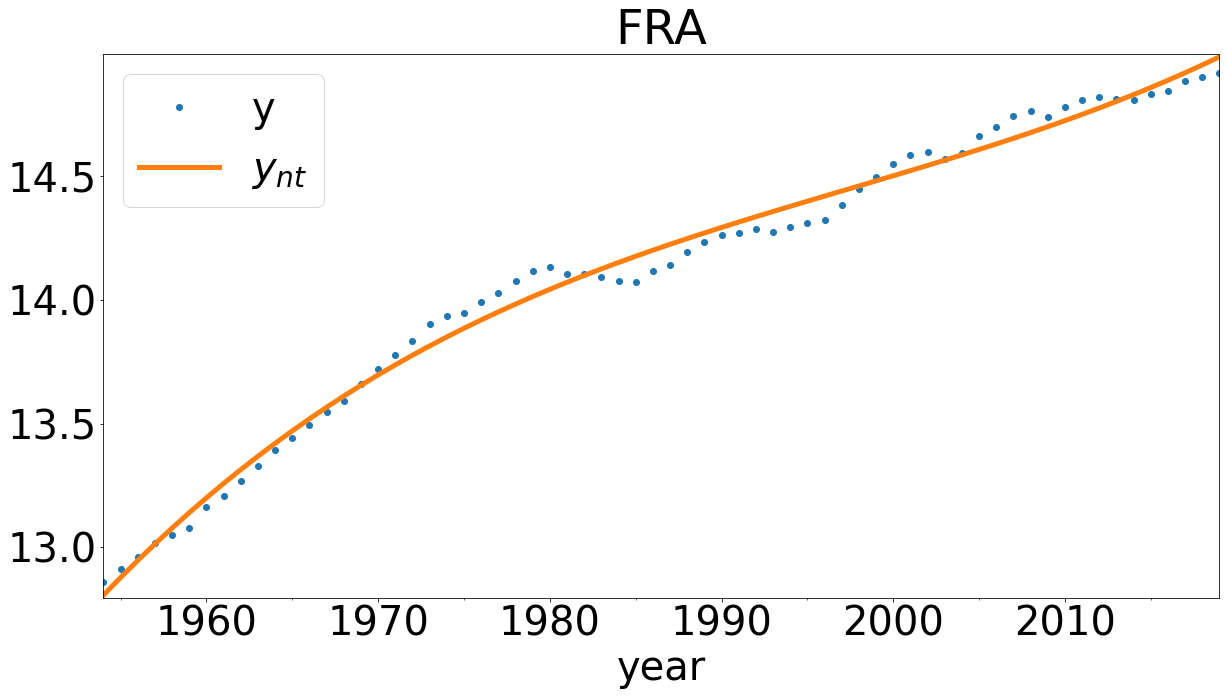

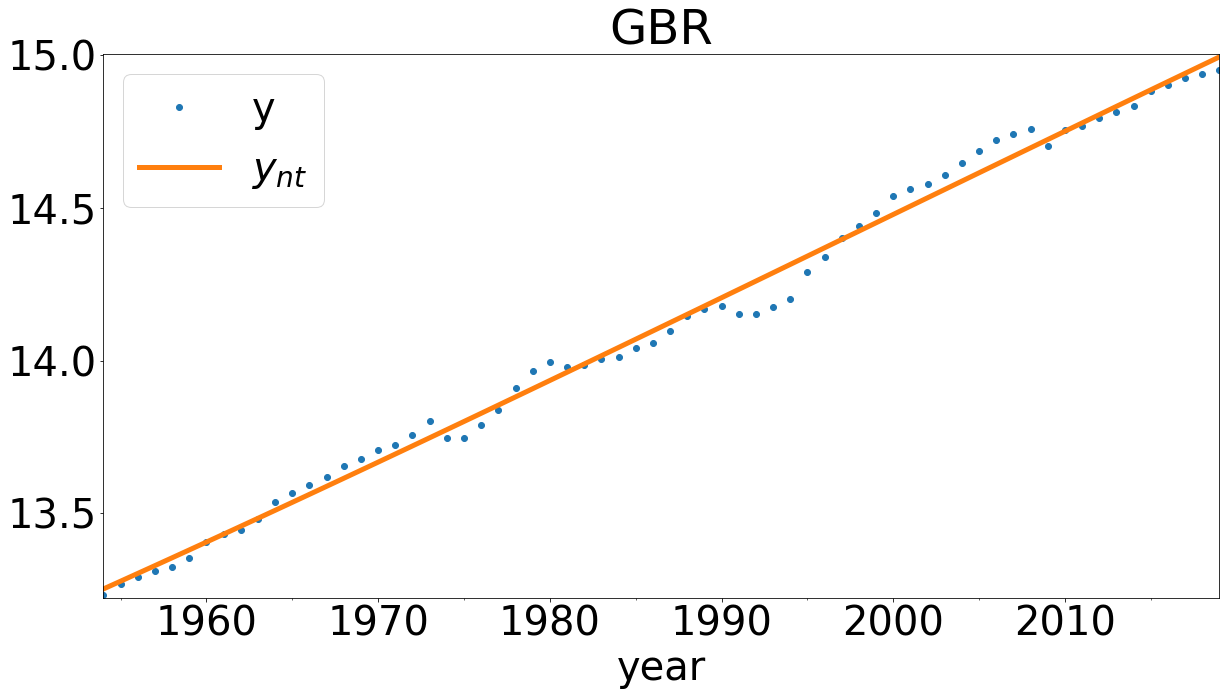

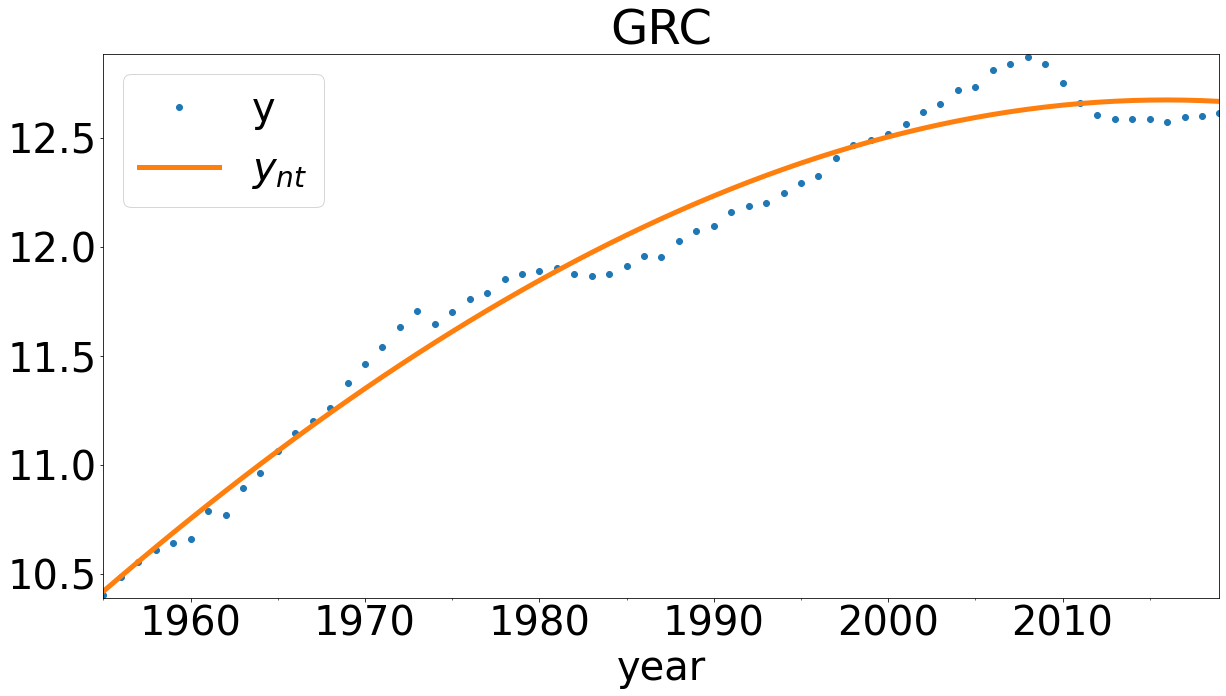

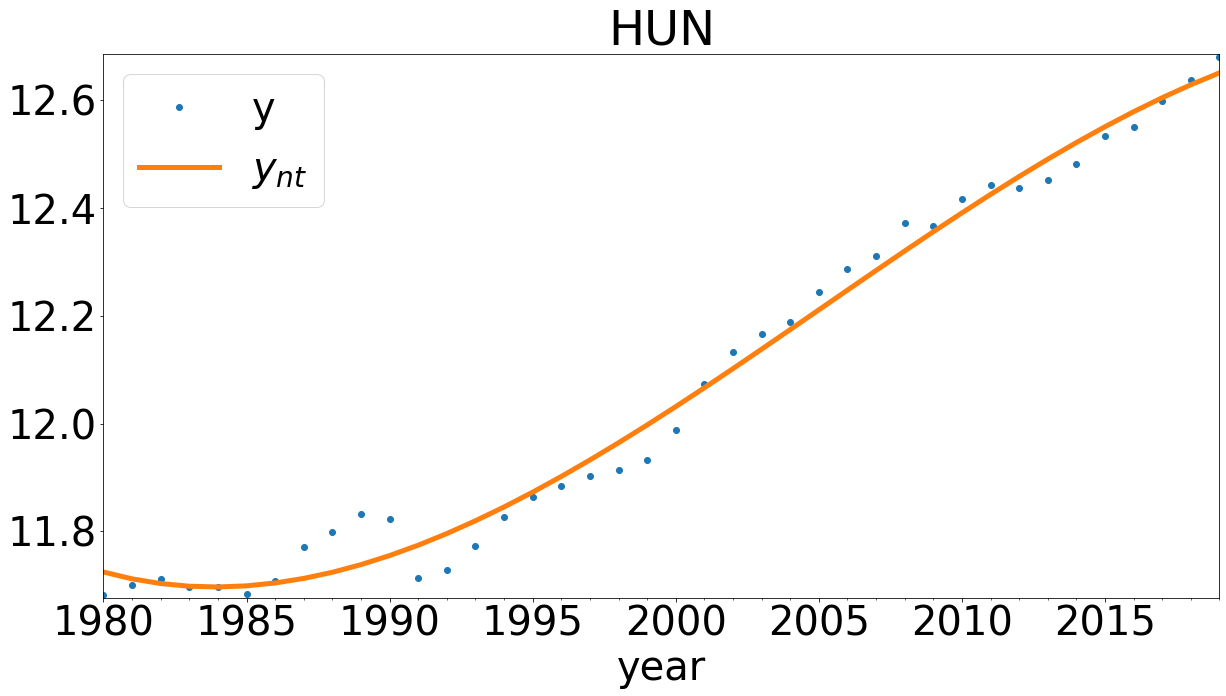

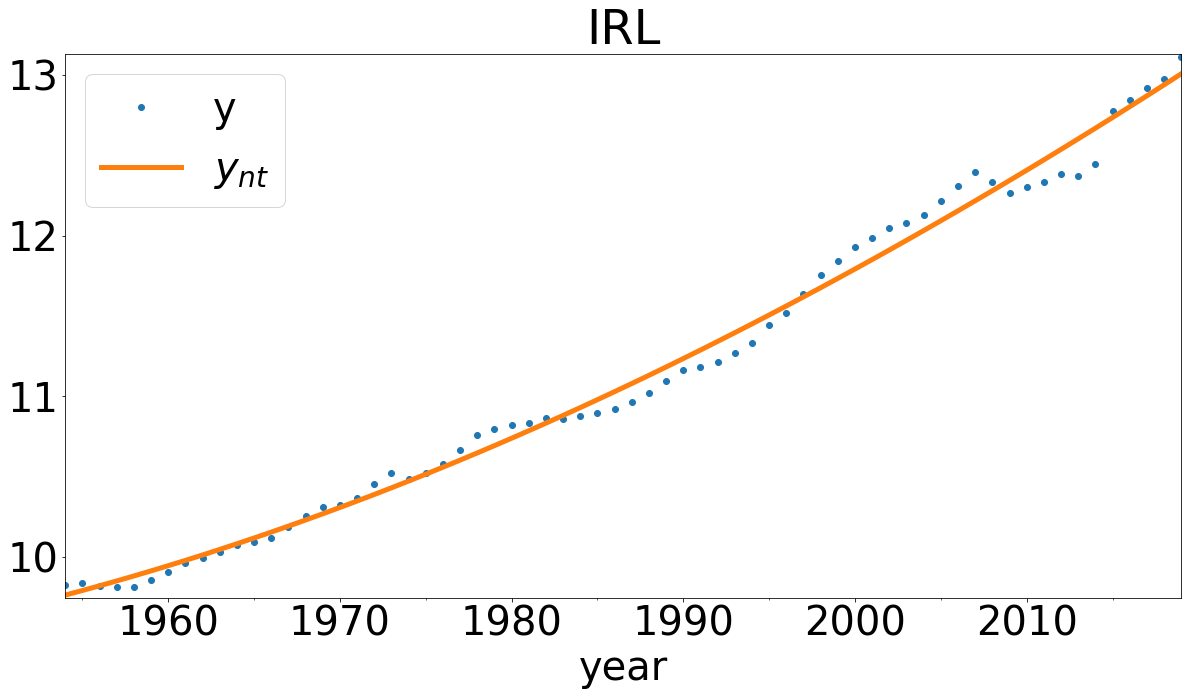

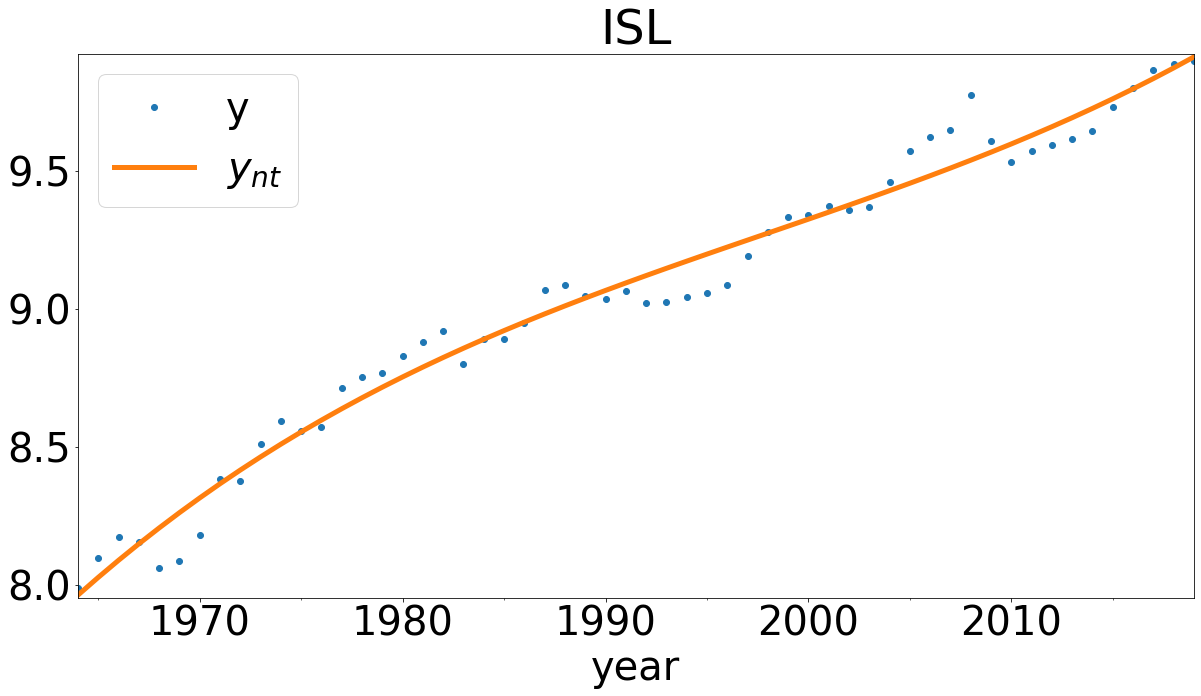

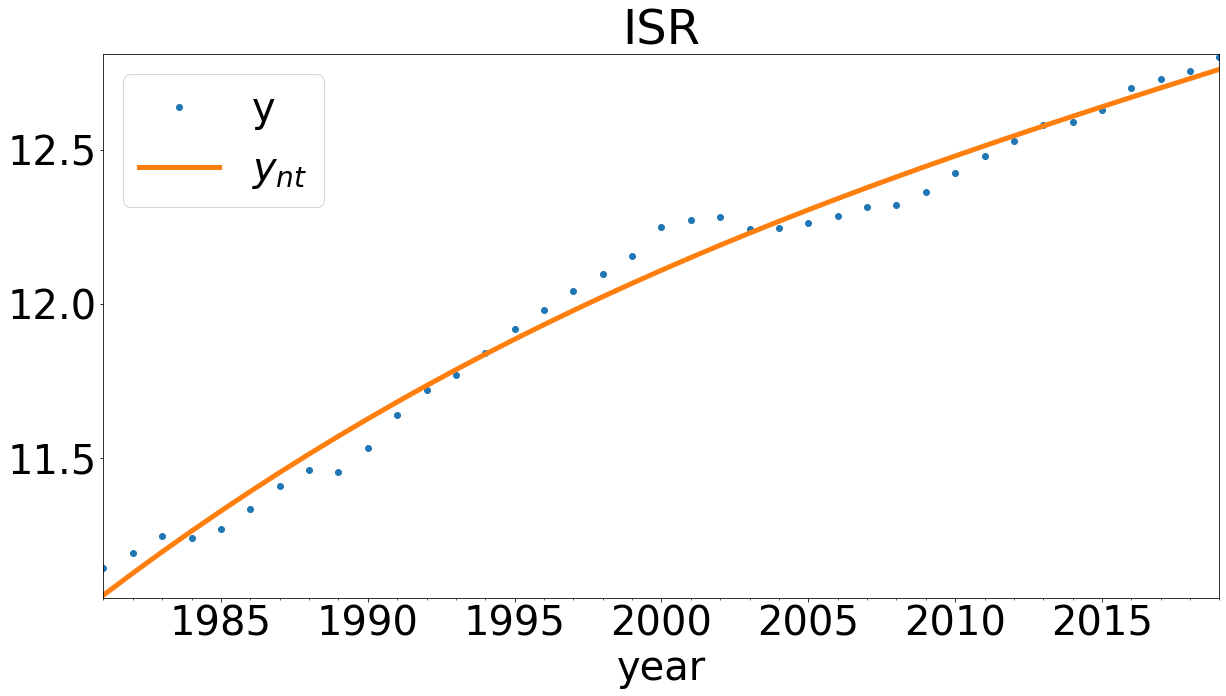

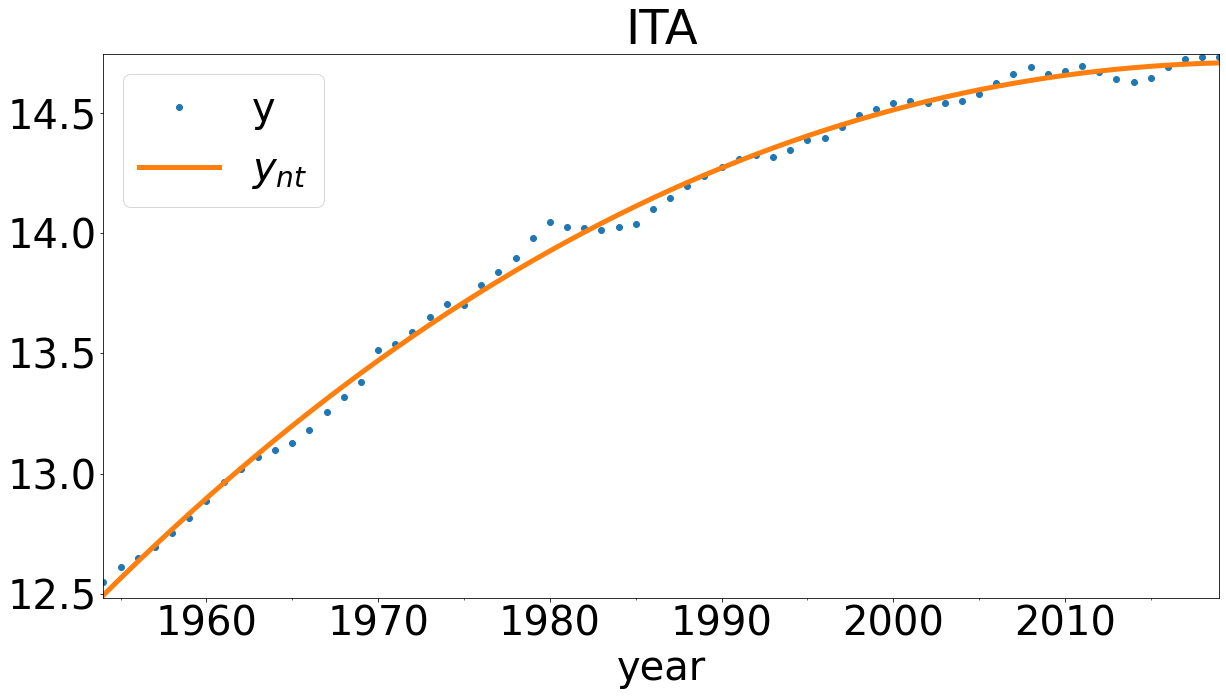

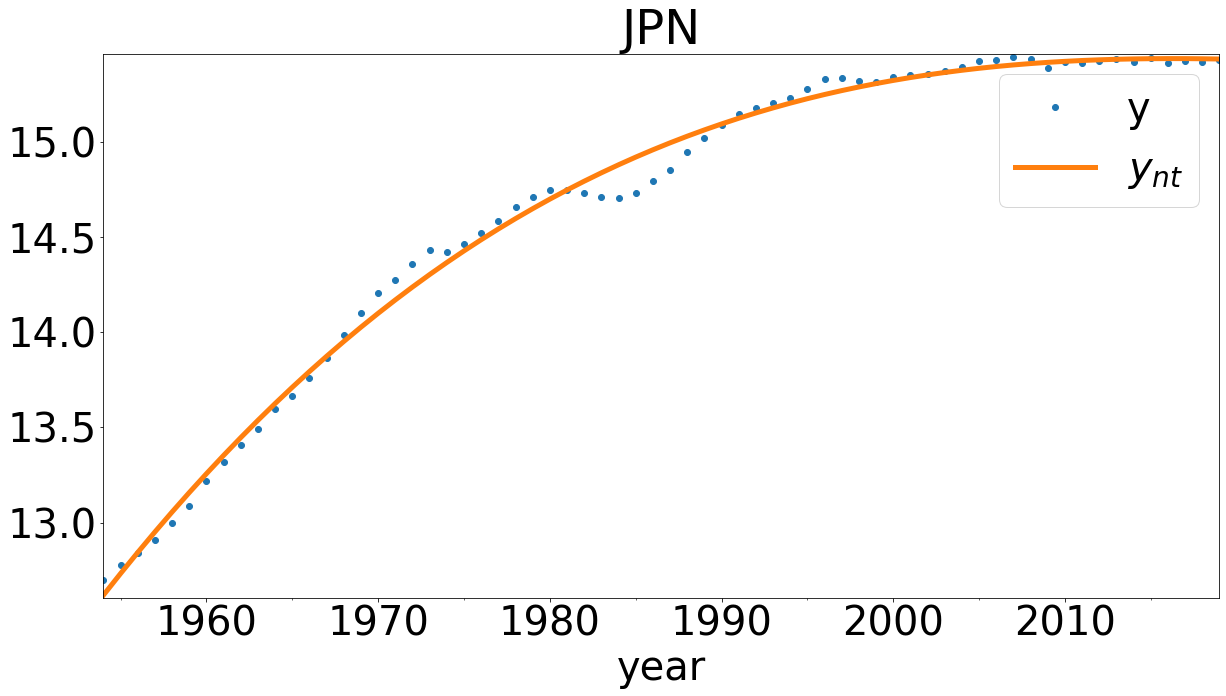

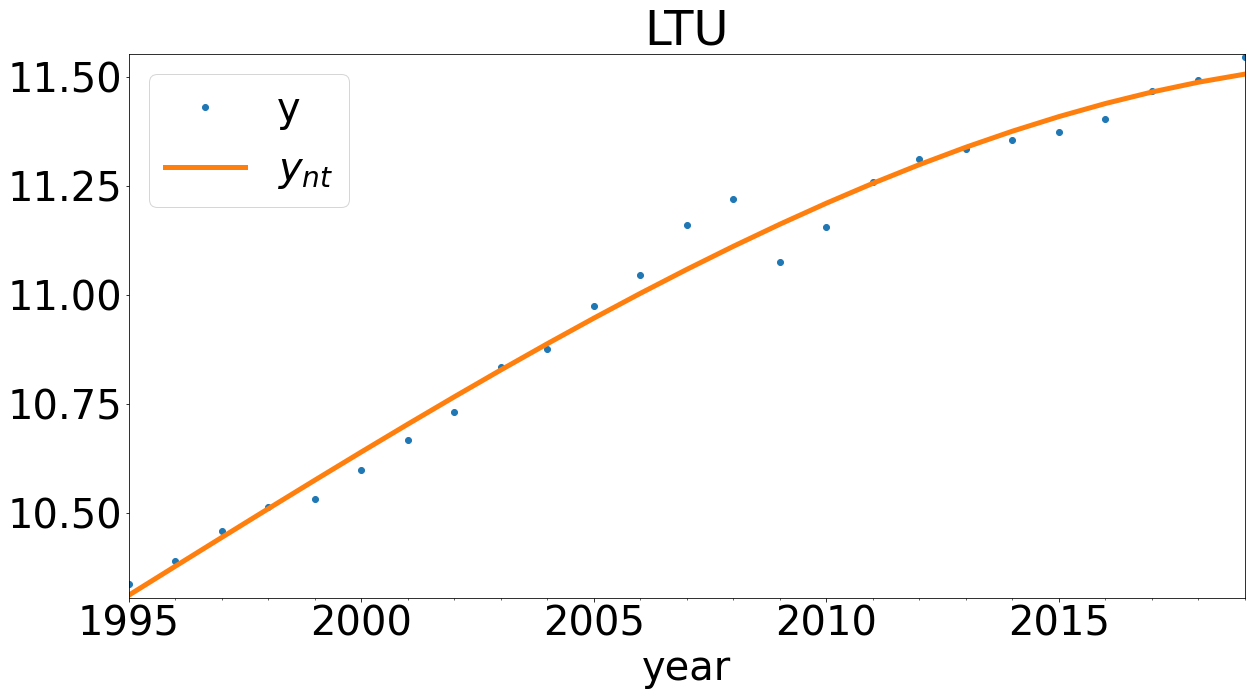

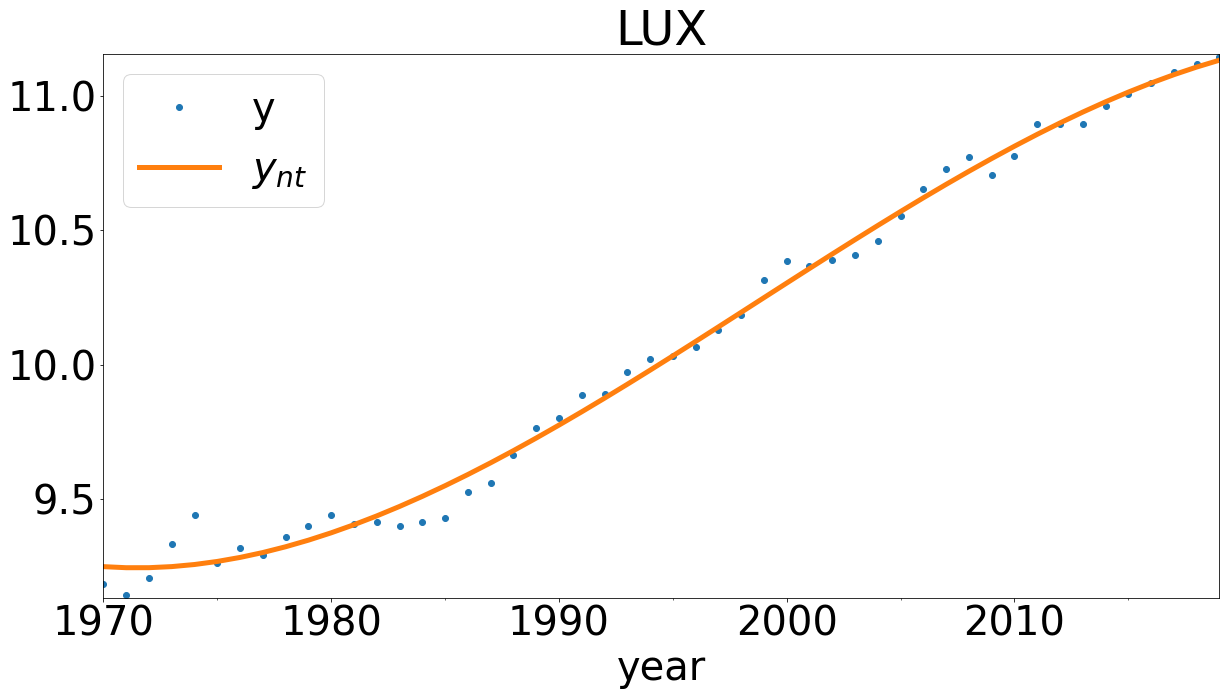

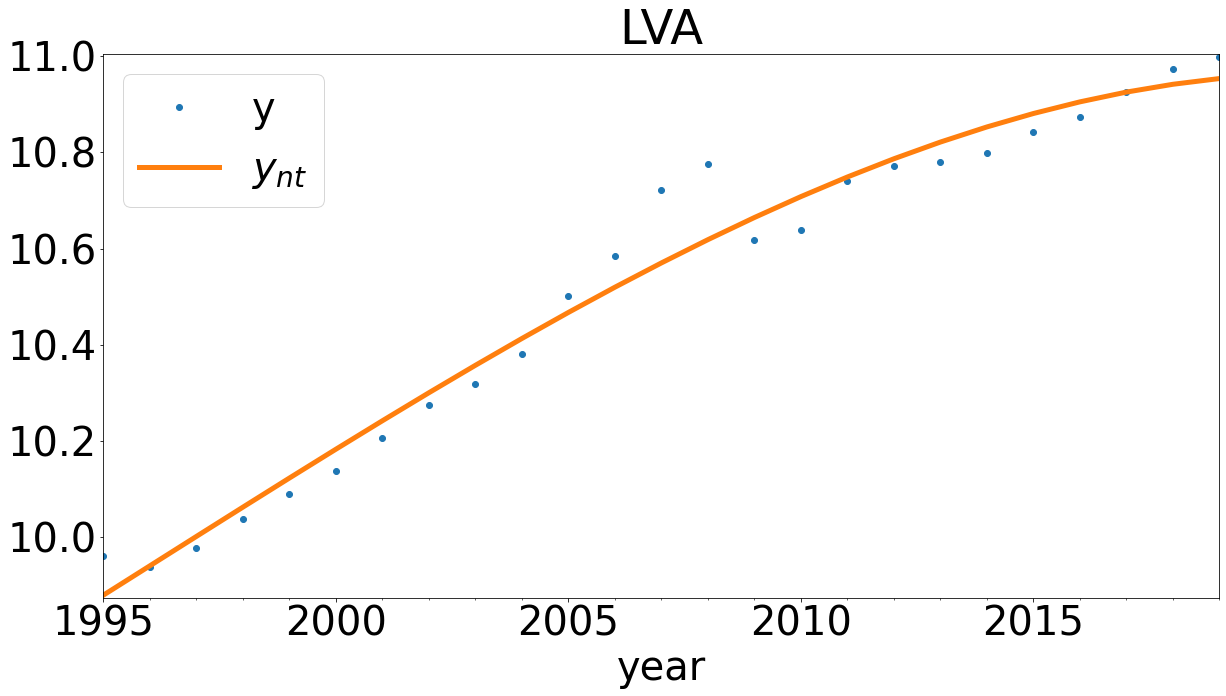

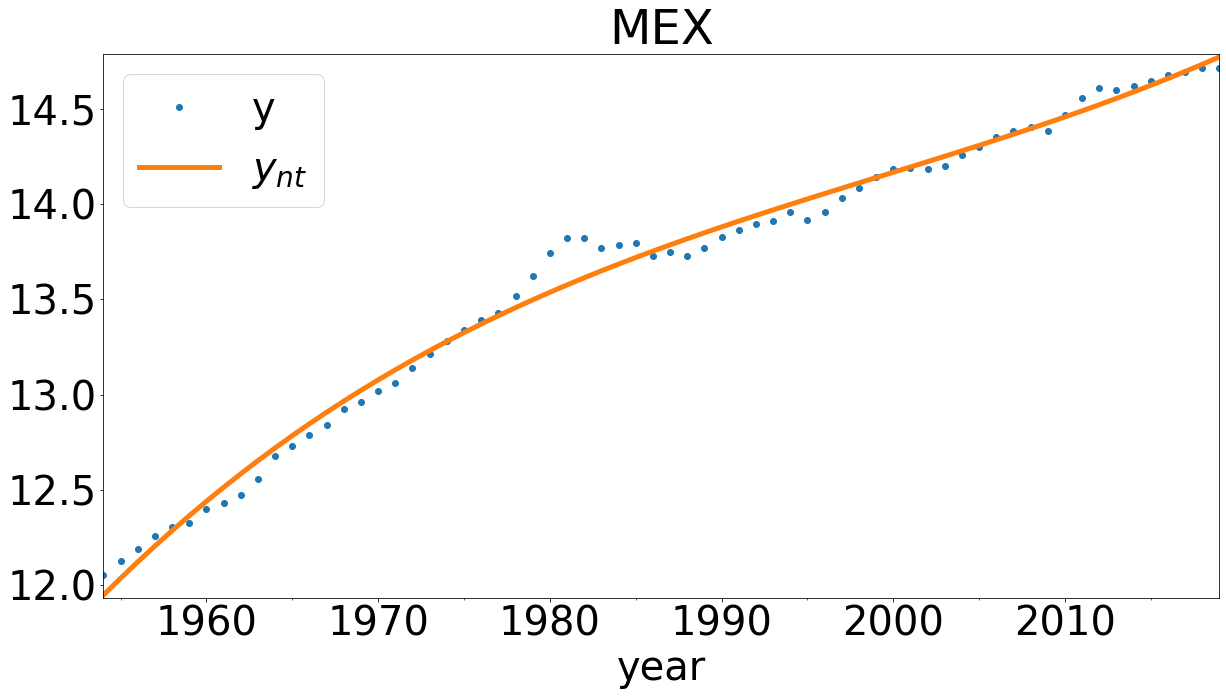

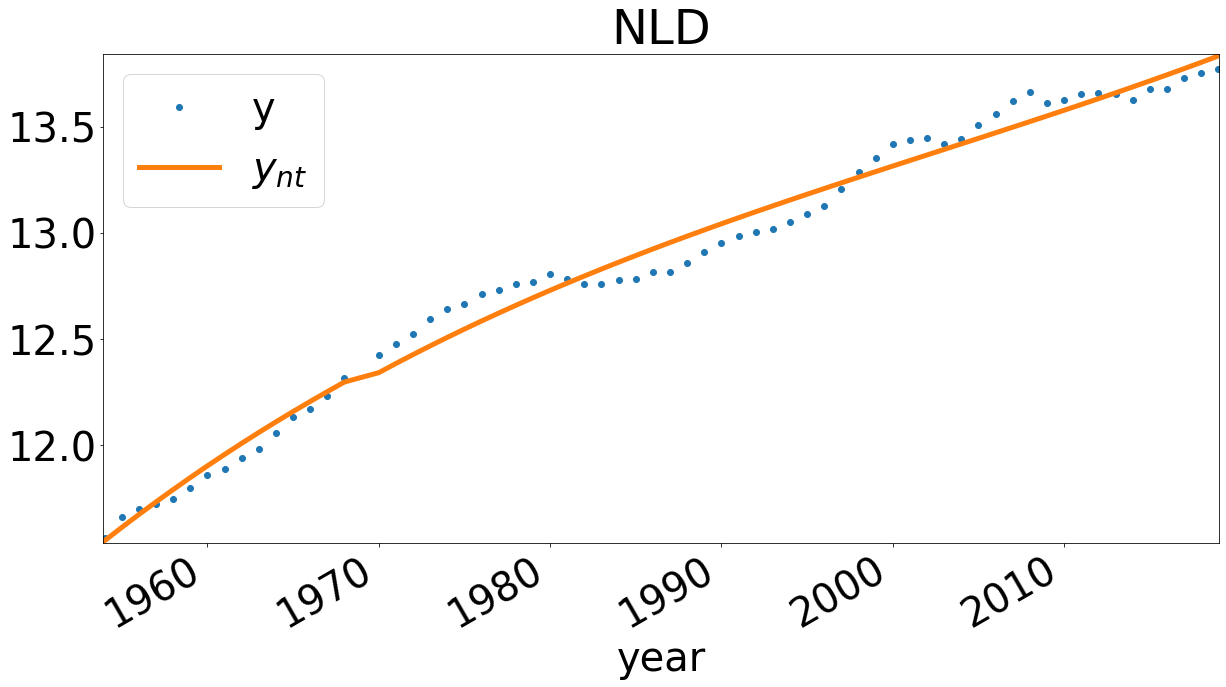

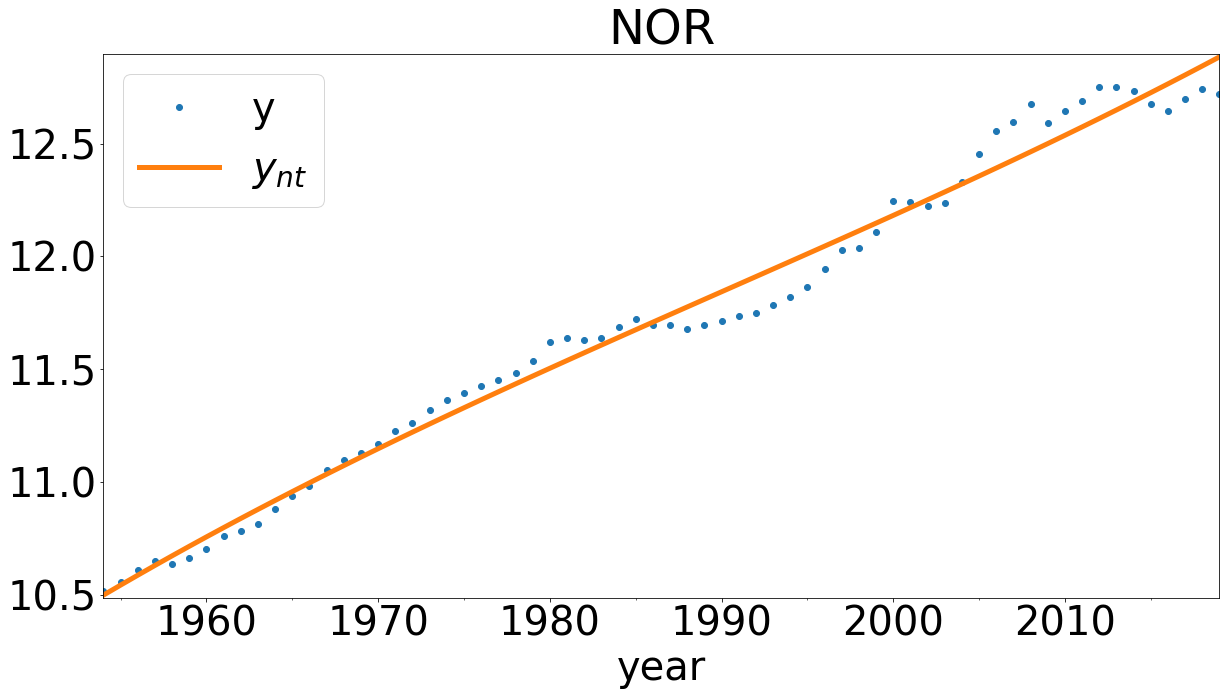

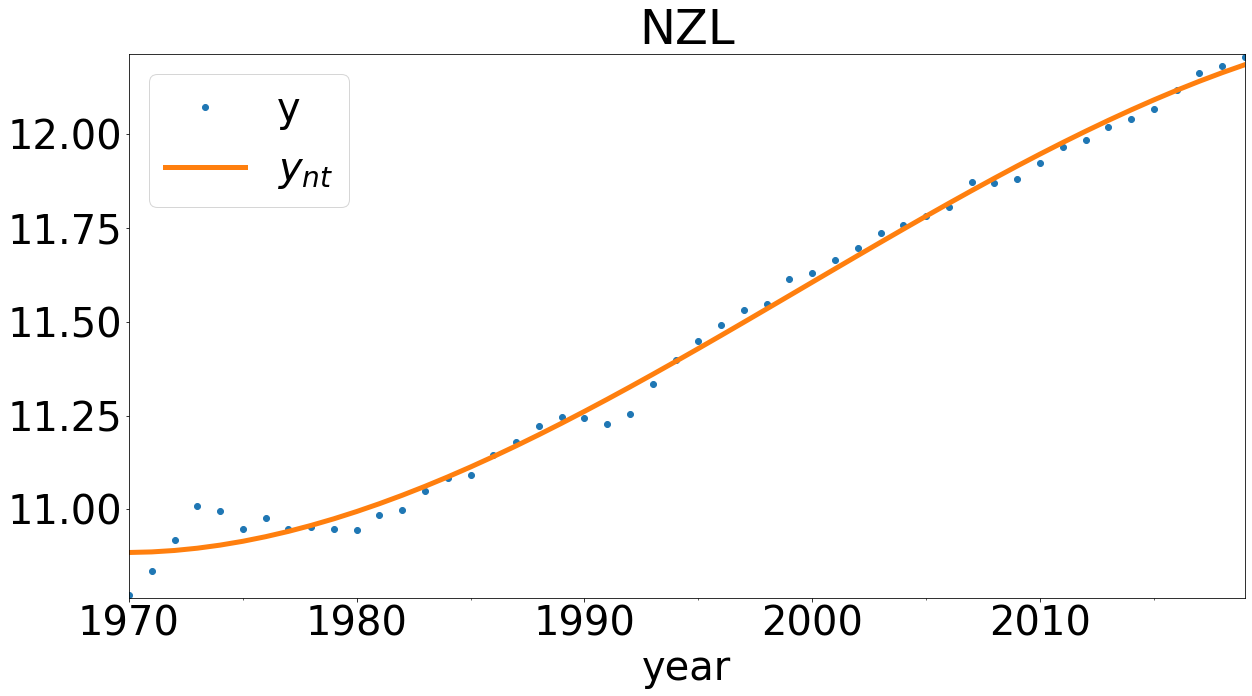

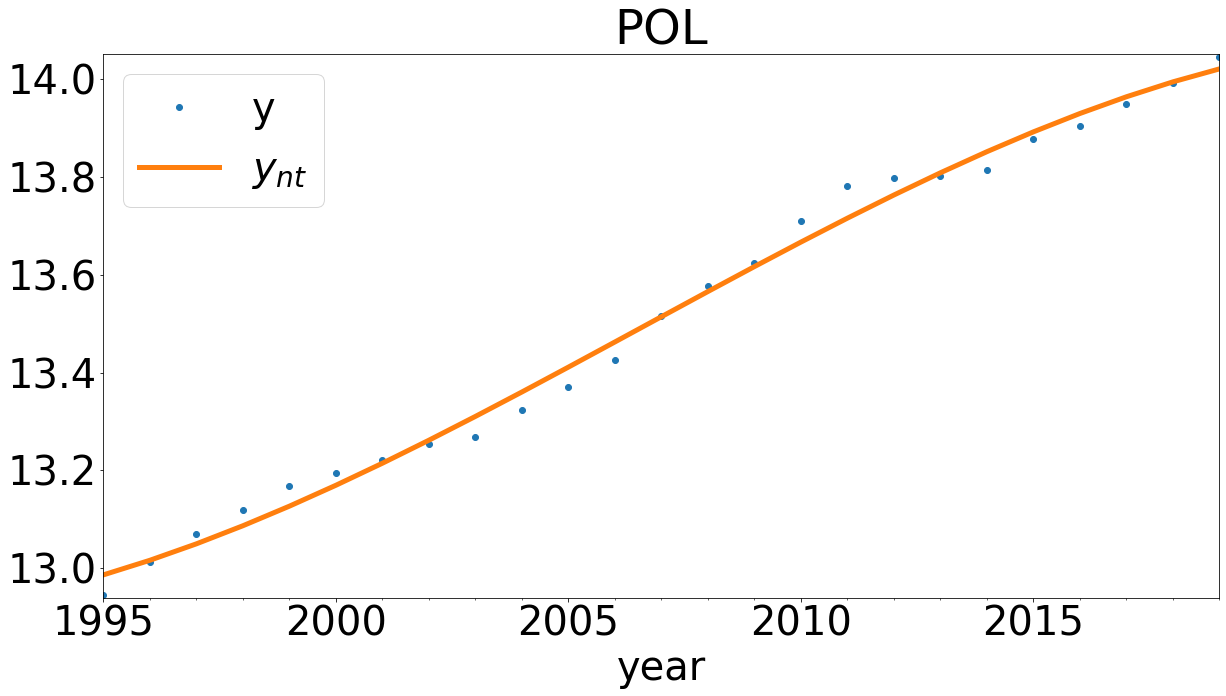

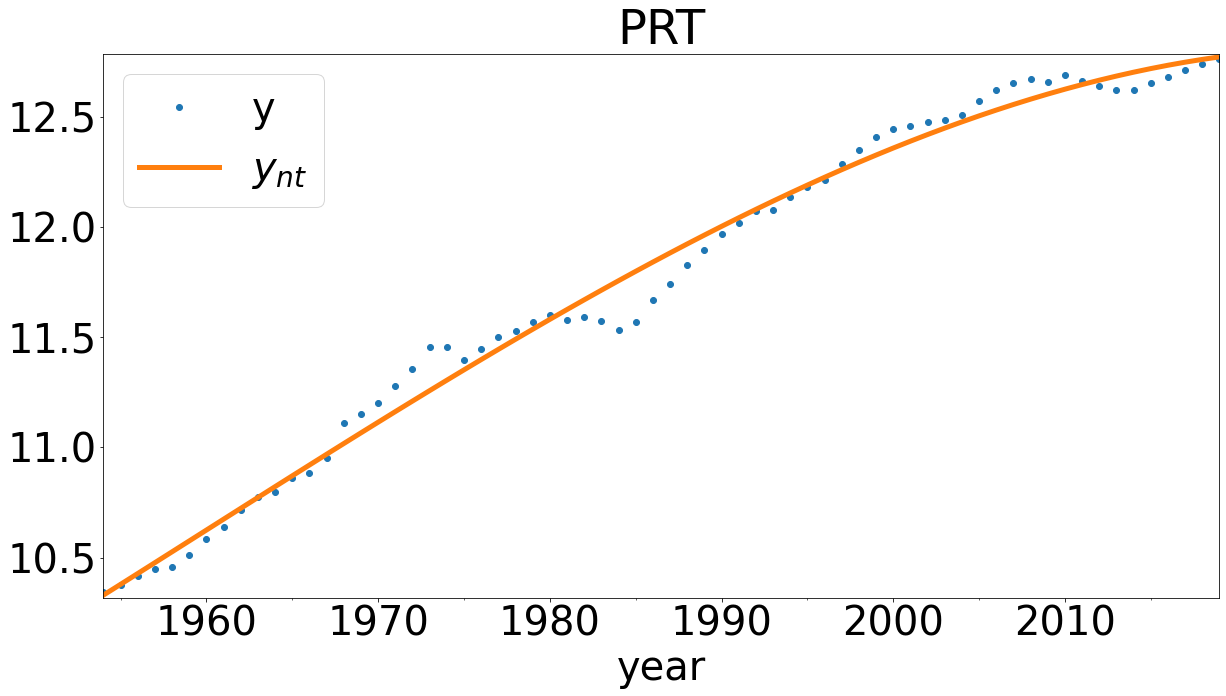

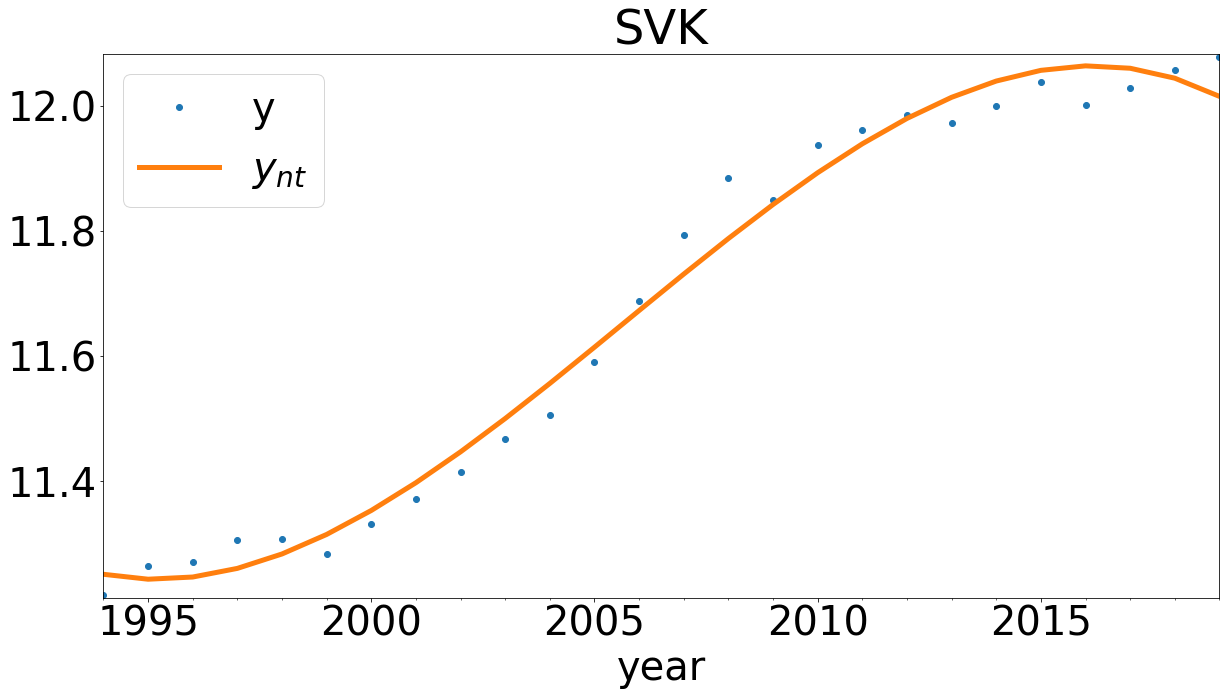

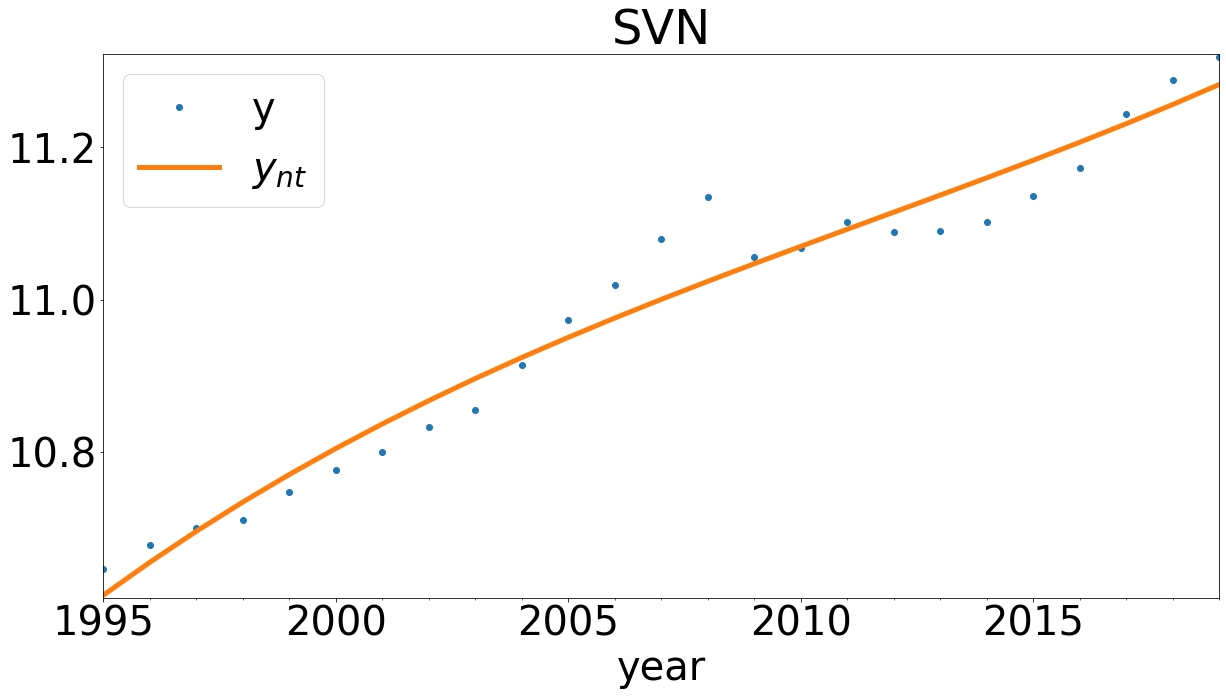

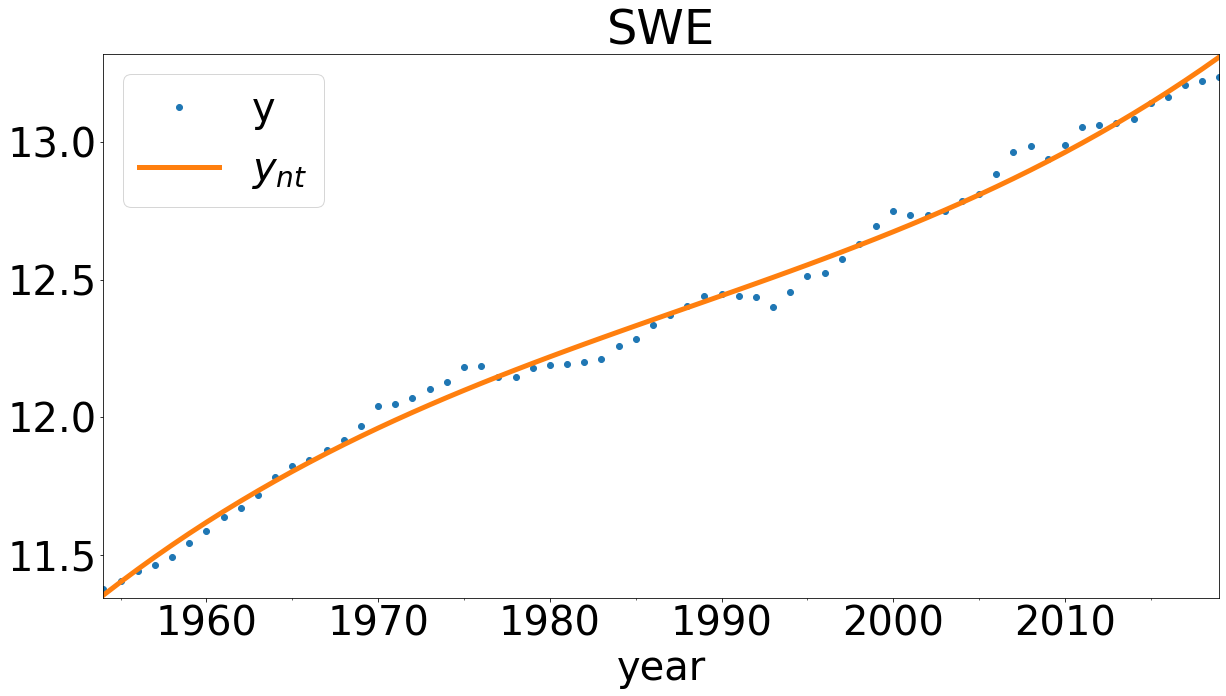

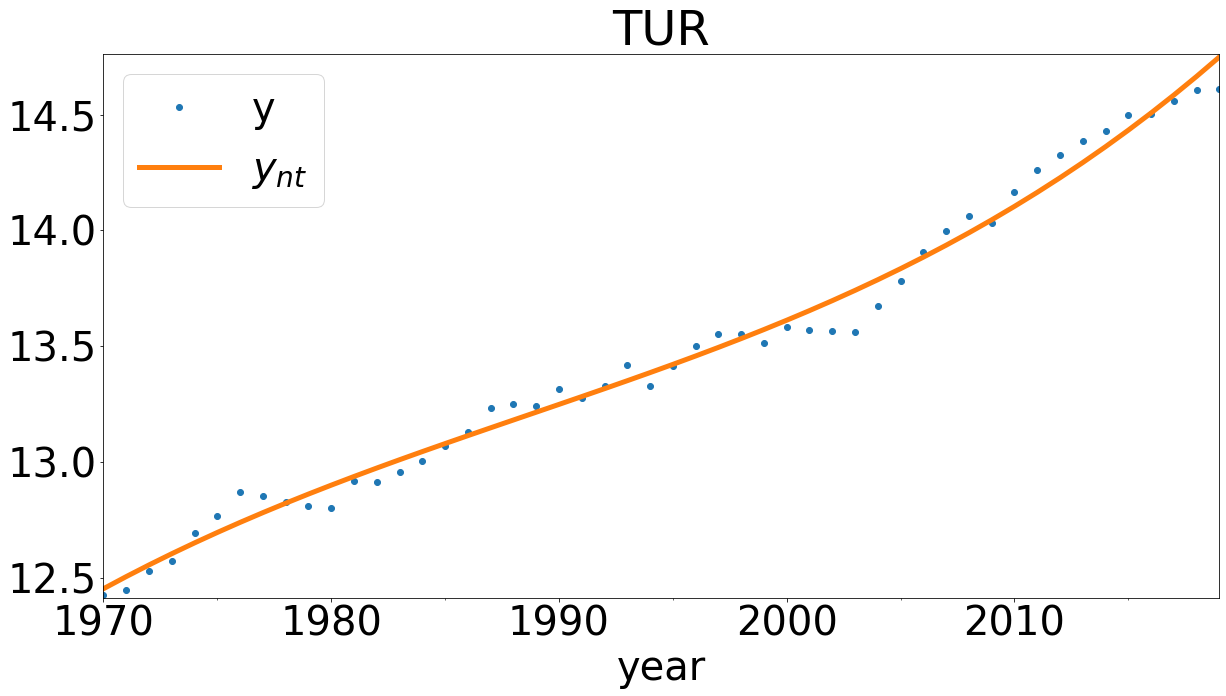

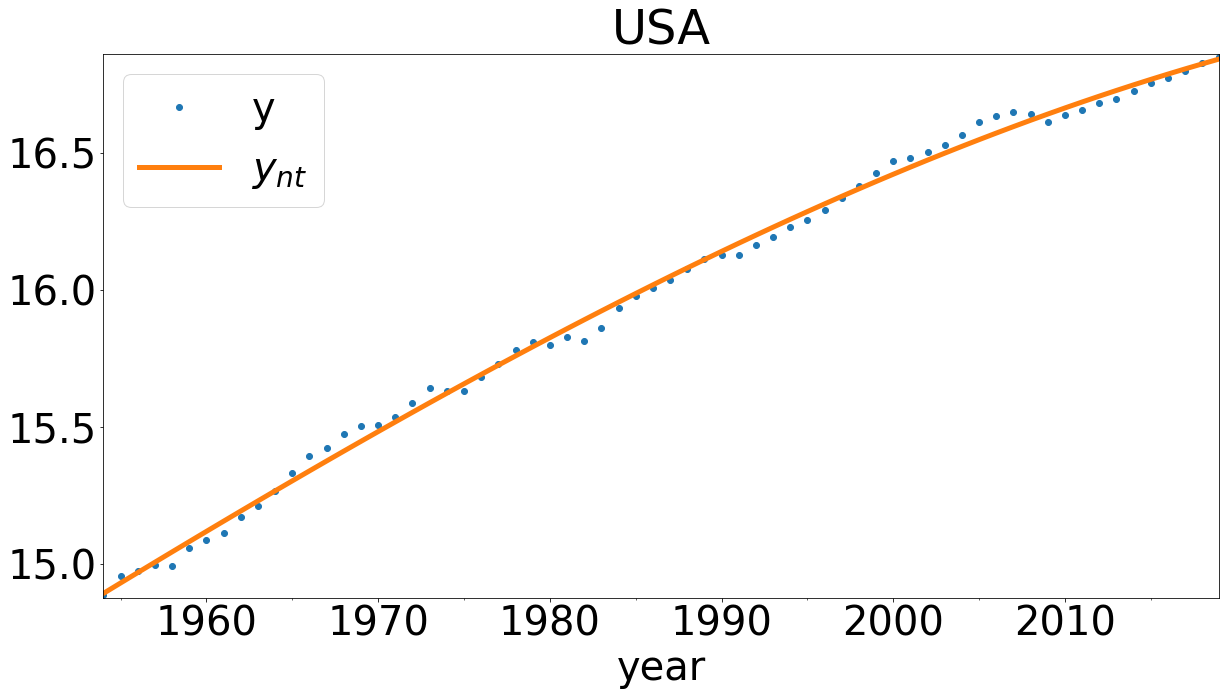

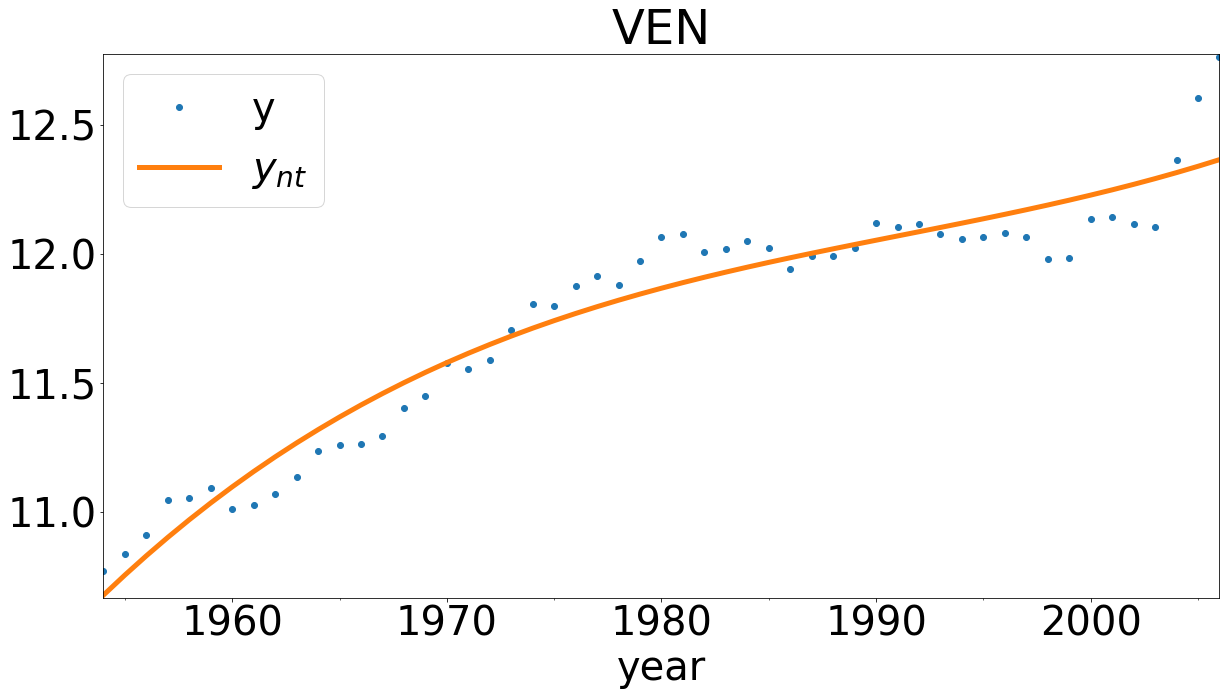

In [19]:
for real_var in ["y"]:#, "U"]:# if we had well formed unemployment variable, we
                                # could use this for loop to also use that variable
    for country in reg_countries:#ccode_dct.keys():
        X_vars = ["constant", "t"]
        reg_data = plot_data.loc[country, [real_var]]
        reg_data["t"] = np.arange(len(reg_data.index))
    # add polynomial terms
        for i in range(2,3 + 1):
            polynomial_time = "$t^" +str(i) + "$"        
            reg_data[polynomial_time] = np.arange(len(reg_data.index)) ** i
            X_vars.append(polynomial_time)

        reg_data["constant"] = 1
        reg_data.dropna(inplace=True)
        y = reg_data[real_var]
        X = reg_data[X_vars]
        reg = sm.OLS(y,X)
        results = reg.fit()
        # estimate long-run trend
        reg_data["$" + real_var + "_{nt}$"] = results.predict(reg_data[X_vars])
        # = results.fittedvalues
        fig, ax = plt.subplots(figsize = (20,10))
        reg_data[[real_var]].plot.line(ls = "", marker = "o", linewidth = 5, ax = ax)
        reg_data[["$" + real_var + "_{nt}$"]].plot.line(linewidth = 5, ax = ax)
        ax.set_title(country)
        
        # save long-run trend and cylical components in plot_data
        plot_data.loc[country,"$" + real_var + "_{nt}$"] = reg_data["$" + real_var + "_{nt}$"].values
        plot_data.loc[country,"$" + real_var + "_{ct}$"] = reg_data[real_var].sub(reg_data["$" + real_var + "_{nt}$"]).values


plot_data.dropna()

Now that we have constructed the long-run trend, we can calculate $y_{ct}$. We will need to collect other values used by Lucas. Recall the equations:

$$y_{ct} = -\pi \delta + \pi\Delta x_t + \lambda y_{c,t-1}$$
$$\Delta P_t = -\beta + (1 - \pi)\Delta x_t + \pi \Delta x_{t-1} - \lambda \Delta y_{c, t-1}$$

Note that we will use $\Delta AD_t$ to refer to $x_t$. This will make reading the results of our regressions more intuitive. In all we need to calculate:

$y_{c,t-1}, \Delta y_{c,t-1}, \Delta AD_t, \Delta AD_{t-1}, \Delta P_t$

Further, since Lucas calculates average growth rates for y, we will also calculate $\Delta y_t$

In [20]:
reg_data = plot_data.loc[reg_countries]
diff_length = 1

# select subset of years
reg_data = reg_data[reg_data.index.get_level_values("year") > "1985"]
reg_data["$y_{c,t-1}$"] = reg_data["$y_{ct}$"].groupby("countrycode").shift()
reg_data["$\Delta y_{c,t-1}$"] = reg_data["$y_{ct}$"].groupby("countrycode").diff(diff_length)
reg_data["$\Delta AD_t$"] = reg_data["$AD_t$"].groupby("countrycode").diff(diff_length)
reg_data["$\Delta AD_{t-1}$"] = reg_data["$\Delta AD_t$"].groupby("countrycode").diff(diff_length)

reg_data["$\Delta y_t$"]= reg_data["y"].groupby("countrycode").diff(diff_length)
reg_data["$\Delta P_t$"]= reg_data["P"].groupby("countrycode").diff(diff_length)
# reg_data["$\Delta P_{t-1}$"]= reg_data["$\Delta P_t$"].shift()

reg_data.dropna(inplace = True)
# plot_data[plot_data.index.get_level_values("year") < "1976"].groupby("countrycode").mean()

In [21]:
table1 = {"$\overline{\Delta y_t}$" : reg_data["$\Delta y_t$"].groupby("countrycode").mean(),
         "$\overline{\Delta P_t}$" : reg_data["$\Delta P_t$"].groupby("countrycode").mean(),
         "$\sigma_{y_{ct}}^2$":reg_data["$y_{ct}$"].groupby("countrycode").var(),
         "$\sigma_{\Delta P_t}^2$" : reg_data["$\Delta P_t$"].groupby("countrycode").var(),
         "$\sigma_{AD_t}^2$":reg_data["$\Delta AD_t$"].groupby("countrycode").var()}

pd.DataFrame(table1).corr()

$\overline{\Delta y_t}$  $\overline{\Delta P_t}$  \
$\overline{\Delta y_t}$                 1.000000                 0.171842   
$\overline{\Delta P_t}$                 0.171842                 1.000000   
$\sigma_{y_{ct}}^2$                     0.377901                -0.286849   
$\sigma_{\Delta P_t}^2$                 0.317673                -0.329150   
$\sigma_{AD_t}^2$                       0.399706                -0.192732   

                         $\sigma_{y_{ct}}^2$  $\sigma_{\Delta P_t}^2$  \
$\overline{\Delta y_t}$             0.377901                 0.317673   
$\overline{\Delta P_t}$            -0.286849                -0.329150   
$\sigma_{y_{ct}}^2$                 1.000000                 0.604118   
$\sigma_{\Delta P_t}^2$             0.604118                 1.000000   
$\sigma_{AD_t}^2$                   0.640547                 0.966663   

                         $\sigma_{AD_t}^2$  
$\overline{\Delta y_t}$           0.399706  
$\overline{\Delta P_t}$          -0.192732  
$\sigma_{y_{ct}}^2$               0.640547  
$\sigma_{\Delta P_t}^2$           0.966663  
$\sigma_{AD_t}^2$                 1.000000

In [22]:
pd.DataFrame(table1)

$\overline{\Delta y_t}$  $\overline{\Delta P_t}$  \
countrycode                                                     
ARG                         0.055082                -0.012551   
AUS                         0.032276                 0.022971   
AUT                         0.032042                 0.007677   
BEL                         0.028562                 0.012831   
CAN                         0.024324                 0.018552   
CHE                         0.025873                 0.013057   
CHL                         0.049911                 0.026943   
COL                         0.034491                 0.022572   
CRI                         0.046523                 0.030758   
CZE                         0.029228                 0.033824   
DEU                         0.026023                 0.007598   
DNK                         0.025888                 0.010576   
ESP                         0.035674                 0.010621   
EST                         0.052067                 0.034216   
FIN                         0.024051                 0.010531   
FRA                         0.024218                 0.009446   
GBR                         0.026623                 0.016027   
GRC                         0.020690                 0.016835   
HUN                         0.028426                 0.028903   
IRL                         0.067222                 0.008547   
ISL                         0.025921                 0.023003   
ISR                         0.043496                 0.030391   
ITA                         0.018341                 0.010398   
JPN                         0.017926                 0.004329   
LTU                         0.050258                 0.037993   
LUX                         0.049648                 0.014748   
LVA                         0.046132                 0.034938   
MEX                         0.030140                 0.032326   
NLD                         0.029798                 0.011093   
NOR                         0.032091                 0.010469   
NZL                         0.032089                 0.020975   
POL                         0.044868                 0.014829   
PRT                         0.031919                 0.020550   
SVK                         0.033965                 0.041067   
SVN                         0.027875                 0.017250   
SWE                         0.027040                 0.007318   
TUR                         0.043099                 0.014907   
USA                         0.025430                 0.021290   
VEN                         0.040636                 0.028628   

             $\sigma_{y_{ct}}^2$  $\sigma_{\Delta P_t}^2$  $\sigma_{AD_t}^2$  
countrycode                                                                   
ARG                     0.025827                 0.045692           0.063150  
AUS                     0.001310                 0.008429           0.010576  
AUT                     0.001230                 0.007849           0.008385  
BEL                     0.001415                 0.008848           0.008156  
CAN                     0.001406                 0.003563           0.005408  
CHE                     0.002253                 0.006708           0.006762  
CHL                     0.011129                 0.003838           0.010774  
COL                     0.007841                 0.008671           0.013430  
CRI                     0.000552                 0.002733           0.003156  
CZE                     0.001666                 0.009771           0.012297  
DEU                     0.001078                 0.007050           0.008136  
DNK                     0.003764                 0.007687           0.007351  
ESP                     0.009276                 0.010060           0.011962  
EST                     0.003774                 0.008963           0.015680  
FIN                     0.007443                 0.010144           0.013309  
FRA 

In [23]:
# # Since \Delta P and Y_ct are simultaneously formed, it makes sense to use SUR
# # I have not broken down these estimates, but they seem similar to separate OLS
# # Also can add constraint for \pi and 1 - \pi
# # one could potentially estimate all countries simultanously...
# from linearmodels.system import SUR
# formulas = {"yct":"yct ~ yct1 + DeltaADt + 1",
#             "DeltaPt":"DeltaPt ~ DeltaADt + DeltaADt1 + Deltayct1 + 1"}
# sur_results = {}
# chars = ["$","\\"," ", "{", "}", "_", ",", "-"]
# for country in reg_countries:
#     sur_results[country] = {}
#     country_data = reg_data.loc[country].dropna()
#     for char in chars:
#         country_data.rename(columns = {key:key.replace(char,"") for key in country_data.keys()}, inplace = True)
# #     country_data["constant"] = 1
#     model = SUR.from_formula(formulas, country_data)
#     results = model.fit()#cov_type='HAC', cov_kwds={'maxlags':1})
#     #save regression results
#     SUR_results = pd.DataFrame([results.params, results.pvalues]).T
#     print(country)
#     print(SUR_results)
# #     sur_results[country]["$\pi_{y_{ct}}$"] = results.params.loc["$\Delta AD_t$"]
# #     sur_results[country]["$$\pi_{\Delta P}$$"] = results.params.loc["$\Delta AD_{t-1}$"]
# #     sur_results[country]["$$1-\pi_{\Delta P}$$"] = results.params.loc["$\Delta AD_t$"]

# #     sur_results[country]["$\lambda_{y_{ct}}$"] = results.params.loc["$y_{c,t-1}$"]
# #     # lambda is subtracted in estimate of \delta P
# #     sur_results[country]["$\lambda_{\Delta P}$"] = results.params.loc["$\Delta y_{c,t-1}$"] * (-1)
# #     sur_results[country]["$r_{y_{ct}}^2$"] = results.rsquared
# #     sur_results[country]["$r_{\Delta P_{t}}^2$"] = results.rsquared

In [24]:
reg_results = {}
for country in reg_countries:
    reg_results[country] = {}
    country_data = reg_data.loc[country].dropna()
    y_var = ["$y_{ct}$"]
    x_vars = ["$y_{c,t-1}$","$\Delta AD_t$"]
    y = country_data[y_var]
    X = country_data[x_vars]
    X["constant"] = 1
    yreg = sm.OLS(y,X)
    yresults = yreg.fit()

    
    y_var = ["$\Delta P_t$"]
    x_vars = ["$\Delta AD_t$", "$\Delta AD_{t-1}$", "$\Delta y_{c,t-1}$"]
    y = country_data[y_var]
    X = country_data[x_vars]
    X["constant"] = 1
    preg = sm.OLS(y,X)
    presults = preg.fit()
    reg_results[country]["$\pi_{y_{ct}}$"] = yresults.params.loc["$\Delta AD_t$"]
    reg_results[country]["$$\pi_{\Delta P}$$"] = presults.params.loc["$\Delta AD_{t-1}$"]
    reg_results[country]["$$1-\pi_{\Delta P}$$"] = presults.params.loc["$\Delta AD_t$"]

    reg_results[country]["$\lambda_{y_{ct}}$"] = yresults.params.loc["$y_{c,t-1}$"]
    # lambda is subtracted in estimate of \delta P
    reg_results[country]["$\lambda_{\Delta P}$"] = presults.params.loc["$\Delta y_{c,t-1}$"] * (-1)
    reg_results[country]["$r_{y_{ct}}^2$"] = yresults.rsquared
    reg_results[country]["$r_{\Delta P_{t}}^2$"] = presults.rsquared
    
    constrained_params = presults.params.copy()
    constrained_params.loc["$\Delta AD_{t-1}$"] = yresults.params.loc["$\Delta AD_t$"]
    constrained_params.loc["$\Delta AD_t$"] = 1 - yresults.params.loc["$\Delta AD_t$"]
#     constrained_params.loc["$\Delta y_{c,t-1}$"] = yresults.params.loc["$y_{c,t-1}$"]
    constrained_prediction = X.mul(constrained_params).sum(axis = 1)

    SSE = ((constrained_prediction.sub(y[y_var[0]])).pow(2)).sum()
    SST = (y[y_var[0]].sub(y[y_var[0]].mean()).pow(2)).sum()
    reg_results[country]["$r_R^2$"] = 1 - SSE / SST
#     reg_results[country]["$r_{\hat{\pi}}^2$"] = 
    
reg_results = pd.DataFrame(reg_results).T
reg_results

$\pi_{y_{ct}}$  $$\pi_{\Delta P}$$  $$1-\pi_{\Delta P}$$  \
ARG        0.175127            0.002095              0.995749   
AUS        0.132713           -0.000311              1.000330   
AUT        0.043673            0.000515              1.000178   
BEL       -0.000045           -0.005120              1.010390   
CAN        0.261839            0.004903              0.985156   
CHE        0.070231           -0.015593              1.019918   
CHL        0.468492           -0.006349              0.949103   
COL        0.224135           -0.003330              1.013182   
CRI        0.126178           -0.010885              1.019872   
CZE        0.123147           -0.001079              0.981374   
DEU        0.073869            0.002496              0.997863   
DNK        0.038715           -0.017150              1.026941   
ESP        0.125792           -0.001527              1.002130   
EST        0.246857            0.013626              0.897925   
FIN        0.206603            0.000263              0.999519   
FRA       -0.006436           -0.006463              1.013503   
GBR        0.120962            0.000170              0.999686   
GRC        0.164105            0.028947              0.944938   
HUN        0.122984            0.004977              0.990371   
IRL        0.316010           -0.006704              1.012526   
ISL        0.118289            0.005731              0.994780   
ISR        0.094304            0.033485              0.941043   
ITA        0.049483            0.021142              0.962460   
JPN       -0.011590            0.019284              0.957122   
LTU        0.244534            0.003262              0.922274   
LUX        0.034607            0.011227              0.973507   
LVA        0.250791           -0.000236              0.914905   
MEX        0.131848           -0.004547              1.002645   
NLD        0.003860            0.000848              0.999847   
NOR        0.300163           -0.002772              1.004977   
NZL        0.088801           -0.003130              0.992970   
POL        0.011380            0.016513              0.962209   
PRT        0.057774            0.024894              0.956883   
SVK        0.077366            0.020481              0.881824   
SVN        0.168056           -0.003961              0.999465   
SWE        0.132249           -0.007915              1.008432   
TUR        0.217168           -0.022771              1.047971   
USA        0.667183           -0.009258              0.717068   
VEN        0.323804            0.002170              0.999697   

     $\lambda_{y_{ct}}$  $\lambda_{\Delta P}$  $r_{y_{ct}}^2$  \
ARG            0.927606              1.015093        0.847952   
AUS            0.809178              0.995356        0.779174   
AUT            0.779294              1.002680        0.759322   
BEL            0.777640              0.943006        0.719734   
CAN            0.646553              0.979325        0.769887   
CHE            0.882177              0.883112        0.680980   
CHL            0.989838              0.824393        0.945188   
COL            0.966565              1.018033        0.939845   
CRI            0.623103              0.989706        0.383513   
CZE            0.777202              0.953986        0.713610   
DEU            0.724065              1.009168        0.654474   
DNK            0.913267              0.912586        0.808133   
ESP            0.914851              0.973947        0.913554   
EST            0.697080              0.804597        0.669815   
FIN            0.842339              0.994556        0.821700   
FRA            0.890225              0.948259        0.809763   
GBR            0.898723              1.000643        0.822530   
GRC            0.922167              1.021536        0.928321   
HUN            0.685800              1.018569        0.608970   
IRL            0.835081              1.004026        0.774275   
ISL            0.830101              0.

In [25]:
constrained_prediction
X.mul(constrained_params)
# presults.params

$\Delta AD_t$  $\Delta AD_{t-1}$  $\Delta y_{c,t-1}$  constant
year                                                                      
1988-01-01       0.132070           0.131233            0.016536 -0.018669
1989-01-01      -0.173441          -0.146297           -0.013901 -0.018669
1990-01-01       0.112952           0.137142           -0.080833 -0.018669
1991-01-01       0.037947          -0.035917            0.030350 -0.018669
1992-01-01       0.015469          -0.010764            0.006073 -0.018669
1993-01-01       0.020202           0.002267            0.056018 -0.018669
1994-01-01       0.010315          -0.004735            0.038912 -0.018669
1995-01-01       0.157410           0.070438            0.008665 -0.018669
1996-01-01      -0.039565          -0.094323            0.000968 -0.018669
1997-01-01       0.127216           0.079864            0.033646 -0.018669
1998-01-01       0.028838          -0.047109            0.108314 -0.018669
1999-01-01       0.026425          -0.001156            0.012029 -0.018669
2000-01-01       0.086681           0.028854           -0.132553 -0.018669
2001-01-01       0.064421          -0.010660            0.012572 -0.018669
2002-01-01      -0.190648          -0.122142            0.048688 -0.018669
2003-01-01      -0.061572           0.061809            0.033995 -0.018669
2004-01-01       0.202177           0.126299           -0.239954 -0.018669
2005-01-01       0.174433          -0.013285           -0.219214 -0.018669
2006-01-01       0.158553          -0.007604           -0.138248 -0.018669

The estimates of $\pi$ in the second regression, estimating $\Delta P$, follow the asserted relationship defined by $\pi + \pi - 1 = 1$ rhw closer is $\pi$ to 0. Larger values of $\pi$ seem to be associated with persistence that is not absorved into the price level within a single period. On average, these terms sum to $0.97$, which is quite close to 1.  If we subtract from the stimate of $pi_{y_{ct}}$ the value $\pi_{\Delta P}$, we see that $y_{ct}$ appears to be more responsive to shifts in $AD_t$ than is $\Delta P$ with regard to shifts in $AD_{t-1}$. It appears that, on average, changes in aggregate demand are not fully absorbed by $\Delta_P$ even a full year after an initial aggregate demand shock. These results are likely due to relative stability in monetary policy that has persisted for several decades in most countries.

In [26]:
compare_parameter_values = pd.DataFrame(
    [reg_results["$\pi_{y_{ct}}$"].sub(
        reg_results["$$\pi_{\Delta P}$$"]),
     reg_results["$$\pi_{\Delta P}$$"].add(
         reg_results["$$1-\pi_{\Delta P}$$"]),
    reg_results["$\lambda_{y_{ct}}$"].sub(
        reg_results["$\lambda_{\Delta P}$"])]).T.rename(
    columns={0:"$$\pi_{y_{ct}} - \pi_{\Delta P}$$",
             1:"$$\pi_{\Delta P} + (1-\pi_{\Delta P})$$",
             2:"$$\lambda_{y_{ct}} - \lambda_{\Delta P}$$"})
pd.DataFrame(compare_parameter_values.mean())
# compare_parameter_values 

0
$$\pi_{y_{ct}} - \pi_{\Delta P}$$          0.151464
$$\pi_{\Delta P} + (1-\pi_{\Delta P})$$    0.979196
$$\lambda_{y_{ct}} - \lambda_{\Delta P}$$ -0.154137

Text(0, 0.5, '$\\pi_{\\Delta P}$')

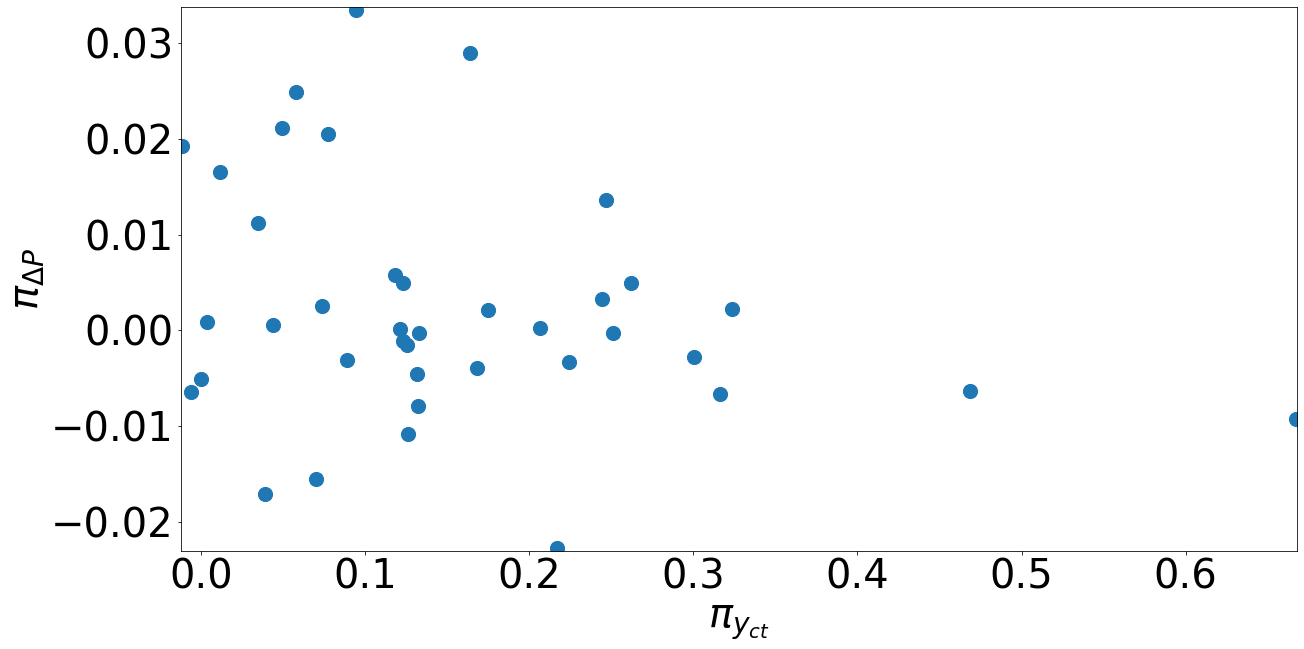

In [27]:
fig, ax = plt.subplots(figsize = (20,10))
x = "$\pi_{y_{ct}}$"
y = "$$\pi_{\Delta P}$$"
ax.scatter(reg_results[x], reg_results[y], s = 200)
ax.set_xlabel(x)
ax.set_ylabel(y.replace("$$", "$"))

Text(0, 0.5, '$\\pi_{\\Delta P} + (1-\\pi_{\\Delta P})$')

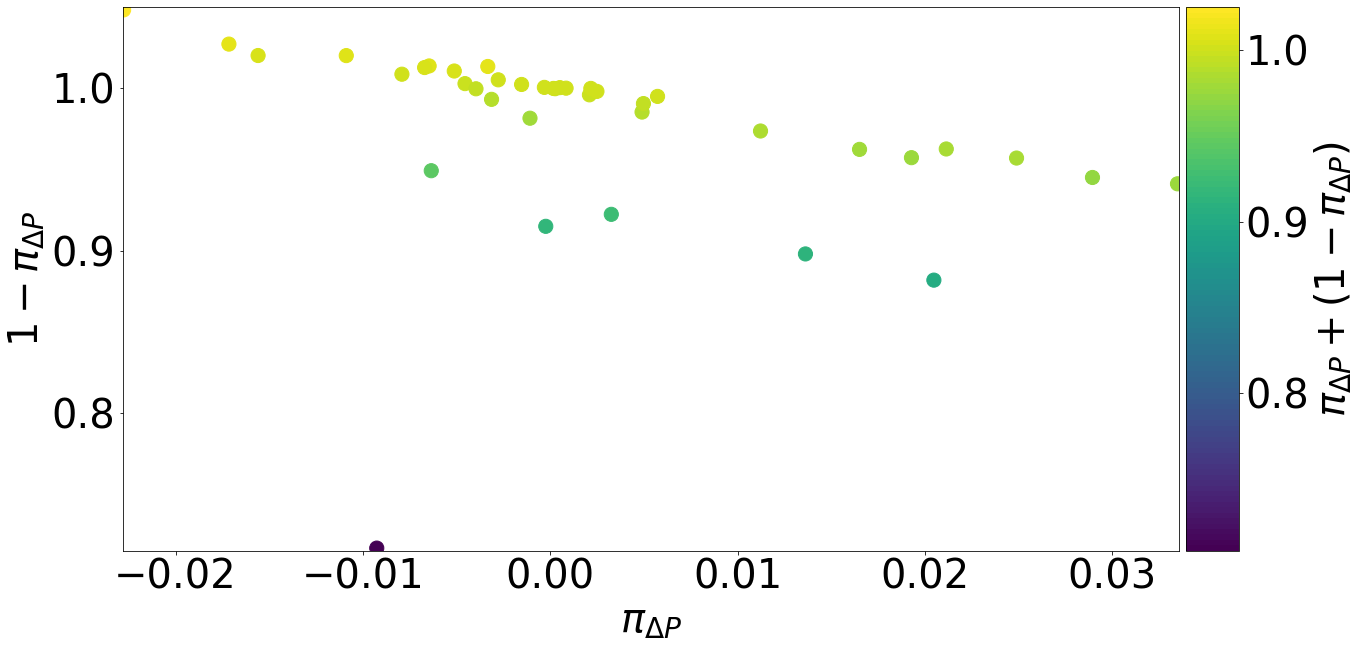

In [28]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize = (20,10))
x = "$$\pi_{\Delta P}$$"
y = "$$1-\pi_{\Delta P}$$"
c = "$$\pi_{\Delta P} + (1-\pi_{\Delta P})$$"
cmap = cm.get_cmap("viridis",100)
ax.scatter(reg_results[x], 
           reg_results[y],
           c = compare_parameter_values[c],
           cmap = cmap, 
           s = 200)
ax.set_xlabel(x.replace("$$", "$"))
ax.set_ylabel(y.replace("$$", "$"))

# vmin = 1
# vmax = df[key].max()
norm = cm.colors.Normalize(vmin = compare_parameter_values[c].min(), vmax= compare_parameter_values[c].max())
mappable = cm.ScalarMappable(cmap = cmap, norm = norm)

# empty array for the data range
# sm._A = []
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", size = size, pad = 0.1)
cbar = fig.colorbar(mappable, cax = cax, cmap = cmap)
cax.set_ylabel(c.replace("$$", "$"))

In [29]:
# import pi paramters results from y_ct equation
for country in reg_countries:
    reg_data.loc[country,"$\pi_{y_{ct}}$"] = reg_results.loc[country, "$\pi_{y_{ct}}$"]
    reg_data.loc[country,"$\pi_{\Delta P}$"] = reg_results.loc[country, "$$\pi_{\Delta P}$$"]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           $\Delta P_t$   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.481
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.116
Time:                        18:29:07   Log-Likelihood:                 1183.6
No. Observations:                1149   AIC:                            -2363.
Df Residuals:                    1147   BIC:                            -2353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$y_{ct}$       0.0583      0.037      1.575      0.116      -0.014       0.131
constant       0.0190      0.003      7.440      0.000       0.014       0.024
==============================================================================
Omnibus:                        8.228   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.199
Skew:                          -0.205   Prob(JB):                       0.0166
Kurtosis:                       3.056   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

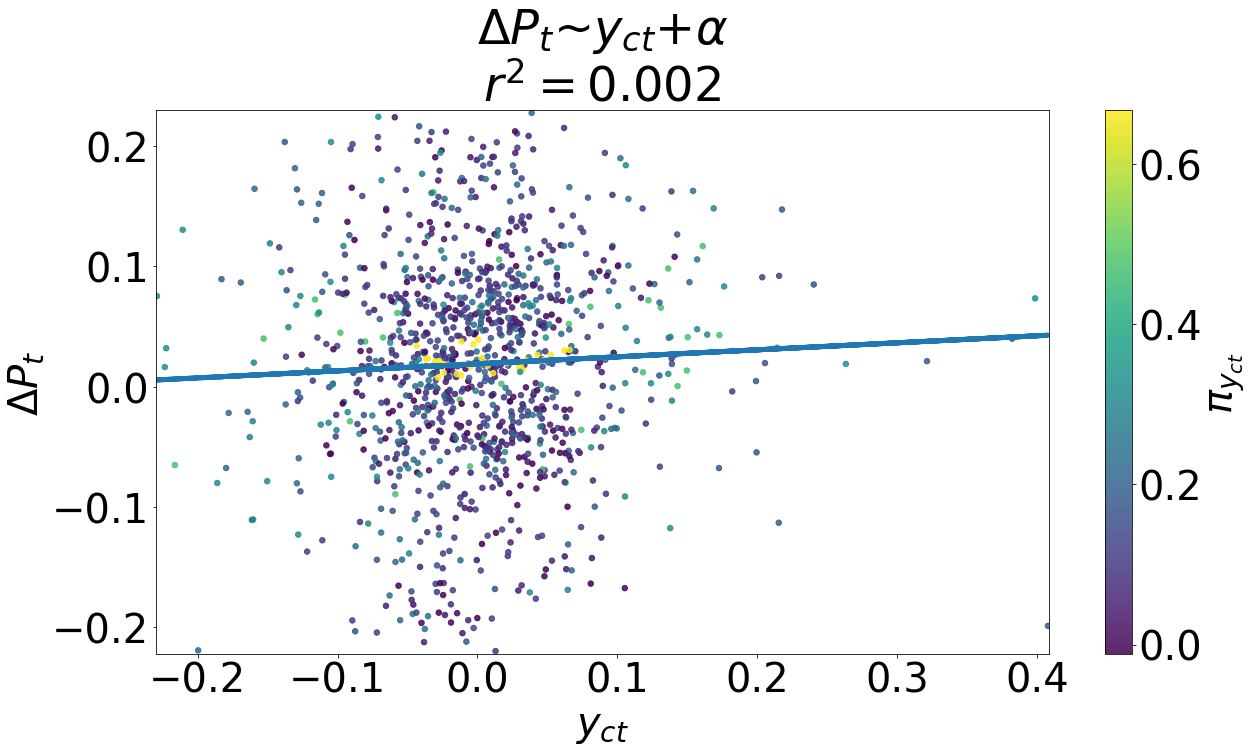

In [30]:
# drop outliers
fig1_data = reg_data[reg_data["$\Delta P_t$"] < reg_data["$\Delta P_t$"].quantile(0.99)]
fig1_data = fig1_data[fig1_data["$\Delta P_t$"] > fig1_data["$\Delta P_t$"].quantile(0.01)]

y_var = "$\Delta P_t$"
x_var = "$y_{ct}$"
y = fig1_data[[y_var]]
X = fig1_data[[x_var]]
X["constant"] = 1

reg = sm.OLS(y,X)
results = reg.fit()
fig1_data["$\hat{\Delta P_t}$"] = results.predict(X)

fig1_data["s$\pi_{y_{ct}}$"] = fig1_data["$\pi_{y_{ct}}$"].mul(500)
fig, ax = plt.subplots(figsize = (20,10))

fig1_data.plot.scatter(x = x_var, y = y_var, s = 30, c ="$\pi_{y_{ct}}$",
                      cmap = "viridis",alpha = .85,  ax = ax)
ax.plot(fig1_data[x_var], fig1_data["$\hat{\Delta P_t}$"], linewidth = 5)
ax.set_title(y_var + "~" + x_var + "$ + \\alpha$\n$r^2=" + str(round(results.rsquared,3)) + "$")
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           $\Delta P_t$   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sun, 29 Jan 2023   Prob (F-statistic):            0.00232
Time:                        18:29:08   Log-Likelihood:                 87.558
No. Observations:                  39   AIC:                            -171.1
Df Residuals:                      37   BIC:                            -167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$y_{ct}$       0.4019      0.123      3.271      0.002       0.153       0.651
constant       0.0703      0.009      8.025      0.000       0.053       0.088
==============================================================================
Omnibus:                        5.803   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.509
Skew:                          -0.140   Prob(JB):                       0.0234
Kurtosis:                       5.131   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

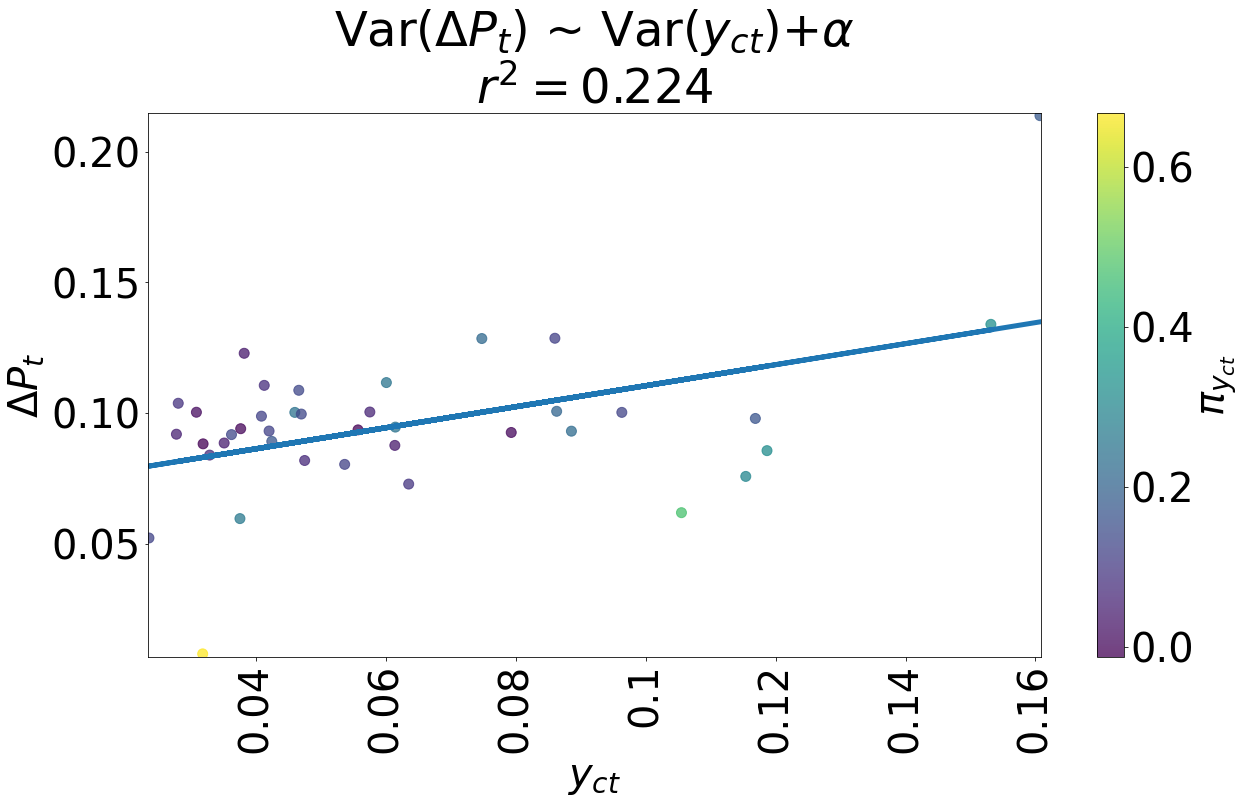

In [31]:
# drop outliers
fig1_data = reg_data.groupby("countrycode").std()#[reg_data["$\Delta P_t$"] < reg_data["$\Delta P_t$"].quantile(0.99)]
# fig1_data = fig1_data[fig1_data["$\Delta P_t$"] > fig1_data["$\Delta P_t$"].quantile(0.01)]

y_var = "$\Delta P_t$"
x_var = "$y_{ct}$"
y = fig1_data[[y_var]]
X = fig1_data[[x_var]]
X["constant"] = 1

reg = sm.OLS(y,X)
results = reg.fit()
fig1_data["$\hat{\Delta P_t}$"] = results.predict(X)

c_var = "$\pi_{y_{ct}}$"
fig1_data[c_var] = reg_results[c_var]



fig1_data["s" + c_var ] = fig1_data[c_var].mul(500)
fig, ax = plt.subplots(figsize = (20,10))

fig1_data.plot.scatter(x = x_var, y = y_var, s = 100, c =c_var,
                      cmap = "viridis",alpha = .75,  ax = ax)
ax.plot(fig1_data[x_var], fig1_data["$\hat{\Delta P_t}$"], linewidth = 5)
ax.set_title("$\sigma_{y_{ct}}$~$\sigma_{\Delta P_t}$")
ax.set_xticklabels([round(x,3) for x in ax.get_xticks()], rotation = 90)
ax.set_title("Var("+ y_var + ") ~ Var(" + x_var + ")$ + \\alpha$\n$r^2=" + str(round(results.rsquared,3)) + "$")

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           $\Delta P_t$   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.481
Date:                Sun, 29 Jan 2023   Prob (F-statistic):              0.116
Time:                        18:29:08   Log-Likelihood:                 1183.6
No. Observations:                1149   AIC:                            -2363.
Df Residuals:                    1147   BIC:                            -2353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$y_{ct}$       0.0583      0.037      1.575      0.116      -0.014       0.131
constant       0.0190      0.003      7.440      0.000       0.014       0.024
==============================================================================
Omnibus:                        8.228   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.199
Skew:                          -0.205   Prob(JB):                       0.0166
Kurtosis:                       3.056   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

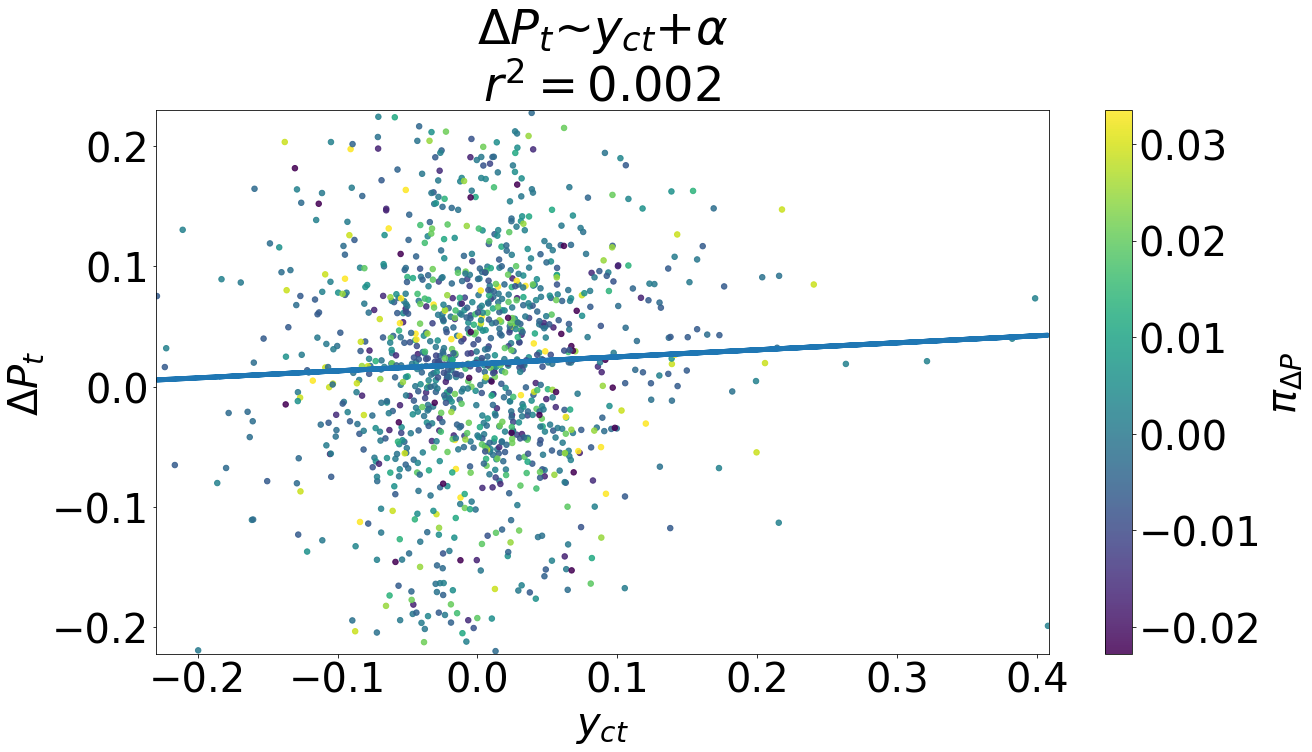

In [32]:
# drop outliers
fig1_data = reg_data[reg_data["$\Delta P_t$"] < reg_data["$\Delta P_t$"].quantile(0.99)]
fig1_data = fig1_data[fig1_data["$\Delta P_t$"] > fig1_data["$\Delta P_t$"].quantile(0.01)]

y_var = "$\Delta P_t$"
x_var = "$y_{ct}$"
y = fig1_data[[y_var]]
X = fig1_data[[x_var]]
X["constant"] = 1

reg = sm.OLS(y,X)
results = reg.fit()
fig1_data["$\hat{\Delta P_t}$"] = results.predict(X)

fig1_data["s$\pi_{y_{ct}}$"] = fig1_data["$\pi_{y_{ct}}$"].mul(500)
fig, ax = plt.subplots(figsize = (20,10))

fig1_data.plot.scatter(x = x_var, y = y_var, s = 30, c ="$\pi_{\Delta P}$",
                      cmap = "viridis",alpha = .85,  ax = ax)
ax.plot(fig1_data[x_var], fig1_data["$\hat{\Delta P_t}$"], linewidth = 5)
ax.set_title(y_var + "~" + x_var + "$ + \\alpha$\n$r^2=" + str(round(results.rsquared,3)) + "$")
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           $\Delta P_t$   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sun, 29 Jan 2023   Prob (F-statistic):            0.00232
Time:                        18:29:09   Log-Likelihood:                 87.558
No. Observations:                  39   AIC:                            -171.1
Df Residuals:                      37   BIC:                            -167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
$y_{ct}$       0.4019      0.123      3.271      0.002       0.153       0.651
constant       0.0703      0.009      8.025      0.000       0.053       0.088
==============================================================================
Omnibus:                        5.803   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.509
Skew:                          -0.140   Prob(JB):                       0.0234
Kurtosis:                       5.131   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

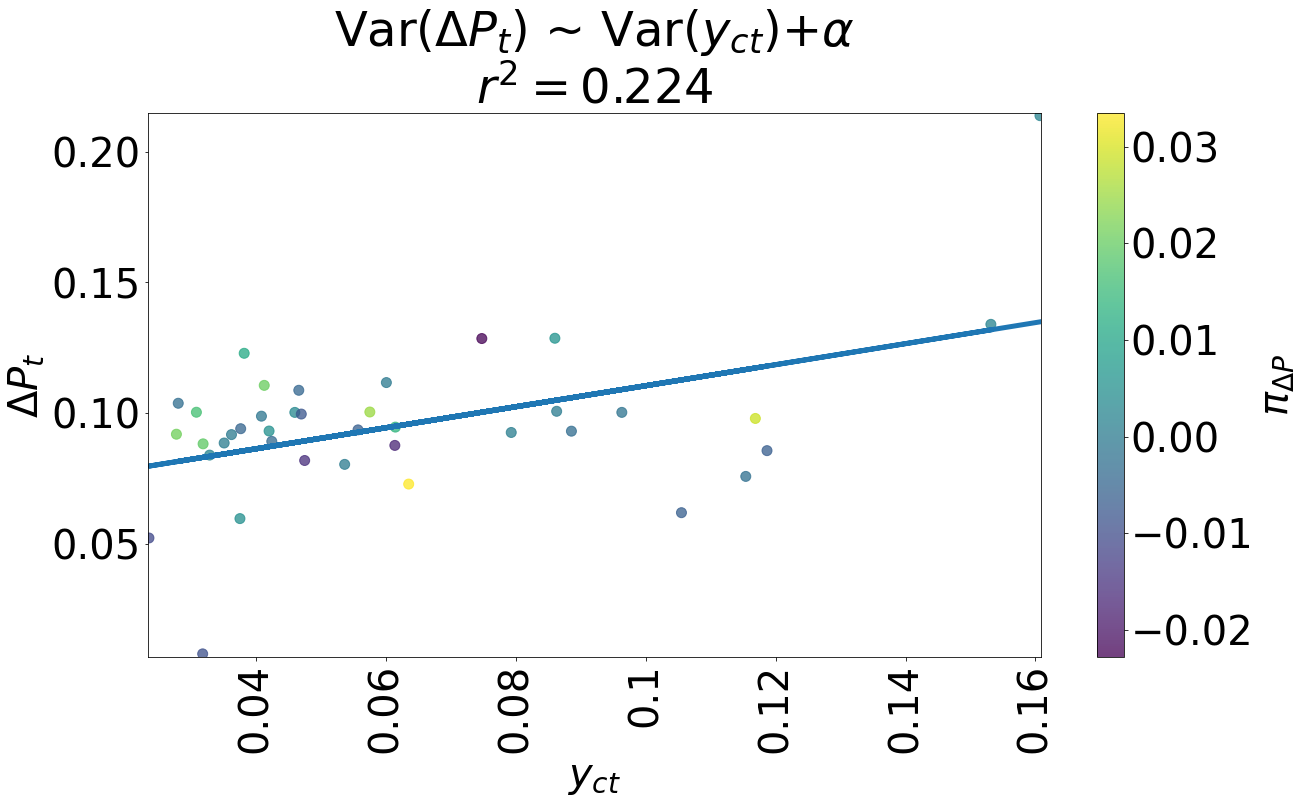

In [33]:
# drop outliers
fig1_data = reg_data.groupby("countrycode").std()#[reg_data["$\Delta P_t$"] < reg_data["$\Delta P_t$"].quantile(0.99)]
# fig1_data = fig1_data[fig1_data["$\Delta P_t$"] > fig1_data["$\Delta P_t$"].quantile(0.01)]

y_var = "$\Delta P_t$"
x_var = "$y_{ct}$"
y = fig1_data[[y_var]]
X = fig1_data[[x_var]]
X["constant"] = 1

reg = sm.OLS(y,X)
results = reg.fit()
fig1_data["$\hat{\Delta P_t}$"] = results.predict(X)

c_var = "$\pi_{\Delta P}$"
fig1_data[c_var] = reg_results["$" + c_var + "$"]



fig1_data["s" + c_var ] = fig1_data[c_var].mul(500)
fig, ax = plt.subplots(figsize = (20,10))

fig1_data.plot.scatter(x = x_var, y = y_var, s = 100, c =c_var,
                      cmap = "viridis",alpha = .75,  ax = ax)
ax.plot(fig1_data[x_var], fig1_data["$\hat{\Delta P_t}$"], linewidth = 5)
ax.set_title("$\sigma_{y_{ct}}$~$\sigma_{\Delta P_t}$")
ax.set_xticklabels([round(x,3) for x in ax.get_xticks()], rotation = 90)
ax.set_title("Var("+ y_var + ") ~ Var(" + x_var + ")$ + \\alpha$\n$r^2=" + str(round(results.rsquared,3)) + "$")

results.summary()

In [34]:
fig1_data.describe()

y          k          P        avh          A     $AD_t$  \
count  39.000000  39.000000  39.000000  39.000000  39.000000  39.000000   
mean    0.312122   0.371326   0.235761   0.029661   0.080601   0.507808   
std     0.097942   0.125596   0.075802   0.014238   0.035836   0.141714   
min     0.130340   0.124175   0.105786   0.012881   0.000000   0.174155   
25%     0.250030   0.289274   0.165546   0.018639   0.058179   0.401461   
50%     0.291407   0.359493   0.236188   0.024038   0.079982   0.505432   
75%     0.353929   0.448687   0.295894   0.035906   0.093994   0.640765   
max     0.597318   0.690259   0.433718   0.071625   0.183397   0.749072   

        $y_{nt}$   $y_{ct}$  $y_{c,t-1}$  $\Delta y_{c,t-1}$  $\Delta AD_t$  \
count  39.000000  39.000000    39.000000           39.000000      39.000000   
mean    0.295439   0.062537     0.062051            0.036549       0.107431   
std     0.102342   0.034743     0.032578            0.017100       0.035460   
min     0.106095   0.023486     0.022478            0.015495       0.018785   
25%     0.235193   0.037558     0.040001            0.024293       0.088235   
50%     0.279549   0.047468     0.046067            0.031304       0.103782   
75%     0.335832   0.082642     0.083781            0.047554       0.119542   
max     0.569103   0.160707     0.163445            0.092986       0.251297   

       $\Delta AD_{t-1}$  $\Delta y_t$  $\Delta P_t$  $\pi_{y_{ct}}$  \
count          39.000000     39.000000     39.000000            39.0   
mean            0.137245      0.037110      0.095453             0.0   
std             0.052302      0.017251      0.029480             0.0   
min             0.018612      0.016049      0.007976             0.0   
25%             0.116720      0.024889      0.086675             0.0   
50%             0.125250      0.031158      0.093616             0.0   
75%             0.144431      0.047807      0.100584             0.0   
max             0.365522      0.094910      0.213757             0.0   

       $\pi_{\Delta P}$  $\hat{\Delta P_t}$  s$\pi_{\Delta P}$  
count         39.000000           39.000000          39.000000  
mean           0.002255            0.095453           1.127290  
std            0.012414            0.013962           6.207196  
min           -0.022771            0.079760         -11.385525  
25%           -0.004834            0.085415          -2.416880  
50%            0.000170            0.089397           0.085193  
75%            0.005354            0.103532           2.677110  
max            0.033485            0.134903          16.742531

#### A correlation plot (with partial correlation values indicated) suggests that the relationships identified by Lucas tended to break down as monetary policy became more responsible. Notice, though, the relative stability of policy implimented by the Federal Reserve, indicated in the yellow. Shifts in aggregate demand are of a narrower range for, which seems to support the relatively higher value of $\pi$.

Text(0.5, 0.915, 'Correlation')

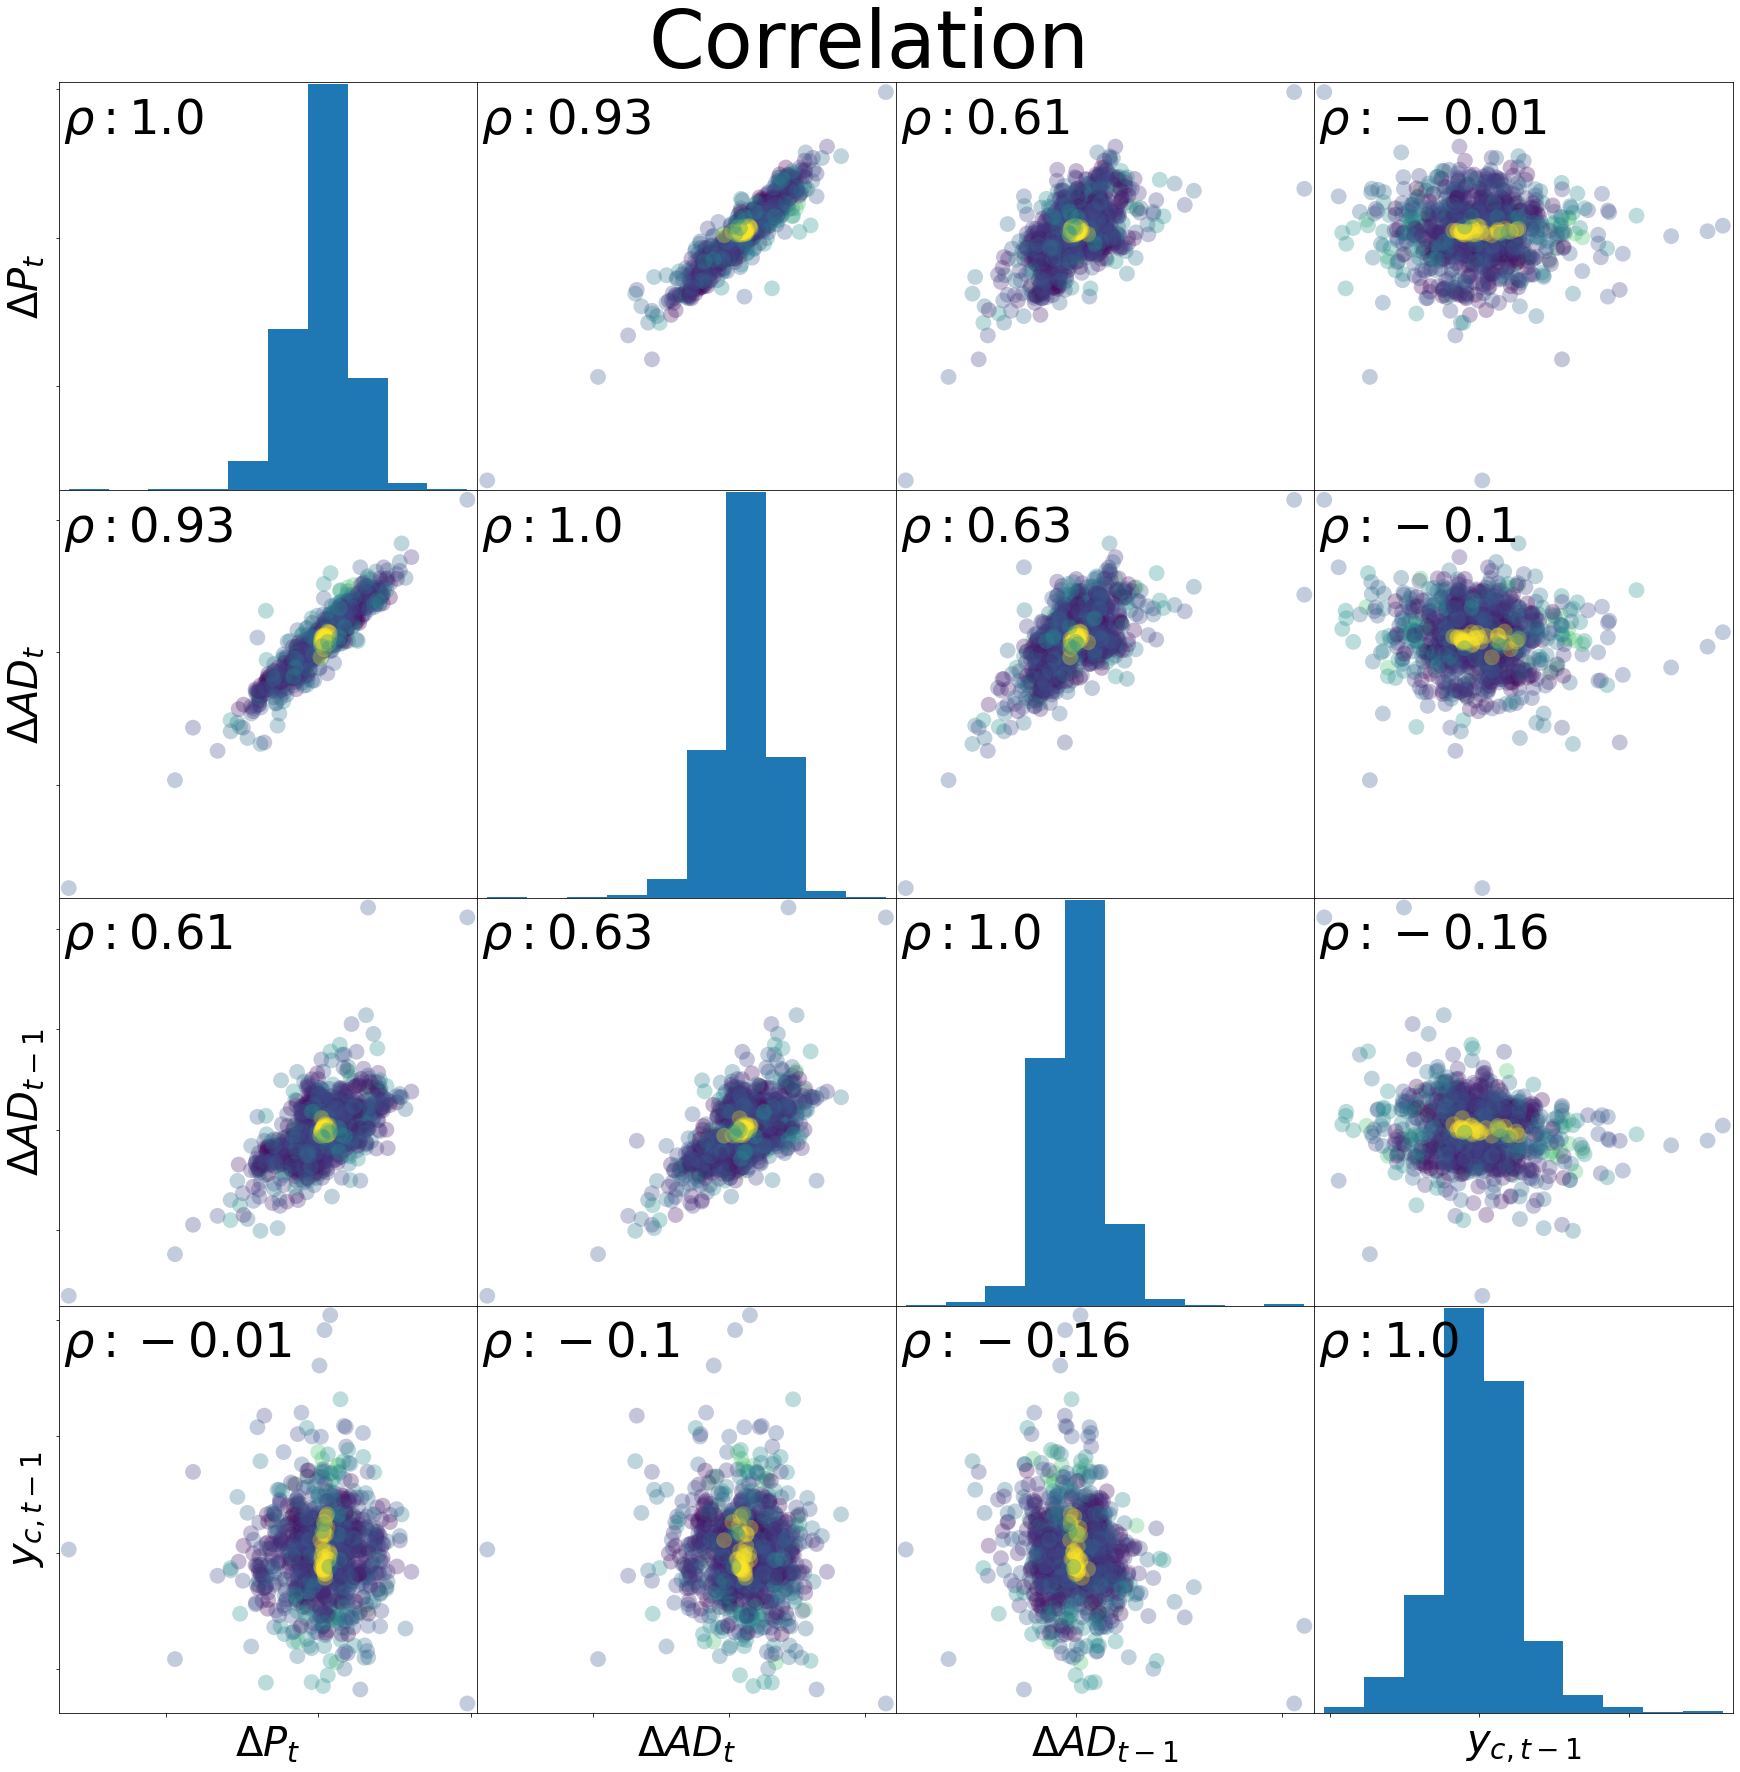

In [35]:
# import pingouin 
corr_vars = ["$\Delta P_t$", "$\Delta AD_t$", "$\Delta AD_{t-1}$", "$y_{c,t-1}$", "$\pi_{y_{ct}}$"]
corr_data = reg_data[corr_vars]
corr_df = corr_data[corr_vars[:-1]].dropna().corr()

keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(corr_data[corr_vars[:-1]],c = corr_data["$\pi_{y_{ct}}$"],s = 1000, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

Text(0.5, 0.915, 'Correlation')

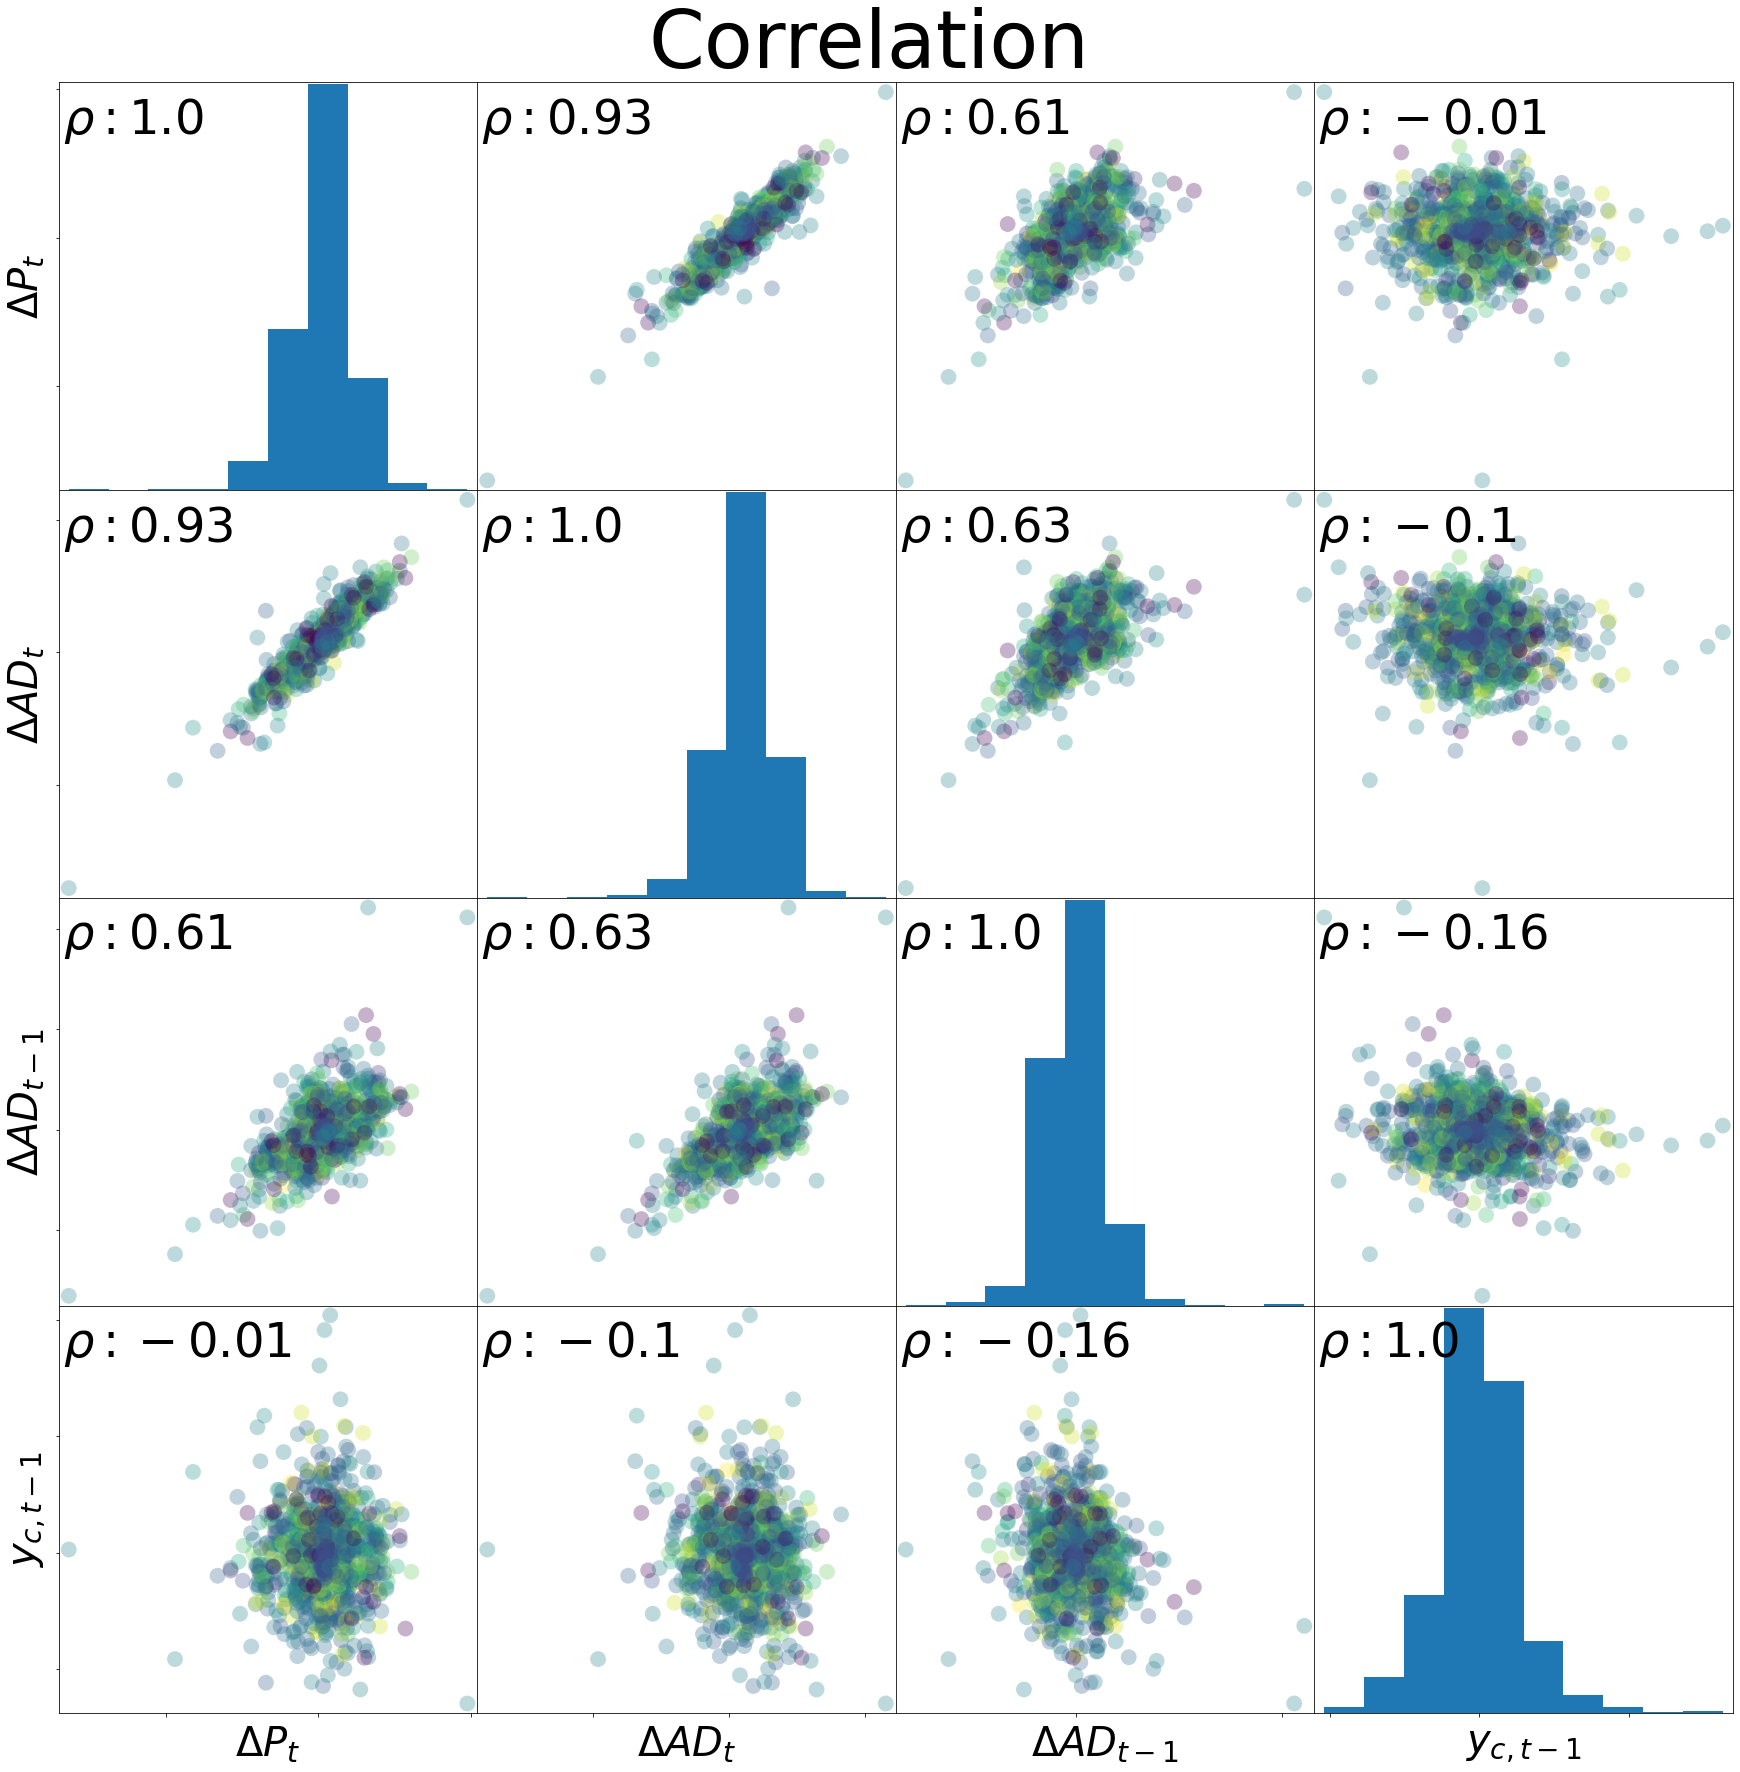

In [36]:
corr_vars = ["$\Delta P_t$", "$\Delta AD_t$", "$\Delta AD_{t-1}$", "$y_{c,t-1}$", "$\pi_{\Delta P}$"]
corr_data = reg_data[corr_vars]
corr_df = corr_data[corr_vars[:-1]].dropna().corr()

keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(corr_data[corr_vars[:-1]],c = corr_data["$\pi_{\Delta P}$"],s = 1000, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

In [37]:
# Build panel Dickey-Fuller

from statsmodels.tsa.stattools import adfuller

def ips_test(data):
    index_name, sub_index_name = data.index.names
    index = list(data.reset_index()[index_name].unique())
    N = len(index)
    t_stats = {}
    df_index_dict = {}
    for ix in index:
        slice_df = data.loc[ix]
        t_stats[ix] = {}
        for key in slice_df.keys():
            t_stat = adfuller(slice_df[key], maxlag = 1, regression = 'c')[0]
            t_stats[ix][key] = t_stat
    t_stats = pd.DataFrame(t_stats).T

    return t_stats.mean()

    
    

index_name = "countrycode"
data["Rate"] = data["Log"].groupby(index_name).diff()
data["Rate"]
ips_results = {}
for key, val in data.items():
    ips_results[key] = ips_test(val.dropna())
pd.DataFrame(ips_results).dropna()


 

# test_tot = ips_test(data = data_ips_t, Firm='GeoFips', Time = 'TimePeriod')

Data       Log      Rate
avh     -1.573567 -1.411552 -5.845528
cgdpe    1.321106 -1.171344 -4.604107
cn       0.863730 -0.867298 -3.127223
ctfp    -1.893143 -1.932976 -5.105531
pl_gdpo -0.983121 -1.542591 -5.263538